In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.datasets import load_boston

import numpy as np

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

plt.style.use('ggplot')

['NanumGothic']


# crime data

In [35]:
crime_df = pd.read_csv('~/dropbox/python숙달/data/depp/crime_in_Seoul.csv', encoding="cp949")

## 살인발생이 가장높은 관서명, 살인발생,살인검거를 출력하시요

In [36]:
crime_df.columns

Index(['관서명', '살인 발생', '살인 검거', '강도 발생', '강도 검거', '강간 발생', '강간 검거', '절도 발생',
       '절도 검거', '폭력 발생', '폭력 검거'],
      dtype='object')

In [37]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [38]:
crime_df.sort_values('살인 발생', ascending=False).iloc[:1,:]

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
9,영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961"


2. 관서별 절도발생,절도검거에 대한 바차트를 그리시요


In [39]:
crime_df['절도 발생'] = crime_df['절도 발생'].str.replace(r'\D+', '').astype('int')
crime_df['폭력 발생'] = crime_df['폭력 발생'].str.replace(r'\D+', '').astype('int')
crime_df['폭력 검거'] = crime_df['폭력 검거'].str.replace(r'\D+', '').astype('int')
crime_df['절도 검거'] = crime_df['절도 검거'].str.replace(r'\D+', '').astype('int')

<ipython-input-39-cd4e8d8dfbb6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  crime_df['절도 발생'] = crime_df['절도 발생'].str.replace(r'\D+', '').astype('int')
<ipython-input-39-cd4e8d8dfbb6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  crime_df['폭력 발생'] = crime_df['폭력 발생'].str.replace(r'\D+', '').astype('int')
<ipython-input-39-cd4e8d8dfbb6>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  crime_df['폭력 검거'] = crime_df['폭력 검거'].str.replace(r'\D+', '').astype('int')
<ipython-input-39-cd4e8d8dfbb6>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  crime_df['절도 검거'] = crime_df['절도 검거'].str.replace(r'\D+', '').astype('int')


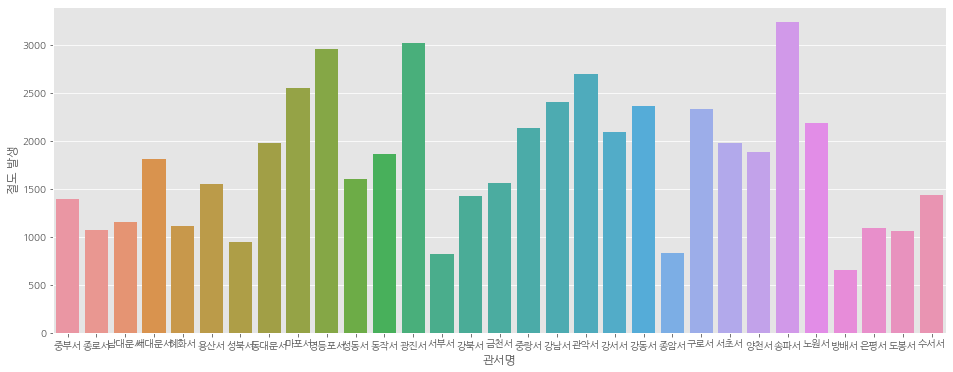

In [40]:

plt.figure(figsize=(16,6))
ax = sns.barplot(x="관서명", y="절도 발생", data=crime_df)

3. 절도검거율 컬럼을 추가 하시요

In [41]:
crime_df['절도검거율'] = crime_df['절도 검거']/crime_df['절도 발생'] * 100

In [42]:
crime_df

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,절도검거율
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,34.193548
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,38.598131
2,남대문서,1,0,6,4,65,46,1153,382,869,794,33.130963
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,40.728477
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,38.061041
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,37.700706
6,성북서,2,2,2,1,86,71,953,409,1194,1015,42.917104
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,41.090358
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,31.819961
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,32.995951


4. 폭력발생 top5를 구하시요( 관서명, 폭력발생, 폭력검거)m

In [48]:
crime_df.sort_values('폭력 발생', ascending=False).iloc[:5,:][['관서명', '폭력 발생', '폭력 검거']]

,관서명,폭력 발생,폭력 검거
9,영등포서,3572,2961
18,관악서,3298,2642
25,송파서,3295,2786
19,강서서,3207,2718
22,구로서,3007,2432


상관관계 heatmap을 그리시요

C:\Users\13a71\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13a71\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

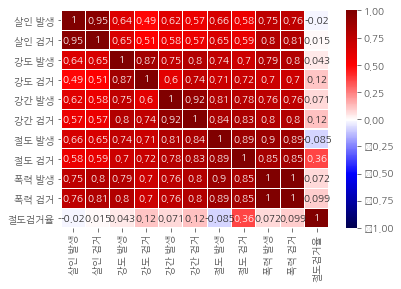

In [49]:
plt.figsize = (200,160)
sns.heatmap(crime_df.corr(), vmin=-1, vmax = 1, annot = True, linewidths= 0.2, cmap = 'seismic')

6. 살인발생과 폭력발생의 상관관계를 확인하고 살인 발생이 5건인경우 폭력발생수를 예측하시요
( 텐서버전, 케라스버전)

In [93]:
crime_df[['살인 발생', '폭력 발생']].corr()

,살인 발생,폭력 발생
살인 발생,1.000000,0.754575
폭력 발생,0.754575,1.000000


In [94]:
x_data

array([ 2,  3,  1,  2,  3,  5,  2,  5,  8, 14,  4,  5,  4,  2,  7,  3, 13,
        3,  9,  7,  4,  3,  8,  7,  3, 11, 10,  1,  1,  3, 10],
      dtype=int64)

In [95]:
x_data = crime_df['살인 발생'].values
y_data = crime_df['폭력 발생'].values

In [96]:
x_data

array([ 2,  3,  1,  2,  3,  5,  2,  5,  8, 14,  4,  5,  4,  2,  7,  3, 13,
        3,  9,  7,  4,  3,  8,  7,  3, 11, 10,  1,  1,  3, 10],
      dtype=int64)

In [97]:
w*x

<tf.Tensor: shape=(31,), dtype=float32, numpy=
array([ 372.01254,  558.0188 ,  186.00627,  372.01254,  558.0188 ,
        930.0314 ,  372.01254,  930.0314 , 1488.0502 , 2604.088  ,
        744.0251 ,  930.0314 ,  744.0251 ,  372.01254, 1302.044  ,
        558.0188 , 2418.0815 ,  558.0188 , 1674.0564 , 1302.044  ,
        744.0251 ,  558.0188 , 1488.0502 , 1302.044  ,  558.0188 ,
       2046.069  , 1860.0627 ,  186.00627,  186.00627,  558.0188 ,
       1860.0627 ], dtype=float32)>

In [98]:
x = tf.constant( x_data, tf.float32)
y = tf.constant( y_data, tf.float32)
w = tf.Variable( tf.random.uniform( [1] ) ) #[특성데이터갯수,라벨의갯수]
b = tf.Variable( tf.random.uniform( [1] ) ) #[라벨의갯수]

In [99]:
def compute_cost():
    hx = w*x + b
    cost = tf.reduce_mean( (hx-y)**2 )
    return cost
    

In [103]:
optimizer = Adam(0.1)
for i in range(10000):
    optimizer.minimize(compute_cost, var_list= [w,b])
    print(i, "cost = ", compute_cost().numpy())

0 cost =  1103746.4
1 cost =  1102663.6
2 cost =  1101582.1
3 cost =  1100501.4
4 cost =  1099421.9
5 cost =  1098343.5
6 cost =  1097266.4
7 cost =  1096190.4
8 cost =  1095115.4
9 cost =  1094041.8
10 cost =  1092969.2
11 cost =  1091898.2
12 cost =  1090828.0
13 cost =  1089759.5
14 cost =  1088692.1
15 cost =  1087625.9
16 cost =  1086561.0
17 cost =  1085497.5
18 cost =  1084435.4
19 cost =  1083374.5
20 cost =  1082314.9
21 cost =  1081256.8
22 cost =  1080199.9
23 cost =  1079144.5
24 cost =  1078090.6
25 cost =  1077037.9
26 cost =  1075986.8
27 cost =  1074937.0
28 cost =  1073888.5
29 cost =  1072841.5
30 cost =  1071795.9
31 cost =  1070751.8
32 cost =  1069709.1
33 cost =  1068667.9
34 cost =  1067628.2
35 cost =  1066589.8
36 cost =  1065552.9
37 cost =  1064517.4
38 cost =  1063483.4
39 cost =  1062451.0
40 cost =  1061419.8
41 cost =  1060390.2
42 cost =  1059362.1
43 cost =  1058335.5
44 cost =  1057310.4
45 cost =  1056286.9
46 cost =  1055264.6
47 cost =  1054244.0
48

409 cost =  772734.25
410 cost =  772170.4
411 cost =  771607.56
412 cost =  771045.7
413 cost =  770484.9
414 cost =  769925.1
415 cost =  769366.3
416 cost =  768808.5
417 cost =  768251.8
418 cost =  767696.06
419 cost =  767141.3
420 cost =  766587.6
421 cost =  766034.8
422 cost =  765483.1
423 cost =  764932.44
424 cost =  764382.6
425 cost =  763833.94
426 cost =  763286.2
427 cost =  762739.6
428 cost =  762193.8
429 cost =  761649.2
430 cost =  761105.5
431 cost =  760562.7
432 cost =  760021.06
433 cost =  759480.25
434 cost =  758940.44
435 cost =  758401.75
436 cost =  757864.0
437 cost =  757327.25
438 cost =  756791.5
439 cost =  756256.6
440 cost =  755722.7
441 cost =  755190.06
442 cost =  754658.1
443 cost =  754127.25
444 cost =  753597.4
445 cost =  753068.5
446 cost =  752540.5
447 cost =  752013.5
448 cost =  751487.5
449 cost =  750962.5
450 cost =  750438.5
451 cost =  749915.44
452 cost =  749393.3
453 cost =  748872.2
454 cost =  748351.94
455 cost =  747832.7

838 cost =  608831.44
839 cost =  608597.2
840 cost =  608363.5
841 cost =  608130.25
842 cost =  607897.6
843 cost =  607665.5
844 cost =  607433.94
845 cost =  607202.8
846 cost =  606972.4
847 cost =  606742.25
848 cost =  606512.7
849 cost =  606283.8
850 cost =  606055.3
851 cost =  605827.4
852 cost =  605599.94
853 cost =  605373.06
854 cost =  605146.7
855 cost =  604920.9
856 cost =  604695.56
857 cost =  604470.8
858 cost =  604246.5
859 cost =  604022.8
860 cost =  603799.56
861 cost =  603576.8
862 cost =  603354.6
863 cost =  603132.9
864 cost =  602911.75
865 cost =  602690.94
866 cost =  602470.75
867 cost =  602251.1
868 cost =  602031.9
869 cost =  601813.4
870 cost =  601595.06
871 cost =  601377.44
872 cost =  601160.4
873 cost =  600943.7
874 cost =  600727.56
875 cost =  600512.0
876 cost =  600296.9
877 cost =  600082.3
878 cost =  599868.1
879 cost =  599654.44
880 cost =  599441.25
881 cost =  599228.56
882 cost =  599016.4
883 cost =  598804.7
884 cost =  59859

1252 cost =  547056.94
1253 cost =  546970.3
1254 cost =  546884.06
1255 cost =  546797.9
1256 cost =  546711.94
1257 cost =  546626.1
1258 cost =  546540.56
1259 cost =  546455.3
1260 cost =  546370.06
1261 cost =  546285.2
1262 cost =  546200.44
1263 cost =  546115.9
1264 cost =  546031.6
1265 cost =  545947.5
1266 cost =  545863.56
1267 cost =  545779.75
1268 cost =  545696.25
1269 cost =  545612.9
1270 cost =  545529.75
1271 cost =  545446.8
1272 cost =  545364.06
1273 cost =  545281.5
1274 cost =  545199.1
1275 cost =  545116.9
1276 cost =  545034.9
1277 cost =  544953.2
1278 cost =  544871.56
1279 cost =  544790.1
1280 cost =  544708.94
1281 cost =  544627.94
1282 cost =  544547.1
1283 cost =  544466.44
1284 cost =  544385.94
1285 cost =  544305.7
1286 cost =  544225.7
1287 cost =  544145.7
1288 cost =  544066.0
1289 cost =  543986.44
1290 cost =  543907.1
1291 cost =  543828.0
1292 cost =  543749.06
1293 cost =  543670.2
1294 cost =  543591.6
1295 cost =  543513.2
1296 cost =  5

1661 cost =  523304.25
1662 cost =  523263.94
1663 cost =  523223.62
1664 cost =  523183.38
1665 cost =  523143.22
1666 cost =  523103.1
1667 cost =  523062.97
1668 cost =  523022.94
1669 cost =  522983.0
1670 cost =  522943.0
1671 cost =  522903.1
1672 cost =  522863.25
1673 cost =  522823.34
1674 cost =  522783.6
1675 cost =  522743.8
1676 cost =  522704.1
1677 cost =  522664.47
1678 cost =  522624.84
1679 cost =  522585.28
1680 cost =  522545.78
1681 cost =  522506.25
1682 cost =  522466.84
1683 cost =  522427.4
1684 cost =  522388.0
1685 cost =  522348.72
1686 cost =  522309.4
1687 cost =  522270.2
1688 cost =  522230.97
1689 cost =  522191.84
1690 cost =  522152.72
1691 cost =  522113.7
1692 cost =  522074.66
1693 cost =  522035.66
1694 cost =  521996.72
1695 cost =  521957.75
1696 cost =  521918.84
1697 cost =  521880.06
1698 cost =  521841.2
1699 cost =  521802.47
1700 cost =  521763.72
1701 cost =  521725.03
1702 cost =  521686.34
1703 cost =  521647.8
1704 cost =  521609.2
170

2087 cost =  508286.47
2088 cost =  508253.16
2089 cost =  508219.84
2090 cost =  508186.6
2091 cost =  508153.22
2092 cost =  508119.9
2093 cost =  508086.56
2094 cost =  508053.25
2095 cost =  508019.94
2096 cost =  507986.6
2097 cost =  507953.22
2098 cost =  507919.9
2099 cost =  507886.6
2100 cost =  507853.22
2101 cost =  507819.94
2102 cost =  507786.62
2103 cost =  507753.28
2104 cost =  507720.0
2105 cost =  507686.66
2106 cost =  507653.3
2107 cost =  507619.94
2108 cost =  507586.66
2109 cost =  507553.3
2110 cost =  507520.03
2111 cost =  507486.6
2112 cost =  507453.25
2113 cost =  507419.97
2114 cost =  507386.66
2115 cost =  507353.28
2116 cost =  507320.0
2117 cost =  507286.66
2118 cost =  507253.28
2119 cost =  507219.94
2120 cost =  507186.6
2121 cost =  507153.25
2122 cost =  507119.88
2123 cost =  507086.53
2124 cost =  507053.16
2125 cost =  507019.88
2126 cost =  506986.53
2127 cost =  506953.16
2128 cost =  506919.84
2129 cost =  506886.4
2130 cost =  506853.1
2

2510 cost =  493934.12
2511 cost =  493899.38
2512 cost =  493864.6
2513 cost =  493829.75
2514 cost =  493794.9
2515 cost =  493760.06
2516 cost =  493725.28
2517 cost =  493690.53
2518 cost =  493655.62
2519 cost =  493620.78
2520 cost =  493585.9
2521 cost =  493551.1
2522 cost =  493516.22
2523 cost =  493481.34
2524 cost =  493446.56
2525 cost =  493411.62
2526 cost =  493376.75
2527 cost =  493341.94
2528 cost =  493307.03
2529 cost =  493272.16
2530 cost =  493237.22
2531 cost =  493202.38
2532 cost =  493167.53
2533 cost =  493132.6
2534 cost =  493097.75
2535 cost =  493062.8
2536 cost =  493027.88
2537 cost =  492992.97
2538 cost =  492958.03
2539 cost =  492923.12
2540 cost =  492888.16
2541 cost =  492853.25
2542 cost =  492818.34
2543 cost =  492783.4
2544 cost =  492748.44
2545 cost =  492713.47
2546 cost =  492678.53
2547 cost =  492643.62
2548 cost =  492608.66
2549 cost =  492573.62
2550 cost =  492538.7
2551 cost =  492503.7
2552 cost =  492468.72
2553 cost =  492433.

2940 cost =  478619.56
2941 cost =  478583.3
2942 cost =  478547.03
2943 cost =  478510.75
2944 cost =  478474.44
2945 cost =  478438.2
2946 cost =  478401.9
2947 cost =  478365.66
2948 cost =  478329.25
2949 cost =  478292.97
2950 cost =  478256.75
2951 cost =  478220.34
2952 cost =  478184.12
2953 cost =  478147.78
2954 cost =  478111.44
2955 cost =  478075.16
2956 cost =  478038.84
2957 cost =  478002.47
2958 cost =  477966.2
2959 cost =  477929.8
2960 cost =  477893.53
2961 cost =  477857.2
2962 cost =  477820.84
2963 cost =  477784.53
2964 cost =  477748.2
2965 cost =  477711.88
2966 cost =  477675.6
2967 cost =  477639.16
2968 cost =  477602.88
2969 cost =  477566.53
2970 cost =  477530.12
2971 cost =  477493.84
2972 cost =  477457.4
2973 cost =  477421.1
2974 cost =  477384.72
2975 cost =  477348.4
2976 cost =  477312.03
2977 cost =  477275.62
2978 cost =  477239.28
2979 cost =  477202.9
2980 cost =  477166.6
2981 cost =  477130.22
2982 cost =  477093.84
2983 cost =  477057.44
2

3355 cost =  463423.1
3356 cost =  463386.3
3357 cost =  463349.56
3358 cost =  463312.72
3359 cost =  463275.94
3360 cost =  463239.12
3361 cost =  463202.25
3362 cost =  463165.47
3363 cost =  463128.7
3364 cost =  463091.88
3365 cost =  463055.03
3366 cost =  463018.22
3367 cost =  462981.44
3368 cost =  462944.6
3369 cost =  462907.78
3370 cost =  462870.97
3371 cost =  462834.1
3372 cost =  462797.28
3373 cost =  462760.53
3374 cost =  462723.72
3375 cost =  462686.9
3376 cost =  462650.06
3377 cost =  462613.25
3378 cost =  462576.4
3379 cost =  462539.6
3380 cost =  462502.75
3381 cost =  462466.0
3382 cost =  462429.16
3383 cost =  462392.38
3384 cost =  462355.56
3385 cost =  462318.72
3386 cost =  462281.88
3387 cost =  462245.03
3388 cost =  462208.22
3389 cost =  462171.44
3390 cost =  462134.66
3391 cost =  462097.8
3392 cost =  462060.97
3393 cost =  462024.2
3394 cost =  461987.34
3395 cost =  461950.56
3396 cost =  461913.72
3397 cost =  461876.9
3398 cost =  461840.06


3773 cost =  448065.3
3774 cost =  448028.75
3775 cost =  447992.22
3776 cost =  447955.72
3777 cost =  447919.12
3778 cost =  447882.6
3779 cost =  447846.0
3780 cost =  447809.53
3781 cost =  447772.9
3782 cost =  447736.4
3783 cost =  447699.88
3784 cost =  447663.25
3785 cost =  447626.75
3786 cost =  447590.25
3787 cost =  447553.75
3788 cost =  447517.16
3789 cost =  447480.66
3790 cost =  447444.1
3791 cost =  447407.6
3792 cost =  447371.06
3793 cost =  447334.53
3794 cost =  447297.97
3795 cost =  447261.47
3796 cost =  447224.94
3797 cost =  447188.44
3798 cost =  447151.94
3799 cost =  447115.44
3800 cost =  447078.94
3801 cost =  447042.38
3802 cost =  447005.88
3803 cost =  446969.44
3804 cost =  446932.9
3805 cost =  446896.38
3806 cost =  446859.88
3807 cost =  446823.34
3808 cost =  446786.94
3809 cost =  446750.34
3810 cost =  446713.9
3811 cost =  446677.34
3812 cost =  446640.9
3813 cost =  446604.38
3814 cost =  446567.94
3815 cost =  446531.4
3816 cost =  446494.94

4195 cost =  432809.62
4196 cost =  432773.94
4197 cost =  432738.28
4198 cost =  432702.7
4199 cost =  432667.0
4200 cost =  432631.38
4201 cost =  432595.75
4202 cost =  432560.1
4203 cost =  432524.44
4204 cost =  432488.8
4205 cost =  432453.16
4206 cost =  432417.56
4207 cost =  432381.94
4208 cost =  432346.3
4209 cost =  432310.72
4210 cost =  432275.03
4211 cost =  432239.44
4212 cost =  432203.8
4213 cost =  432168.2
4214 cost =  432132.6
4215 cost =  432096.97
4216 cost =  432061.38
4217 cost =  432025.75
4218 cost =  431990.2
4219 cost =  431954.62
4220 cost =  431919.03
4221 cost =  431883.4
4222 cost =  431847.8
4223 cost =  431812.25
4224 cost =  431776.7
4225 cost =  431741.06
4226 cost =  431705.53
4227 cost =  431669.97
4228 cost =  431634.38
4229 cost =  431598.78
4230 cost =  431563.22
4231 cost =  431527.72
4232 cost =  431492.16
4233 cost =  431456.56
4234 cost =  431420.97
4235 cost =  431385.47
4236 cost =  431349.94
4237 cost =  431314.34
4238 cost =  431278.78


4607 cost =  418377.1
4608 cost =  418342.78
4609 cost =  418308.38
4610 cost =  418274.06
4611 cost =  418239.7
4612 cost =  418205.34
4613 cost =  418171.06
4614 cost =  418136.78
4615 cost =  418102.38
4616 cost =  418068.12
4617 cost =  418033.8
4618 cost =  417999.47
4619 cost =  417965.12
4620 cost =  417930.9
4621 cost =  417896.6
4622 cost =  417862.34
4623 cost =  417828.0
4624 cost =  417793.72
4625 cost =  417759.47
4626 cost =  417725.16
4627 cost =  417690.88
4628 cost =  417656.66
4629 cost =  417622.38
4630 cost =  417588.2
4631 cost =  417553.88
4632 cost =  417519.7
4633 cost =  417485.4
4634 cost =  417451.2
4635 cost =  417416.97
4636 cost =  417382.72
4637 cost =  417348.47
4638 cost =  417314.2
4639 cost =  417280.03
4640 cost =  417245.75
4641 cost =  417211.56
4642 cost =  417177.28
4643 cost =  417143.1
4644 cost =  417108.88
4645 cost =  417074.7
4646 cost =  417040.44
4647 cost =  417006.28
4648 cost =  416972.03
4649 cost =  416937.94
4650 cost =  416903.7
46

5028 cost =  404260.1
5029 cost =  404227.4
5030 cost =  404194.72
5031 cost =  404162.0
5032 cost =  404129.34
5033 cost =  404096.72
5034 cost =  404064.0
5035 cost =  404031.4
5036 cost =  403998.75
5037 cost =  403966.12
5038 cost =  403933.4
5039 cost =  403900.75
5040 cost =  403868.2
5041 cost =  403835.56
5042 cost =  403802.9
5043 cost =  403770.25
5044 cost =  403737.66
5045 cost =  403705.03
5046 cost =  403672.38
5047 cost =  403639.84
5048 cost =  403607.22
5049 cost =  403574.62
5050 cost =  403542.06
5051 cost =  403509.47
5052 cost =  403476.9
5053 cost =  403444.3
5054 cost =  403411.75
5055 cost =  403379.16
5056 cost =  403346.6
5057 cost =  403314.06
5058 cost =  403281.47
5059 cost =  403248.94
5060 cost =  403216.38
5061 cost =  403183.84
5062 cost =  403151.34
5063 cost =  403118.84
5064 cost =  403086.25
5065 cost =  403053.75
5066 cost =  403021.22
5067 cost =  402988.72
5068 cost =  402956.25
5069 cost =  402923.75
5070 cost =  402891.22
5071 cost =  402858.72

5448 cost =  390919.44
5449 cost =  390888.66
5450 cost =  390857.88
5451 cost =  390827.06
5452 cost =  390796.25
5453 cost =  390765.44
5454 cost =  390734.66
5455 cost =  390703.84
5456 cost =  390673.06
5457 cost =  390642.28
5458 cost =  390611.53
5459 cost =  390580.75
5460 cost =  390549.97
5461 cost =  390519.2
5462 cost =  390488.44
5463 cost =  390457.72
5464 cost =  390426.97
5465 cost =  390396.2
5466 cost =  390365.44
5467 cost =  390334.78
5468 cost =  390304.0
5469 cost =  390273.25
5470 cost =  390242.53
5471 cost =  390211.78
5472 cost =  390181.06
5473 cost =  390150.38
5474 cost =  390119.72
5475 cost =  390089.0
5476 cost =  390058.28
5477 cost =  390027.62
5478 cost =  389996.9
5479 cost =  389966.22
5480 cost =  389935.62
5481 cost =  389904.94
5482 cost =  389874.25
5483 cost =  389843.53
5484 cost =  389812.94
5485 cost =  389782.28
5486 cost =  389751.66
5487 cost =  389720.97
5488 cost =  389690.28
5489 cost =  389659.7
5490 cost =  389629.03
5491 cost =  3895

5869 cost =  378359.7
5870 cost =  378330.84
5871 cost =  378302.03
5872 cost =  378273.22
5873 cost =  378244.4
5874 cost =  378215.62
5875 cost =  378186.8
5876 cost =  378157.97
5877 cost =  378129.22
5878 cost =  378100.44
5879 cost =  378071.72
5880 cost =  378042.94
5881 cost =  378014.1
5882 cost =  377985.34
5883 cost =  377956.62
5884 cost =  377927.84
5885 cost =  377899.12
5886 cost =  377870.38
5887 cost =  377841.62
5888 cost =  377812.9
5889 cost =  377784.16
5890 cost =  377755.4
5891 cost =  377726.7
5892 cost =  377698.0
5893 cost =  377669.22
5894 cost =  377640.56
5895 cost =  377611.88
5896 cost =  377583.12
5897 cost =  377554.44
5898 cost =  377525.78
5899 cost =  377497.1
5900 cost =  377468.34
5901 cost =  377439.7
5902 cost =  377411.03
5903 cost =  377382.34
5904 cost =  377353.7
5905 cost =  377325.06
5906 cost =  377296.38
5907 cost =  377267.72
5908 cost =  377239.1
5909 cost =  377210.44
5910 cost =  377181.78
5911 cost =  377153.2
5912 cost =  377124.6
59

6295 cost =  366519.66
6296 cost =  366492.88
6297 cost =  366466.16
6298 cost =  366439.34
6299 cost =  366412.7
6300 cost =  366385.97
6301 cost =  366359.22
6302 cost =  366332.47
6303 cost =  366305.84
6304 cost =  366279.06
6305 cost =  366252.38
6306 cost =  366225.7
6307 cost =  366198.97
6308 cost =  366172.3
6309 cost =  366145.6
6310 cost =  366118.94
6311 cost =  366092.28
6312 cost =  366065.62
6313 cost =  366038.97
6314 cost =  366012.28
6315 cost =  365985.66
6316 cost =  365959.0
6317 cost =  365932.28
6318 cost =  365905.7
6319 cost =  365879.06
6320 cost =  365852.38
6321 cost =  365825.8
6322 cost =  365799.12
6323 cost =  365772.53
6324 cost =  365745.94
6325 cost =  365719.28
6326 cost =  365692.7
6327 cost =  365666.12
6328 cost =  365639.47
6329 cost =  365612.94
6330 cost =  365586.38
6331 cost =  365559.75
6332 cost =  365533.22
6333 cost =  365506.7
6334 cost =  365480.1
6335 cost =  365453.62
6336 cost =  365427.0
6337 cost =  365400.47
6338 cost =  365373.97

6724 cost =  355499.28
6725 cost =  355474.66
6726 cost =  355450.03
6727 cost =  355425.44
6728 cost =  355400.84
6729 cost =  355376.22
6730 cost =  355351.62
6731 cost =  355327.03
6732 cost =  355302.44
6733 cost =  355277.84
6734 cost =  355253.28
6735 cost =  355228.72
6736 cost =  355204.12
6737 cost =  355179.6
6738 cost =  355155.03
6739 cost =  355130.44
6740 cost =  355105.97
6741 cost =  355081.34
6742 cost =  355056.84
6743 cost =  355032.3
6744 cost =  355007.78
6745 cost =  354983.22
6746 cost =  354958.72
6747 cost =  354934.22
6748 cost =  354909.7
6749 cost =  354885.16
6750 cost =  354860.66
6751 cost =  354836.16
6752 cost =  354811.7
6753 cost =  354787.22
6754 cost =  354762.75
6755 cost =  354738.22
6756 cost =  354713.8
6757 cost =  354689.34
6758 cost =  354664.9
6759 cost =  354640.4
6760 cost =  354615.97
6761 cost =  354591.62
6762 cost =  354567.1
6763 cost =  354542.72
6764 cost =  354518.25
6765 cost =  354493.84
6766 cost =  354469.4
6767 cost =  354444.

7142 cost =  345639.03
7143 cost =  345616.44
7144 cost =  345593.88
7145 cost =  345571.38
7146 cost =  345548.8
7147 cost =  345526.25
7148 cost =  345503.78
7149 cost =  345481.28
7150 cost =  345458.72
7151 cost =  345436.22
7152 cost =  345413.72
7153 cost =  345391.22
7154 cost =  345368.75
7155 cost =  345346.22
7156 cost =  345323.75
7157 cost =  345301.3
7158 cost =  345278.8
7159 cost =  345256.28
7160 cost =  345233.88
7161 cost =  345211.4
7162 cost =  345188.94
7163 cost =  345166.47
7164 cost =  345144.0
7165 cost =  345121.62
7166 cost =  345099.1
7167 cost =  345076.7
7168 cost =  345054.25
7169 cost =  345031.84
7170 cost =  345009.4
7171 cost =  344986.94
7172 cost =  344964.6
7173 cost =  344942.16
7174 cost =  344919.8
7175 cost =  344897.34
7176 cost =  344875.0
7177 cost =  344852.7
7178 cost =  344830.25
7179 cost =  344807.88
7180 cost =  344785.56
7181 cost =  344763.16
7182 cost =  344740.84
7183 cost =  344718.44
7184 cost =  344696.1
7185 cost =  344673.75
7

7575 cost =  336334.16
7576 cost =  336313.78
7577 cost =  336293.34
7578 cost =  336272.94
7579 cost =  336252.53
7580 cost =  336232.12
7581 cost =  336211.72
7582 cost =  336191.3
7583 cost =  336170.9
7584 cost =  336150.6
7585 cost =  336130.2
7586 cost =  336109.78
7587 cost =  336089.4
7588 cost =  336069.03
7589 cost =  336048.7
7590 cost =  336028.3
7591 cost =  336007.94
7592 cost =  335987.62
7593 cost =  335967.28
7594 cost =  335946.9
7595 cost =  335926.6
7596 cost =  335906.25
7597 cost =  335885.94
7598 cost =  335865.66
7599 cost =  335845.3
7600 cost =  335824.97
7601 cost =  335804.75
7602 cost =  335784.38
7603 cost =  335764.1
7604 cost =  335743.84
7605 cost =  335723.56
7606 cost =  335703.25
7607 cost =  335683.0
7608 cost =  335662.75
7609 cost =  335642.47
7610 cost =  335622.16
7611 cost =  335601.94
7612 cost =  335581.66
7613 cost =  335561.44
7614 cost =  335541.2
7615 cost =  335520.97
7616 cost =  335500.7
7617 cost =  335480.47
7618 cost =  335460.25
76

8001 cost =  328071.66
8002 cost =  328053.28
8003 cost =  328034.97
8004 cost =  328016.56
8005 cost =  327998.2
8006 cost =  327979.88
8007 cost =  327961.56
8008 cost =  327943.2
8009 cost =  327924.84
8010 cost =  327906.56
8011 cost =  327888.22
8012 cost =  327869.94
8013 cost =  327851.62
8014 cost =  327833.28
8015 cost =  327814.97
8016 cost =  327796.7
8017 cost =  327778.34
8018 cost =  327760.06
8019 cost =  327741.8
8020 cost =  327723.47
8021 cost =  327705.16
8022 cost =  327686.94
8023 cost =  327668.7
8024 cost =  327650.4
8025 cost =  327632.16
8026 cost =  327613.9
8027 cost =  327595.7
8028 cost =  327577.44
8029 cost =  327559.2
8030 cost =  327540.97
8031 cost =  327522.75
8032 cost =  327504.53
8033 cost =  327486.28
8034 cost =  327468.06
8035 cost =  327449.9
8036 cost =  327431.7
8037 cost =  327413.4
8038 cost =  327395.28
8039 cost =  327377.06
8040 cost =  327358.88
8041 cost =  327340.72
8042 cost =  327322.56
8043 cost =  327304.38
8044 cost =  327286.22


8420 cost =  320791.75
8421 cost =  320775.3
8422 cost =  320758.94
8423 cost =  320742.6
8424 cost =  320726.2
8425 cost =  320709.8
8426 cost =  320693.44
8427 cost =  320677.1
8428 cost =  320660.75
8429 cost =  320644.38
8430 cost =  320628.1
8431 cost =  320611.72
8432 cost =  320595.4
8433 cost =  320579.06
8434 cost =  320562.78
8435 cost =  320546.4
8436 cost =  320530.16
8437 cost =  320513.8
8438 cost =  320497.47
8439 cost =  320481.16
8440 cost =  320464.9
8441 cost =  320448.6
8442 cost =  320432.3
8443 cost =  320416.0
8444 cost =  320399.72
8445 cost =  320383.44
8446 cost =  320367.2
8447 cost =  320350.9
8448 cost =  320334.7
8449 cost =  320318.4
8450 cost =  320302.16
8451 cost =  320285.94
8452 cost =  320269.72
8453 cost =  320253.44
8454 cost =  320237.22
8455 cost =  320221.0
8456 cost =  320204.78
8457 cost =  320188.56
8458 cost =  320172.3
8459 cost =  320156.1
8460 cost =  320139.94
8461 cost =  320123.75
8462 cost =  320107.56
8463 cost =  320091.34
8464 cos

8847 cost =  314215.9
8848 cost =  314201.47
8849 cost =  314187.03
8850 cost =  314172.66
8851 cost =  314158.25
8852 cost =  314143.84
8853 cost =  314129.4
8854 cost =  314115.06
8855 cost =  314100.7
8856 cost =  314086.28
8857 cost =  314071.9
8858 cost =  314057.53
8859 cost =  314043.16
8860 cost =  314028.78
8861 cost =  314014.44
8862 cost =  314000.06
8863 cost =  313985.75
8864 cost =  313971.38
8865 cost =  313957.03
8866 cost =  313942.7
8867 cost =  313928.34
8868 cost =  313914.03
8869 cost =  313899.7
8870 cost =  313885.38
8871 cost =  313871.1
8872 cost =  313856.78
8873 cost =  313842.44
8874 cost =  313828.12
8875 cost =  313813.84
8876 cost =  313799.56
8877 cost =  313785.25
8878 cost =  313771.0
8879 cost =  313756.72
8880 cost =  313742.4
8881 cost =  313728.12
8882 cost =  313713.94
8883 cost =  313699.66
8884 cost =  313685.34
8885 cost =  313671.12
8886 cost =  313656.88
8887 cost =  313642.6
8888 cost =  313628.38
8889 cost =  313614.16
8890 cost =  313599.9

9279 cost =  308403.2
9280 cost =  308390.7
9281 cost =  308378.2
9282 cost =  308365.7
9283 cost =  308353.22
9284 cost =  308340.72
9285 cost =  308328.22
9286 cost =  308315.75
9287 cost =  308303.3
9288 cost =  308290.88
9289 cost =  308278.4
9290 cost =  308265.97
9291 cost =  308253.53
9292 cost =  308241.03
9293 cost =  308228.62
9294 cost =  308216.2
9295 cost =  308203.72
9296 cost =  308191.3
9297 cost =  308178.88
9298 cost =  308166.44
9299 cost =  308154.0
9300 cost =  308141.66
9301 cost =  308129.22
9302 cost =  308116.84
9303 cost =  308104.4
9304 cost =  308092.03
9305 cost =  308079.66
9306 cost =  308067.22
9307 cost =  308054.88
9308 cost =  308042.47
9309 cost =  308030.12
9310 cost =  308017.78
9311 cost =  308005.38
9312 cost =  307993.03
9313 cost =  307980.72
9314 cost =  307968.3
9315 cost =  307956.03
9316 cost =  307943.7
9317 cost =  307931.3
9318 cost =  307919.0
9319 cost =  307906.7
9320 cost =  307894.3
9321 cost =  307882.03
9322 cost =  307869.72
9323

9703 cost =  303489.72
9704 cost =  303478.97
9705 cost =  303468.3
9706 cost =  303457.66
9707 cost =  303446.94
9708 cost =  303436.28
9709 cost =  303425.6
9710 cost =  303414.94
9711 cost =  303404.25
9712 cost =  303393.7
9713 cost =  303382.97
9714 cost =  303372.3
9715 cost =  303361.7
9716 cost =  303351.03
9717 cost =  303340.4
9718 cost =  303329.8
9719 cost =  303319.2
9720 cost =  303308.6
9721 cost =  303297.94
9722 cost =  303287.28
9723 cost =  303276.72
9724 cost =  303266.12
9725 cost =  303255.47
9726 cost =  303244.9
9727 cost =  303234.34
9728 cost =  303223.72
9729 cost =  303213.16
9730 cost =  303202.6
9731 cost =  303192.0
9732 cost =  303181.4
9733 cost =  303170.88
9734 cost =  303160.28
9735 cost =  303149.75
9736 cost =  303139.16
9737 cost =  303128.62
9738 cost =  303118.1
9739 cost =  303107.53
9740 cost =  303097.03
9741 cost =  303086.44
9742 cost =  303075.9
9743 cost =  303065.38
9744 cost =  303054.88
9745 cost =  303044.38
9746 cost =  303033.84
974

In [104]:
def hxfn(xdata):
    xdata = np.array(x_data)
    xd = tf.constant( xdata, tf.float32)
    hx = xd*w + b
    return hx.numpy()

In [105]:
w

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([201.31598], dtype=float32)>

In [106]:
# 0행의 값
hxfn([5])

array([1381.4457, 1582.7617, 1180.1296, 1381.4457, 1582.7617, 1985.3936,
       1381.4457, 1985.3936, 2589.3416, 3797.2375, 1784.0776, 1985.3936,
       1784.0776, 1381.4457, 2388.0256, 1582.7617, 3595.9214, 1582.7617,
       2790.6575, 2388.0256, 1784.0776, 1582.7617, 2589.3416, 2388.0256,
       1582.7617, 3193.2896, 2991.9736, 1180.1296, 1180.1296, 1582.7617,
       2991.9736], dtype=float32)

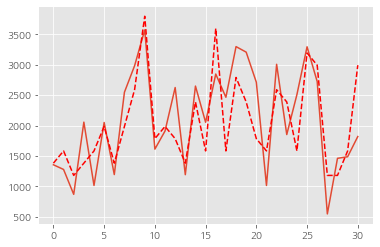

In [107]:
plt.plot( y_data)
plt.plot( hxfn( x_data) ,'r--')
plt.show()

In [108]:
from sklearn.metrics import r2_score

In [109]:
r2_score(y_data, hxfn( x_data))

0.5482062501181115

## keras version

In [116]:
w = tf.Variable(tf.random.uniform([1,1])) # [특성데이터, 라벨의 수]
b = tf.Variable(tf.random.uniform([1]))


dense = Dense(units=1, input_dim=1)
model = Sequential([dense])
model.compile(loss='mse', optimizer=Adam(lr=0.1))
h=model.fit(x,y, epochs=20000)

Epoch 1/20000
1/1 [==============================] - 0s 996us/step - loss: 5044045.0000
Epoch 2/20000
1/1 [==============================] - 0s 994us/step - loss: 5040991.5000
Epoch 3/20000
1/1 [==============================] - 0s 1000us/step - loss: 5037939.5000
Epoch 4/20000
1/1 [==============================] - 0s 0s/step - loss: 5034889.0000
Epoch 5/20000
1/1 [==============================] - 0s 1ms/step - loss: 5031839.0000
Epoch 6/20000
1/1 [==============================] - 0s 1ms/step - loss: 5028790.5000
Epoch 7/20000
1/1 [==============================] - 0s 1ms/step - loss: 5025743.0000
Epoch 8/20000
1/1 [==============================] - 0s 1ms/step - loss: 5022697.0000
Epoch 9/20000
1/1 [==============================] - 0s 1000us/step - loss: 5019651.5000
Epoch 10/20000
1/1 [==============================] - 0s 1ms/step - loss: 5016607.5000
Epoch 11/20000
1/1 [==============================] - 0s 999us/step - loss: 5013564.5000
Epoch 12/20000
1/1 [=====================

1/1 [==============================] - 0s 1ms/step - loss: 4765982.0000
Epoch 95/20000
1/1 [==============================] - 0s 1ms/step - loss: 4763062.0000
Epoch 96/20000
1/1 [==============================] - 0s 999us/step - loss: 4760143.5000
Epoch 97/20000
1/1 [==============================] - 0s 585us/step - loss: 4757227.0000
Epoch 98/20000
1/1 [==============================] - 0s 917us/step - loss: 4754311.0000
Epoch 99/20000
1/1 [==============================] - 0s 996us/step - loss: 4751397.0000
Epoch 100/20000
1/1 [==============================] - 0s 0s/step - loss: 4748484.5000
Epoch 101/20000
1/1 [==============================] - 0s 1ms/step - loss: 4745574.0000
Epoch 102/20000
1/1 [==============================] - 0s 1ms/step - loss: 4742664.5000
Epoch 103/20000
1/1 [==============================] - 0s 1ms/step - loss: 4739756.5000
Epoch 104/20000
1/1 [==============================] - 0s 1ms/step - loss: 4736850.0000
Epoch 105/20000
1/1 [=========================

1/1 [==============================] - 0s 0s/step - loss: 4503566.5000
Epoch 187/20000
1/1 [==============================] - 0s 0s/step - loss: 4500782.5000
Epoch 188/20000
1/1 [==============================] - 0s 1000us/step - loss: 4497999.5000
Epoch 189/20000
1/1 [==============================] - 0s 999us/step - loss: 4495218.5000
Epoch 190/20000
1/1 [==============================] - 0s 1ms/step - loss: 4492439.0000
Epoch 191/20000
1/1 [==============================] - 0s 2ms/step - loss: 4489660.5000
Epoch 192/20000
1/1 [==============================] - 0s 0s/step - loss: 4486884.0000
Epoch 193/20000
1/1 [==============================] - 0s 0s/step - loss: 4484109.0000
Epoch 194/20000
1/1 [==============================] - 0s 1000us/step - loss: 4481334.5000
Epoch 195/20000
1/1 [==============================] - 0s 0s/step - loss: 4478562.0000
Epoch 196/20000
1/1 [==============================] - 0s 994us/step - loss: 4475791.5000
Epoch 197/20000
1/1 [======================

1/1 [==============================] - 0s 0s/step - loss: 4253434.0000
Epoch 279/20000
1/1 [==============================] - 0s 1000us/step - loss: 4250780.5000
Epoch 280/20000
1/1 [==============================] - 0s 1000us/step - loss: 4248129.0000
Epoch 281/20000
1/1 [==============================] - 0s 1ms/step - loss: 4245479.0000
Epoch 282/20000
1/1 [==============================] - 0s 999us/step - loss: 4242830.5000
Epoch 283/20000
1/1 [==============================] - 0s 2ms/step - loss: 4240183.0000
Epoch 284/20000
1/1 [==============================] - 0s 3ms/step - loss: 4237537.0000
Epoch 285/20000
1/1 [==============================] - 0s 1ms/step - loss: 4234892.5000
Epoch 286/20000
1/1 [==============================] - 0s 1ms/step - loss: 4232249.5000
Epoch 287/20000
1/1 [==============================] - 0s 2ms/step - loss: 4229607.0000
Epoch 288/20000
1/1 [==============================] - 0s 1ms/step - loss: 4226967.0000
Epoch 289/20000
1/1 [====================

1/1 [==============================] - 0s 1ms/step - loss: 4015150.7500
Epoch 371/20000
1/1 [==============================] - 0s 1ms/step - loss: 4012624.0000
Epoch 372/20000
1/1 [==============================] - 0s 1000us/step - loss: 4010099.2500
Epoch 373/20000
1/1 [==============================] - 0s 1000us/step - loss: 4007575.5000
Epoch 374/20000
1/1 [==============================] - 0s 998us/step - loss: 4005053.0000
Epoch 375/20000
1/1 [==============================] - 0s 1000us/step - loss: 4002532.2500
Epoch 376/20000
1/1 [==============================] - 0s 2ms/step - loss: 4000012.5000
Epoch 377/20000
1/1 [==============================] - 0s 1ms/step - loss: 3997493.7500
Epoch 378/20000
1/1 [==============================] - 0s 997us/step - loss: 3994976.7500
Epoch 379/20000
1/1 [==============================] - 0s 1ms/step - loss: 3992461.0000
Epoch 380/20000
1/1 [==============================] - 0s 999us/step - loss: 3989946.5000
Epoch 381/20000
1/1 [============

Epoch 463/20000
1/1 [==============================] - 0s 0s/step - loss: 3785895.7500
Epoch 464/20000
1/1 [==============================] - 0s 1ms/step - loss: 3783492.2500
Epoch 465/20000
1/1 [==============================] - 0s 0s/step - loss: 3781090.7500
Epoch 466/20000
1/1 [==============================] - 0s 1ms/step - loss: 3778690.0000
Epoch 467/20000
1/1 [==============================] - 0s 1ms/step - loss: 3776290.5000
Epoch 468/20000
1/1 [==============================] - 0s 1ms/step - loss: 3773892.7500
Epoch 469/20000
1/1 [==============================] - 0s 1000us/step - loss: 3771496.2500
Epoch 470/20000
1/1 [==============================] - 0s 0s/step - loss: 3769101.0000
Epoch 471/20000
1/1 [==============================] - 0s 1ms/step - loss: 3766706.7500
Epoch 472/20000
1/1 [==============================] - 0s 1ms/step - loss: 3764313.7500
Epoch 473/20000
1/1 [==============================] - 0s 1000us/step - loss: 3761922.5000
Epoch 474/20000
1/1 [========

1/1 [==============================] - 0s 0s/step - loss: 3570193.5000
Epoch 556/20000
1/1 [==============================] - 0s 1ms/step - loss: 3567907.7500
Epoch 557/20000
1/1 [==============================] - 0s 1ms/step - loss: 3565623.7500
Epoch 558/20000
1/1 [==============================] - 0s 0s/step - loss: 3563341.0000
Epoch 559/20000
1/1 [==============================] - 0s 1ms/step - loss: 3561059.0000
Epoch 560/20000
1/1 [==============================] - 0s 1ms/step - loss: 3558778.7500
Epoch 561/20000
1/1 [==============================] - 0s 0s/step - loss: 3556499.5000
Epoch 562/20000
1/1 [==============================] - 0s 1ms/step - loss: 3554221.7500
Epoch 563/20000
1/1 [==============================] - 0s 1ms/step - loss: 3551945.0000
Epoch 564/20000
1/1 [==============================] - 0s 0s/step - loss: 3549670.0000
Epoch 565/20000
1/1 [==============================] - 0s 1ms/step - loss: 3547395.5000
Epoch 566/20000
1/1 [==============================]

1/1 [==============================] - 0s 0s/step - loss: 3362959.7500
Epoch 649/20000
1/1 [==============================] - 0s 1ms/step - loss: 3360789.0000
Epoch 650/20000
1/1 [==============================] - 0s 1ms/step - loss: 3358619.5000
Epoch 651/20000
1/1 [==============================] - 0s 1000us/step - loss: 3356451.2500
Epoch 652/20000
1/1 [==============================] - 0s 1ms/step - loss: 3354284.5000
Epoch 653/20000
1/1 [==============================] - 0s 999us/step - loss: 3352118.7500
Epoch 654/20000
1/1 [==============================] - 0s 0s/step - loss: 3349953.7500
Epoch 655/20000
1/1 [==============================] - 0s 0s/step - loss: 3347790.5000
Epoch 656/20000
1/1 [==============================] - 0s 1000us/step - loss: 3345628.2500
Epoch 657/20000
1/1 [==============================] - 0s 1ms/step - loss: 3343467.7500
Epoch 658/20000
1/1 [==============================] - 0s 1000us/step - loss: 3341307.7500
Epoch 659/20000
1/1 [===================

1/1 [==============================] - 0s 999us/step - loss: 3168275.0000
Epoch 741/20000
1/1 [==============================] - 0s 1ms/step - loss: 3166214.2500
Epoch 742/20000
1/1 [==============================] - 0s 1ms/step - loss: 3164154.2500
Epoch 743/20000
1/1 [==============================] - 0s 999us/step - loss: 3162095.5000
Epoch 744/20000
1/1 [==============================] - 0s 1ms/step - loss: 3160038.0000
Epoch 745/20000
1/1 [==============================] - 0s 1000us/step - loss: 3157981.7500
Epoch 746/20000
1/1 [==============================] - 0s 1ms/step - loss: 3155926.2500
Epoch 747/20000
1/1 [==============================] - 0s 1ms/step - loss: 3153872.2500
Epoch 748/20000
1/1 [==============================] - 0s 0s/step - loss: 3151819.0000
Epoch 749/20000
1/1 [==============================] - 0s 0s/step - loss: 3149767.5000
Epoch 750/20000
1/1 [==============================] - 0s 0s/step - loss: 3147717.2500
Epoch 751/20000
1/1 [=======================

1/1 [==============================] - 0s 0s/step - loss: 2983495.2500
Epoch 833/20000
1/1 [==============================] - 0s 999us/step - loss: 2981540.2500
Epoch 834/20000
1/1 [==============================] - 0s 2ms/step - loss: 2979585.7500
Epoch 835/20000
1/1 [==============================] - 0s 1ms/step - loss: 2977632.7500
Epoch 836/20000
1/1 [==============================] - 0s 0s/step - loss: 2975680.7500
Epoch 837/20000
1/1 [==============================] - 0s 1ms/step - loss: 2973730.0000
Epoch 838/20000
1/1 [==============================] - 0s 998us/step - loss: 2971780.5000
Epoch 839/20000
1/1 [==============================] - 0s 1ms/step - loss: 2969831.7500
Epoch 840/20000
1/1 [==============================] - 0s 999us/step - loss: 2967884.2500
Epoch 841/20000
1/1 [==============================] - 0s 0s/step - loss: 2965938.0000
Epoch 842/20000
1/1 [==============================] - 0s 1000us/step - loss: 2963992.7500
Epoch 843/20000
1/1 [=====================

1/1 [==============================] - 0s 1ms/step - loss: 2806420.5000
Epoch 926/20000
1/1 [==============================] - 0s 1ms/step - loss: 2804568.0000
Epoch 927/20000
1/1 [==============================] - 0s 0s/step - loss: 2802716.7500
Epoch 928/20000
1/1 [==============================] - 0s 0s/step - loss: 2800866.5000
Epoch 929/20000
1/1 [==============================] - 0s 999us/step - loss: 2799018.0000
Epoch 930/20000
1/1 [==============================] - 0s 999us/step - loss: 2797169.7500
Epoch 931/20000
1/1 [==============================] - 0s 998us/step - loss: 2795322.7500
Epoch 932/20000
1/1 [==============================] - 0s 1ms/step - loss: 2793477.2500
Epoch 933/20000
1/1 [==============================] - 0s 1ms/step - loss: 2791632.7500
Epoch 934/20000
1/1 [==============================] - 0s 0s/step - loss: 2789789.0000
Epoch 935/20000
1/1 [==============================] - 0s 1ms/step - loss: 2787946.7500
Epoch 936/20000
1/1 [========================

1/1 [==============================] - 0s 1ms/step - loss: 2640518.5000
Epoch 1018/20000
1/1 [==============================] - 0s 0s/step - loss: 2638764.7500
Epoch 1019/20000
1/1 [==============================] - 0s 999us/step - loss: 2637012.2500
Epoch 1020/20000
1/1 [==============================] - 0s 1ms/step - loss: 2635260.5000
Epoch 1021/20000
1/1 [==============================] - 0s 0s/step - loss: 2633509.7500
Epoch 1022/20000
1/1 [==============================] - 0s 1ms/step - loss: 2631760.0000
Epoch 1023/20000
1/1 [==============================] - 0s 0s/step - loss: 2630011.2500
Epoch 1024/20000
1/1 [==============================] - 0s 0s/step - loss: 2628264.0000
Epoch 1025/20000
1/1 [==============================] - 0s 998us/step - loss: 2626517.5000
Epoch 1026/20000
1/1 [==============================] - 0s 0s/step - loss: 2624771.7500
Epoch 1027/20000
1/1 [==============================] - 0s 1ms/step - loss: 2623027.5000
Epoch 1028/20000
1/1 [=================

1/1 [==============================] - 0s 1ms/step - loss: 2483511.0000
Epoch 1110/20000
1/1 [==============================] - 0s 1ms/step - loss: 2481852.2500
Epoch 1111/20000
1/1 [==============================] - 0s 0s/step - loss: 2480194.0000
Epoch 1112/20000
1/1 [==============================] - 0s 1000us/step - loss: 2478537.2500
Epoch 1113/20000
1/1 [==============================] - 0s 0s/step - loss: 2476881.2500
Epoch 1114/20000
1/1 [==============================] - 0s 1ms/step - loss: 2475226.2500
Epoch 1115/20000
1/1 [==============================] - 0s 1ms/step - loss: 2473572.7500
Epoch 1116/20000
1/1 [==============================] - 0s 0s/step - loss: 2471919.7500
Epoch 1117/20000
1/1 [==============================] - 0s 999us/step - loss: 2470267.7500
Epoch 1118/20000
1/1 [==============================] - 0s 0s/step - loss: 2468616.7500
Epoch 1119/20000
1/1 [==============================] - 0s 1ms/step - loss: 2466967.0000
Epoch 1120/20000
1/1 [===============

1/1 [==============================] - 0s 1000us/step - loss: 2335082.2500
Epoch 1202/20000
1/1 [==============================] - 0s 0s/step - loss: 2333514.7500
Epoch 1203/20000
1/1 [==============================] - 0s 999us/step - loss: 2331948.5000
Epoch 1204/20000
1/1 [==============================] - 0s 0s/step - loss: 2330383.2500
Epoch 1205/20000
1/1 [==============================] - 0s 1ms/step - loss: 2328819.0000
Epoch 1206/20000
1/1 [==============================] - 0s 0s/step - loss: 2327255.7500
Epoch 1207/20000
1/1 [==============================] - 0s 1ms/step - loss: 2325693.0000
Epoch 1208/20000
1/1 [==============================] - 0s 0s/step - loss: 2324131.5000
Epoch 1209/20000
1/1 [==============================] - 0s 1ms/step - loss: 2322571.0000
Epoch 1210/20000
1/1 [==============================] - 0s 1ms/step - loss: 2321011.5000
Epoch 1211/20000
1/1 [==============================] - 0s 2ms/step - loss: 2319453.0000
Epoch 1212/20000
1/1 [===============

1/1 [==============================] - 0s 1ms/step - loss: 2196407.7500
Epoch 1293/20000
1/1 [==============================] - 0s 0s/step - loss: 2194928.0000
Epoch 1294/20000
1/1 [==============================] - 0s 1000us/step - loss: 2193448.7500
Epoch 1295/20000
1/1 [==============================] - 0s 0s/step - loss: 2191970.5000
Epoch 1296/20000
1/1 [==============================] - 0s 1ms/step - loss: 2190493.5000
Epoch 1297/20000
1/1 [==============================] - 0s 1ms/step - loss: 2189017.0000
Epoch 1298/20000
1/1 [==============================] - 0s 0s/step - loss: 2187541.7500
Epoch 1299/20000
1/1 [==============================] - 0s 0s/step - loss: 2186067.2500
Epoch 1300/20000
1/1 [==============================] - 0s 999us/step - loss: 2184594.0000
Epoch 1301/20000
1/1 [==============================] - 0s 999us/step - loss: 2183121.5000
Epoch 1302/20000
1/1 [==============================] - 0s 0s/step - loss: 2181650.0000
Epoch 1303/20000
1/1 [==============

1/1 [==============================] - 0s 0s/step - loss: 2064145.0000
Epoch 1385/20000
1/1 [==============================] - 0s 998us/step - loss: 2062749.8750
Epoch 1386/20000
1/1 [==============================] - 0s 999us/step - loss: 2061356.1250
Epoch 1387/20000
1/1 [==============================] - 0s 0s/step - loss: 2059963.1250
Epoch 1388/20000
1/1 [==============================] - 0s 0s/step - loss: 2058571.0000
Epoch 1389/20000
1/1 [==============================] - 0s 1ms/step - loss: 2057179.7500
Epoch 1390/20000
1/1 [==============================] - 0s 0s/step - loss: 2055789.3750
Epoch 1391/20000
1/1 [==============================] - 0s 1ms/step - loss: 2054400.1250
Epoch 1392/20000
1/1 [==============================] - 0s 0s/step - loss: 2053011.5000
Epoch 1393/20000
1/1 [==============================] - 0s 1ms/step - loss: 2051624.0000
Epoch 1394/20000
1/1 [==============================] - 0s 0s/step - loss: 2050237.1250
Epoch 1395/20000
1/1 [==================

1/1 [==============================] - 0s 0s/step - loss: 1939573.3750
Epoch 1477/20000
1/1 [==============================] - 0s 0s/step - loss: 1938260.5000
Epoch 1478/20000
1/1 [==============================] - 0s 0s/step - loss: 1936948.3750
Epoch 1479/20000
1/1 [==============================] - 0s 1ms/step - loss: 1935637.2500
Epoch 1480/20000
1/1 [==============================] - 0s 1ms/step - loss: 1934327.1250
Epoch 1481/20000
1/1 [==============================] - 0s 1ms/step - loss: 1933017.7500
Epoch 1482/20000
1/1 [==============================] - 0s 1ms/step - loss: 1931709.5000
Epoch 1483/20000
1/1 [==============================] - 0s 1ms/step - loss: 1930402.1250
Epoch 1484/20000
1/1 [==============================] - 0s 1ms/step - loss: 1929095.3750
Epoch 1485/20000
1/1 [==============================] - 0s 997us/step - loss: 1927789.6250
Epoch 1486/20000
1/1 [==============================] - 0s 0s/step - loss: 1926484.6250
Epoch 1487/20000
1/1 [==================

Epoch 1568/20000
1/1 [==============================] - 0s 1000us/step - loss: 1822411.7500
Epoch 1569/20000
1/1 [==============================] - 0s 0s/step - loss: 1821177.7500
Epoch 1570/20000
1/1 [==============================] - 0s 1ms/step - loss: 1819945.0000
Epoch 1571/20000
1/1 [==============================] - 0s 0s/step - loss: 1818712.7500
Epoch 1572/20000
1/1 [==============================] - 0s 0s/step - loss: 1817481.2500
Epoch 1573/20000
1/1 [==============================] - 0s 1ms/step - loss: 1816250.7500
Epoch 1574/20000
1/1 [==============================] - 0s 999us/step - loss: 1815021.2500
Epoch 1575/20000
1/1 [==============================] - 0s 0s/step - loss: 1813792.3750
Epoch 1576/20000
1/1 [==============================] - 0s 1ms/step - loss: 1812564.3750
Epoch 1577/20000
1/1 [==============================] - 0s 0s/step - loss: 1811337.3750
Epoch 1578/20000
1/1 [==============================] - 0s 998us/step - loss: 1810111.2500
Epoch 1579/20000
1/

1/1 [==============================] - 0s 1ms/step - loss: 1713542.6250
Epoch 1660/20000
1/1 [==============================] - 0s 1ms/step - loss: 1712384.0000
Epoch 1661/20000
1/1 [==============================] - 0s 0s/step - loss: 1711226.3750
Epoch 1662/20000
1/1 [==============================] - 0s 998us/step - loss: 1710069.5000
Epoch 1663/20000
1/1 [==============================] - 0s 1ms/step - loss: 1708913.2500
Epoch 1664/20000
1/1 [==============================] - 0s 985us/step - loss: 1707757.8750
Epoch 1665/20000
1/1 [==============================] - 0s 999us/step - loss: 1706603.6250
Epoch 1666/20000
1/1 [==============================] - 0s 0s/step - loss: 1705449.7500
Epoch 1667/20000
1/1 [==============================] - 0s 0s/step - loss: 1704296.8750
Epoch 1668/20000
1/1 [==============================] - 0s 1ms/step - loss: 1703144.7500
Epoch 1669/20000
1/1 [==============================] - 0s 999us/step - loss: 1701993.5000
Epoch 1670/20000
1/1 [===========

1/1 [==============================] - 0s 0s/step - loss: 1611393.5000
Epoch 1751/20000
1/1 [==============================] - 0s 999us/step - loss: 1610307.6250
Epoch 1752/20000
1/1 [==============================] - 0s 0s/step - loss: 1609222.2500
Epoch 1753/20000
1/1 [==============================] - 0s 1ms/step - loss: 1608137.5000
Epoch 1754/20000
1/1 [==============================] - 0s 0s/step - loss: 1607053.8750
Epoch 1755/20000
1/1 [==============================] - 0s 1ms/step - loss: 1605970.7500
Epoch 1756/20000
1/1 [==============================] - 0s 0s/step - loss: 1604888.3750
Epoch 1757/20000
1/1 [==============================] - 0s 998us/step - loss: 1603806.8750
Epoch 1758/20000
1/1 [==============================] - 0s 0s/step - loss: 1602726.1250
Epoch 1759/20000
1/1 [==============================] - 0s 0s/step - loss: 1601646.2500
Epoch 1760/20000
1/1 [==============================] - 0s 0s/step - loss: 1600567.1250
Epoch 1761/20000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 1515709.5000
Epoch 1842/20000
1/1 [==============================] - 0s 999us/step - loss: 1514692.8750
Epoch 1843/20000
1/1 [==============================] - 0s 0s/step - loss: 1513677.1250
Epoch 1844/20000
1/1 [==============================] - 0s 0s/step - loss: 1512662.2500
Epoch 1845/20000
1/1 [==============================] - 0s 0s/step - loss: 1511648.0000
Epoch 1846/20000
1/1 [==============================] - 0s 1ms/step - loss: 1510634.5000
Epoch 1847/20000
1/1 [==============================] - 0s 0s/step - loss: 1509621.7500
Epoch 1848/20000
1/1 [==============================] - 0s 998us/step - loss: 1508609.7500
Epoch 1849/20000
1/1 [==============================] - 0s 0s/step - loss: 1507598.6250
Epoch 1850/20000
1/1 [==============================] - 0s 1000us/step - loss: 1506588.0000
Epoch 1851/20000
1/1 [==============================] - 0s 1ms/step - loss: 1505578.3750
Epoch 1852/20000
1/1 [===============

1/1 [==============================] - 0s 1ms/step - loss: 1425290.7500
Epoch 1934/20000
1/1 [==============================] - 0s 1ms/step - loss: 1424341.7500
Epoch 1935/20000
1/1 [==============================] - 0s 1ms/step - loss: 1423393.6250
Epoch 1936/20000
1/1 [==============================] - 0s 1ms/step - loss: 1422446.3750
Epoch 1937/20000
1/1 [==============================] - 0s 0s/step - loss: 1421499.5000
Epoch 1938/20000
1/1 [==============================] - 0s 1ms/step - loss: 1420553.5000
Epoch 1939/20000
1/1 [==============================] - 0s 1ms/step - loss: 1419608.2500
Epoch 1940/20000
1/1 [==============================] - 0s 1000us/step - loss: 1418663.7500
Epoch 1941/20000
1/1 [==============================] - 0s 0s/step - loss: 1417720.2500
Epoch 1942/20000
1/1 [==============================] - 0s 0s/step - loss: 1416776.8750
Epoch 1943/20000
1/1 [==============================] - 0s 1ms/step - loss: 1415834.6250
Epoch 1944/20000
1/1 [================

Epoch 2025/20000
1/1 [==============================] - 0s 0s/step - loss: 1340969.8750
Epoch 2026/20000
1/1 [==============================] - 0s 1000us/step - loss: 1340085.8750
Epoch 2027/20000
1/1 [==============================] - 0s 0s/step - loss: 1339202.7500
Epoch 2028/20000
1/1 [==============================] - 0s 0s/step - loss: 1338320.0000
Epoch 2029/20000
1/1 [==============================] - 0s 0s/step - loss: 1337438.1250
Epoch 2030/20000
1/1 [==============================] - 0s 0s/step - loss: 1336557.0000
Epoch 2031/20000
1/1 [==============================] - 0s 1ms/step - loss: 1335676.6250
Epoch 2032/20000
1/1 [==============================] - 0s 1ms/step - loss: 1334796.7500
Epoch 2033/20000
1/1 [==============================] - 0s 1ms/step - loss: 1333917.5000
Epoch 2034/20000
1/1 [==============================] - 0s 0s/step - loss: 1333039.2500
Epoch 2035/20000
1/1 [==============================] - 0s 0s/step - loss: 1332161.3750
Epoch 2036/20000
1/1 [===

1/1 [==============================] - 0s 1ms/step - loss: 1263319.5000
Epoch 2117/20000
1/1 [==============================] - 0s 0s/step - loss: 1262496.8750
Epoch 2118/20000
1/1 [==============================] - 0s 1ms/step - loss: 1261675.2500
Epoch 2119/20000
1/1 [==============================] - 0s 999us/step - loss: 1260854.2500
Epoch 2120/20000
1/1 [==============================] - 0s 0s/step - loss: 1260033.7500
Epoch 2121/20000
1/1 [==============================] - 0s 998us/step - loss: 1259213.8750
Epoch 2122/20000
1/1 [==============================] - 0s 1ms/step - loss: 1258394.8750
Epoch 2123/20000
1/1 [==============================] - 0s 999us/step - loss: 1257576.3750
Epoch 2124/20000
1/1 [==============================] - 0s 0s/step - loss: 1256758.6250
Epoch 2125/20000
1/1 [==============================] - 0s 0s/step - loss: 1255941.3750
Epoch 2126/20000
1/1 [==============================] - 0s 0s/step - loss: 1255125.0000
Epoch 2127/20000
1/1 [===============

1/1 [==============================] - 0s 1ms/step - loss: 1191151.5000
Epoch 2208/20000
1/1 [==============================] - 0s 0s/step - loss: 1190388.1250
Epoch 2209/20000
1/1 [==============================] - 0s 1ms/step - loss: 1189625.2500
Epoch 2210/20000
1/1 [==============================] - 0s 1ms/step - loss: 1188863.1250
Epoch 2211/20000
1/1 [==============================] - 0s 1ms/step - loss: 1188101.5000
Epoch 2212/20000
1/1 [==============================] - 0s 1000us/step - loss: 1187340.6250
Epoch 2213/20000
1/1 [==============================] - 0s 997us/step - loss: 1186580.2500
Epoch 2214/20000
1/1 [==============================] - 0s 0s/step - loss: 1185820.5000
Epoch 2215/20000
1/1 [==============================] - 0s 0s/step - loss: 1185061.5000
Epoch 2216/20000
1/1 [==============================] - 0s 1ms/step - loss: 1184303.1250
Epoch 2217/20000
1/1 [==============================] - 0s 1ms/step - loss: 1183545.2500
Epoch 2218/20000
1/1 [==============

1/1 [==============================] - 0s 1ms/step - loss: 1124231.0000
Epoch 2299/20000
1/1 [==============================] - 0s 0s/step - loss: 1123523.8750
Epoch 2300/20000
1/1 [==============================] - 0s 1ms/step - loss: 1122817.3750
Epoch 2301/20000
1/1 [==============================] - 0s 0s/step - loss: 1122111.6250
Epoch 2302/20000
1/1 [==============================] - 0s 0s/step - loss: 1121406.3750
Epoch 2303/20000
1/1 [==============================] - 0s 1ms/step - loss: 1120701.6250
Epoch 2304/20000
1/1 [==============================] - 0s 0s/step - loss: 1119997.5000
Epoch 2305/20000
1/1 [==============================] - 0s 999us/step - loss: 1119294.1250
Epoch 2306/20000
1/1 [==============================] - 0s 0s/step - loss: 1118591.2500
Epoch 2307/20000
1/1 [==============================] - 0s 1ms/step - loss: 1117889.0000
Epoch 2308/20000
1/1 [==============================] - 0s 1ms/step - loss: 1117187.3750
Epoch 2309/20000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 1061672.6250
Epoch 2391/20000
1/1 [==============================] - 0s 1ms/step - loss: 1061019.7500
Epoch 2392/20000
1/1 [==============================] - 0s 0s/step - loss: 1060367.6250
Epoch 2393/20000
1/1 [==============================] - 0s 1ms/step - loss: 1059716.1250
Epoch 2394/20000
1/1 [==============================] - 0s 999us/step - loss: 1059065.1250
Epoch 2395/20000
1/1 [==============================] - 0s 1ms/step - loss: 1058414.6250
Epoch 2396/20000
1/1 [==============================] - 0s 0s/step - loss: 1057764.8750
Epoch 2397/20000
1/1 [==============================] - 0s 1ms/step - loss: 1057115.5000
Epoch 2398/20000
1/1 [==============================] - 0s 1ms/step - loss: 1056467.0000
Epoch 2399/20000
1/1 [==============================] - 0s 1ms/step - loss: 1055818.8750
Epoch 2400/20000
1/1 [==============================] - 0s 0s/step - loss: 1055171.3750
Epoch 2401/20000
1/1 [==================

1/1 [==============================] - 0s 1ms/step - loss: 1004001.3750
Epoch 2483/20000
1/1 [==============================] - 0s 1ms/step - loss: 1003400.4375
Epoch 2484/20000
1/1 [==============================] - 0s 0s/step - loss: 1002800.2500
Epoch 2485/20000
1/1 [==============================] - 0s 0s/step - loss: 1002200.4375
Epoch 2486/20000
1/1 [==============================] - 0s 1ms/step - loss: 1001601.3125
Epoch 2487/20000
1/1 [==============================] - 0s 0s/step - loss: 1001002.5625
Epoch 2488/20000
1/1 [==============================] - 0s 1ms/step - loss: 1000404.3750
Epoch 2489/20000
1/1 [==============================] - 0s 0s/step - loss: 999806.8125
Epoch 2490/20000
1/1 [==============================] - 0s 1ms/step - loss: 999209.8125
Epoch 2491/20000
1/1 [==============================] - 0s 0s/step - loss: 998613.3750
Epoch 2492/20000
1/1 [==============================] - 0s 1ms/step - loss: 998017.3125
Epoch 2493/20000
1/1 [=========================

1/1 [==============================] - 0s 999us/step - loss: 950982.7500
Epoch 2575/20000
1/1 [==============================] - 0s 0s/step - loss: 950431.3125
Epoch 2576/20000
1/1 [==============================] - 0s 0s/step - loss: 949880.2500
Epoch 2577/20000
1/1 [==============================] - 0s 1ms/step - loss: 949329.6875
Epoch 2578/20000
1/1 [==============================] - 0s 1ms/step - loss: 948779.6250
Epoch 2579/20000
1/1 [==============================] - 0s 1ms/step - loss: 948230.1875
Epoch 2580/20000
1/1 [==============================] - 0s 0s/step - loss: 947681.1875
Epoch 2581/20000
1/1 [==============================] - 0s 1ms/step - loss: 947132.8125
Epoch 2582/20000
1/1 [==============================] - 0s 999us/step - loss: 946584.8125
Epoch 2583/20000
1/1 [==============================] - 0s 1ms/step - loss: 946037.3750
Epoch 2584/20000
1/1 [==============================] - 0s 0s/step - loss: 945490.5000
Epoch 2585/20000
1/1 [===========================

1/1 [==============================] - 0s 1ms/step - loss: 901878.2500
Epoch 2668/20000
1/1 [==============================] - 0s 1ms/step - loss: 901373.9375
Epoch 2669/20000
1/1 [==============================] - 0s 999us/step - loss: 900870.1250
Epoch 2670/20000
1/1 [==============================] - 0s 0s/step - loss: 900366.7500
Epoch 2671/20000
1/1 [==============================] - 0s 0s/step - loss: 899863.8125
Epoch 2672/20000
1/1 [==============================] - 0s 1000us/step - loss: 899361.4375
Epoch 2673/20000
1/1 [==============================] - 0s 1ms/step - loss: 898859.6250
Epoch 2674/20000
1/1 [==============================] - 0s 1ms/step - loss: 898358.2500
Epoch 2675/20000
1/1 [==============================] - 0s 0s/step - loss: 897857.4375
Epoch 2676/20000
1/1 [==============================] - 0s 999us/step - loss: 897356.9375
Epoch 2677/20000
1/1 [==============================] - 0s 1000us/step - loss: 896857.1250
Epoch 2678/20000
1/1 [====================

1/1 [==============================] - 0s 1ms/step - loss: 857050.5625
Epoch 2761/20000
1/1 [==============================] - 0s 1000us/step - loss: 856590.9375
Epoch 2762/20000
1/1 [==============================] - 0s 0s/step - loss: 856131.7500
Epoch 2763/20000
1/1 [==============================] - 0s 1ms/step - loss: 855673.1250
Epoch 2764/20000
1/1 [==============================] - 0s 0s/step - loss: 855214.8750
Epoch 2765/20000
1/1 [==============================] - 0s 0s/step - loss: 854757.0625
Epoch 2766/20000
1/1 [==============================] - 0s 1ms/step - loss: 854299.7500
Epoch 2767/20000
1/1 [==============================] - 0s 1ms/step - loss: 853842.8125
Epoch 2768/20000
1/1 [==============================] - 0s 0s/step - loss: 853386.4375
Epoch 2769/20000
1/1 [==============================] - 0s 998us/step - loss: 852930.5625
Epoch 2770/20000
1/1 [==============================] - 0s 0s/step - loss: 852474.9375
Epoch 2771/20000
1/1 [===========================

Epoch 2853/20000
1/1 [==============================] - 0s 1ms/step - loss: 816262.5000
Epoch 2854/20000
1/1 [==============================] - 0s 999us/step - loss: 815845.1250
Epoch 2855/20000
1/1 [==============================] - 0s 1000us/step - loss: 815428.0625
Epoch 2856/20000
1/1 [==============================] - 0s 1ms/step - loss: 815011.4375
Epoch 2857/20000
1/1 [==============================] - 0s 1000us/step - loss: 814595.3750
Epoch 2858/20000
1/1 [==============================] - 0s 1ms/step - loss: 814179.5625
Epoch 2859/20000
1/1 [==============================] - 0s 1000us/step - loss: 813764.3125
Epoch 2860/20000
1/1 [==============================] - 0s 0s/step - loss: 813349.5000
Epoch 2861/20000
1/1 [==============================] - 0s 0s/step - loss: 812935.1250
Epoch 2862/20000
1/1 [==============================] - 0s 1ms/step - loss: 812521.1250
Epoch 2863/20000
1/1 [==============================] - 0s 1ms/step - loss: 812107.5000
Epoch 2864/20000
1/1 [=

1/1 [==============================] - 0s 1ms/step - loss: 779657.5625
Epoch 2946/20000
1/1 [==============================] - 0s 1ms/step - loss: 779279.3125
Epoch 2947/20000
1/1 [==============================] - 0s 1000us/step - loss: 778901.4375
Epoch 2948/20000
1/1 [==============================] - 0s 1ms/step - loss: 778523.9375
Epoch 2949/20000
1/1 [==============================] - 0s 1000us/step - loss: 778146.9375
Epoch 2950/20000
1/1 [==============================] - 0s 1ms/step - loss: 777770.3750
Epoch 2951/20000
1/1 [==============================] - 0s 1ms/step - loss: 777394.2500
Epoch 2952/20000
1/1 [==============================] - 0s 1ms/step - loss: 777018.4375
Epoch 2953/20000
1/1 [==============================] - 0s 0s/step - loss: 776643.1250
Epoch 2954/20000
1/1 [==============================] - 0s 0s/step - loss: 776268.0625
Epoch 2955/20000
1/1 [==============================] - 0s 0s/step - loss: 775893.6250
Epoch 2956/20000
1/1 [========================

1/1 [==============================] - 0s 0s/step - loss: 746209.6250
Epoch 3039/20000
1/1 [==============================] - 0s 0s/step - loss: 745868.6250
Epoch 3040/20000
1/1 [==============================] - 0s 1000us/step - loss: 745527.8750
Epoch 3041/20000
1/1 [==============================] - 0s 0s/step - loss: 745187.6875
Epoch 3042/20000
1/1 [==============================] - 0s 0s/step - loss: 744847.7500
Epoch 3043/20000
1/1 [==============================] - 0s 0s/step - loss: 744508.1875
Epoch 3044/20000
1/1 [==============================] - 0s 1ms/step - loss: 744169.0625
Epoch 3045/20000
1/1 [==============================] - 0s 1ms/step - loss: 743830.3125
Epoch 3046/20000
1/1 [==============================] - 0s 0s/step - loss: 743491.8750
Epoch 3047/20000
1/1 [==============================] - 0s 0s/step - loss: 743154.0000
Epoch 3048/20000
1/1 [==============================] - 0s 0s/step - loss: 742816.2500
Epoch 3049/20000
1/1 [==============================] 

1/1 [==============================] - 0s 1ms/step - loss: 716106.2500
Epoch 3132/20000
1/1 [==============================] - 0s 999us/step - loss: 715799.9375
Epoch 3133/20000
1/1 [==============================] - 0s 0s/step - loss: 715494.0000
Epoch 3134/20000
1/1 [==============================] - 0s 1ms/step - loss: 715188.3750
Epoch 3135/20000
1/1 [==============================] - 0s 0s/step - loss: 714883.0625
Epoch 3136/20000
1/1 [==============================] - 0s 999us/step - loss: 714578.2500
Epoch 3137/20000
1/1 [==============================] - 0s 1ms/step - loss: 714273.6875
Epoch 3138/20000
1/1 [==============================] - 0s 998us/step - loss: 713969.4375
Epoch 3139/20000
1/1 [==============================] - 0s 1ms/step - loss: 713665.6250
Epoch 3140/20000
1/1 [==============================] - 0s 0s/step - loss: 713362.0625
Epoch 3141/20000
1/1 [==============================] - 0s 0s/step - loss: 713059.0625
Epoch 3142/20000
1/1 [=========================

Epoch 3224/20000
1/1 [==============================] - 0s 1ms/step - loss: 689120.0000
Epoch 3225/20000
1/1 [==============================] - 0s 1ms/step - loss: 688846.0000
Epoch 3226/20000
1/1 [==============================] - 0s 1ms/step - loss: 688572.3125
Epoch 3227/20000
1/1 [==============================] - 0s 0s/step - loss: 688298.8750
Epoch 3228/20000
1/1 [==============================] - 0s 1ms/step - loss: 688025.8750
Epoch 3229/20000
1/1 [==============================] - 0s 2ms/step - loss: 687753.1250
Epoch 3230/20000
1/1 [==============================] - 0s 1ms/step - loss: 687480.6875
Epoch 3231/20000
1/1 [==============================] - 0s 1000us/step - loss: 687208.6875
Epoch 3232/20000
1/1 [==============================] - 0s 999us/step - loss: 686936.8750
Epoch 3233/20000
1/1 [==============================] - 0s 1ms/step - loss: 686665.5625
Epoch 3234/20000
1/1 [==============================] - 0s 0s/step - loss: 686394.4375
Epoch 3235/20000
1/1 [=======

1/1 [==============================] - 0s 1000us/step - loss: 665026.3125
Epoch 3318/20000
1/1 [==============================] - 0s 0s/step - loss: 664782.1875
Epoch 3319/20000
1/1 [==============================] - 0s 1ms/step - loss: 664538.3125
Epoch 3320/20000
1/1 [==============================] - 0s 992us/step - loss: 664294.8125
Epoch 3321/20000
1/1 [==============================] - 0s 989us/step - loss: 664051.6250
Epoch 3322/20000
1/1 [==============================] - 0s 0s/step - loss: 663808.6250
Epoch 3323/20000
1/1 [==============================] - 0s 1ms/step - loss: 663566.0000
Epoch 3324/20000
1/1 [==============================] - 0s 999us/step - loss: 663323.6250
Epoch 3325/20000
1/1 [==============================] - 0s 1ms/step - loss: 663081.7500
Epoch 3326/20000
1/1 [==============================] - 0s 0s/step - loss: 662839.9375
Epoch 3327/20000
1/1 [==============================] - 0s 999us/step - loss: 662598.5625
Epoch 3328/20000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 643604.1250
Epoch 3411/20000
1/1 [==============================] - 0s 999us/step - loss: 643387.5000
Epoch 3412/20000
1/1 [==============================] - 0s 1ms/step - loss: 643171.1250
Epoch 3413/20000
1/1 [==============================] - 0s 0s/step - loss: 642955.1250
Epoch 3414/20000
1/1 [==============================] - 0s 1ms/step - loss: 642739.3125
Epoch 3415/20000
1/1 [==============================] - 0s 1ms/step - loss: 642523.7500
Epoch 3416/20000
1/1 [==============================] - 0s 1000us/step - loss: 642308.6250
Epoch 3417/20000
1/1 [==============================] - 0s 998us/step - loss: 642093.6875
Epoch 3418/20000
1/1 [==============================] - 0s 1ms/step - loss: 641879.0625
Epoch 3419/20000
1/1 [==============================] - 0s 0s/step - loss: 641664.5625
Epoch 3420/20000
1/1 [==============================] - 0s 1ms/step - loss: 641450.5625
Epoch 3421/20000
1/1 [=======================

Epoch 3503/20000
1/1 [==============================] - 0s 1ms/step - loss: 624636.5000
Epoch 3504/20000
1/1 [==============================] - 0s 0s/step - loss: 624445.1250
Epoch 3505/20000
1/1 [==============================] - 0s 1ms/step - loss: 624254.0000
Epoch 3506/20000
1/1 [==============================] - 0s 1ms/step - loss: 624063.1250
Epoch 3507/20000
1/1 [==============================] - 0s 1ms/step - loss: 623872.5000
Epoch 3508/20000
1/1 [==============================] - 0s 999us/step - loss: 623682.1250
Epoch 3509/20000
1/1 [==============================] - 0s 0s/step - loss: 623492.0000
Epoch 3510/20000
1/1 [==============================] - 0s 1ms/step - loss: 623302.1875
Epoch 3511/20000
1/1 [==============================] - 0s 999us/step - loss: 623112.6250
Epoch 3512/20000
1/1 [==============================] - 0s 1ms/step - loss: 622923.3750
Epoch 3513/20000
1/1 [==============================] - 0s 1000us/step - loss: 622734.2500
Epoch 3514/20000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 608080.4375
Epoch 3596/20000
1/1 [==============================] - 0s 999us/step - loss: 607911.8125
Epoch 3597/20000
1/1 [==============================] - 0s 1ms/step - loss: 607743.4375
Epoch 3598/20000
1/1 [==============================] - 0s 0s/step - loss: 607575.2500
Epoch 3599/20000
1/1 [==============================] - 0s 1ms/step - loss: 607407.3125
Epoch 3600/20000
1/1 [==============================] - 0s 1ms/step - loss: 607239.5625
Epoch 3601/20000
1/1 [==============================] - 0s 0s/step - loss: 607072.1250
Epoch 3602/20000
1/1 [==============================] - 0s 995us/step - loss: 606904.8125
Epoch 3603/20000
1/1 [==============================] - 0s 999us/step - loss: 606737.9375
Epoch 3604/20000
1/1 [==============================] - 0s 1ms/step - loss: 606571.1250
Epoch 3605/20000
1/1 [==============================] - 0s 1ms/step - loss: 606404.5625
Epoch 3606/20000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 593519.3125
Epoch 3688/20000
1/1 [==============================] - 0s 1ms/step - loss: 593371.3125
Epoch 3689/20000
1/1 [==============================] - 0s 1ms/step - loss: 593223.4375
Epoch 3690/20000
1/1 [==============================] - 0s 999us/step - loss: 593075.8125
Epoch 3691/20000
1/1 [==============================] - 0s 1ms/step - loss: 592928.4375
Epoch 3692/20000
1/1 [==============================] - 0s 1ms/step - loss: 592781.3125
Epoch 3693/20000
1/1 [==============================] - 0s 1ms/step - loss: 592634.2500
Epoch 3694/20000
1/1 [==============================] - 0s 1ms/step - loss: 592487.5625
Epoch 3695/20000
1/1 [==============================] - 0s 0s/step - loss: 592340.9375
Epoch 3696/20000
1/1 [==============================] - 0s 1ms/step - loss: 592194.5625
Epoch 3697/20000
1/1 [==============================] - 0s 999us/step - loss: 592048.5625
Epoch 3698/20000
1/1 [========================

1/1 [==============================] - 0s 0s/step - loss: 580629.8125
Epoch 3781/20000
1/1 [==============================] - 0s 0s/step - loss: 580500.4375
Epoch 3782/20000
1/1 [==============================] - 0s 1ms/step - loss: 580371.3125
Epoch 3783/20000
1/1 [==============================] - 0s 1ms/step - loss: 580242.4375
Epoch 3784/20000
1/1 [==============================] - 0s 1ms/step - loss: 580113.6875
Epoch 3785/20000
1/1 [==============================] - 0s 1ms/step - loss: 579985.1875
Epoch 3786/20000
1/1 [==============================] - 0s 0s/step - loss: 579856.6250
Epoch 3787/20000
1/1 [==============================] - 0s 1ms/step - loss: 579728.5000
Epoch 3788/20000
1/1 [==============================] - 0s 0s/step - loss: 579600.6250
Epoch 3789/20000
1/1 [==============================] - 0s 1ms/step - loss: 579472.8125
Epoch 3790/20000
1/1 [==============================] - 0s 1000us/step - loss: 579345.1875
Epoch 3791/20000
1/1 [============================

Epoch 3873/20000
1/1 [==============================] - 0s 1ms/step - loss: 569387.8125
Epoch 3874/20000
1/1 [==============================] - 0s 0s/step - loss: 569275.2500
Epoch 3875/20000
1/1 [==============================] - 0s 0s/step - loss: 569162.7500
Epoch 3876/20000
1/1 [==============================] - 0s 0s/step - loss: 569050.4375
Epoch 3877/20000
1/1 [==============================] - 0s 0s/step - loss: 568938.3750
Epoch 3878/20000
1/1 [==============================] - 0s 1ms/step - loss: 568826.3750
Epoch 3879/20000
1/1 [==============================] - 0s 1ms/step - loss: 568714.6875
Epoch 3880/20000
1/1 [==============================] - 0s 1ms/step - loss: 568603.1250
Epoch 3881/20000
1/1 [==============================] - 0s 998us/step - loss: 568491.6250
Epoch 3882/20000
1/1 [==============================] - 0s 1000us/step - loss: 568380.3750
Epoch 3883/20000
1/1 [==============================] - 0s 2ms/step - loss: 568269.3125
Epoch 3884/20000
1/1 [=========

Epoch 3966/20000
1/1 [==============================] - 0s 1ms/step - loss: 559608.6875
Epoch 3967/20000
1/1 [==============================] - 0s 1ms/step - loss: 559510.8125
Epoch 3968/20000
1/1 [==============================] - 0s 0s/step - loss: 559413.0625
Epoch 3969/20000
1/1 [==============================] - 0s 0s/step - loss: 559315.5625
Epoch 3970/20000
1/1 [==============================] - 0s 1ms/step - loss: 559218.1250
Epoch 3971/20000
1/1 [==============================] - 0s 999us/step - loss: 559120.8750
Epoch 3972/20000
1/1 [==============================] - 0s 1ms/step - loss: 559023.7500
Epoch 3973/20000
1/1 [==============================] - 0s 1000us/step - loss: 558926.7500
Epoch 3974/20000
1/1 [==============================] - 0s 0s/step - loss: 558829.9375
Epoch 3975/20000
1/1 [==============================] - 0s 0s/step - loss: 558733.2500
Epoch 3976/20000
1/1 [==============================] - 0s 0s/step - loss: 558636.7500
Epoch 3977/20000
1/1 [==========

1/1 [==============================] - 0s 0s/step - loss: 551201.5000
Epoch 4059/20000
1/1 [==============================] - 0s 1ms/step - loss: 551116.4375
Epoch 4060/20000
1/1 [==============================] - 0s 0s/step - loss: 551031.5625
Epoch 4061/20000
1/1 [==============================] - 0s 1ms/step - loss: 550946.6875
Epoch 4062/20000
1/1 [==============================] - 0s 2ms/step - loss: 550862.0000
Epoch 4063/20000
1/1 [==============================] - 0s 0s/step - loss: 550777.5000
Epoch 4064/20000
1/1 [==============================] - 0s 0s/step - loss: 550693.0625
Epoch 4065/20000
1/1 [==============================] - 0s 1000us/step - loss: 550608.7500
Epoch 4066/20000
1/1 [==============================] - 0s 1ms/step - loss: 550524.5625
Epoch 4067/20000
1/1 [==============================] - 0s 1ms/step - loss: 550440.5000
Epoch 4068/20000
1/1 [==============================] - 0s 1ms/step - loss: 550356.6250
Epoch 4069/20000
1/1 [============================

1/1 [==============================] - 0s 999us/step - loss: 543893.2500
Epoch 4151/20000
1/1 [==============================] - 0s 1ms/step - loss: 543819.2500
Epoch 4152/20000
1/1 [==============================] - 0s 997us/step - loss: 543745.3750
Epoch 4153/20000
1/1 [==============================] - 0s 0s/step - loss: 543671.6250
Epoch 4154/20000
1/1 [==============================] - 0s 999us/step - loss: 543598.0000
Epoch 4155/20000
1/1 [==============================] - 0s 1000us/step - loss: 543524.5000
Epoch 4156/20000
1/1 [==============================] - 0s 998us/step - loss: 543451.1250
Epoch 4157/20000
1/1 [==============================] - 0s 999us/step - loss: 543377.8125
Epoch 4158/20000
1/1 [==============================] - 0s 1ms/step - loss: 543304.5625
Epoch 4159/20000
1/1 [==============================] - 0s 998us/step - loss: 543231.5625
Epoch 4160/20000
1/1 [==============================] - 0s 1000us/step - loss: 543158.5625
Epoch 4161/20000
1/1 [==========

1/1 [==============================] - 0s 998us/step - loss: 537533.2500
Epoch 4243/20000
1/1 [==============================] - 0s 0s/step - loss: 537468.8125
Epoch 4244/20000
1/1 [==============================] - 0s 0s/step - loss: 537404.4375
Epoch 4245/20000
1/1 [==============================] - 0s 999us/step - loss: 537340.2500
Epoch 4246/20000
1/1 [==============================] - 0s 1000us/step - loss: 537276.0625
Epoch 4247/20000
1/1 [==============================] - 0s 1ms/step - loss: 537212.0000
Epoch 4248/20000
1/1 [==============================] - 0s 0s/step - loss: 537148.0625
Epoch 4249/20000
1/1 [==============================] - 0s 998us/step - loss: 537084.1875
Epoch 4250/20000
1/1 [==============================] - 0s 0s/step - loss: 537020.4375
Epoch 4251/20000
1/1 [==============================] - 0s 0s/step - loss: 536956.6875
Epoch 4252/20000
1/1 [==============================] - 0s 998us/step - loss: 536893.1875
Epoch 4253/20000
1/1 [=====================

1/1 [==============================] - 0s 1ms/step - loss: 531925.9375
Epoch 4336/20000
1/1 [==============================] - 0s 1ms/step - loss: 531869.6875
Epoch 4337/20000
1/1 [==============================] - 0s 0s/step - loss: 531813.3750
Epoch 4338/20000
1/1 [==============================] - 0s 0s/step - loss: 531757.3750
Epoch 4339/20000
1/1 [==============================] - 0s 0s/step - loss: 531701.3125
Epoch 4340/20000
1/1 [==============================] - 0s 1ms/step - loss: 531645.3125
Epoch 4341/20000
1/1 [==============================] - 0s 0s/step - loss: 531589.4375
Epoch 4342/20000
1/1 [==============================] - 0s 1ms/step - loss: 531533.6250
Epoch 4343/20000
1/1 [==============================] - 0s 999us/step - loss: 531477.8750
Epoch 4344/20000
1/1 [==============================] - 0s 1ms/step - loss: 531422.2500
Epoch 4345/20000
1/1 [==============================] - 0s 0s/step - loss: 531366.5625
Epoch 4346/20000
1/1 [==============================

1/1 [==============================] - 0s 0s/step - loss: 527013.0625
Epoch 4429/20000
1/1 [==============================] - 0s 1000us/step - loss: 526963.5625
Epoch 4430/20000
1/1 [==============================] - 0s 998us/step - loss: 526914.1250
Epoch 4431/20000
1/1 [==============================] - 0s 1ms/step - loss: 526864.7500
Epoch 4432/20000
1/1 [==============================] - 0s 999us/step - loss: 526815.4375
Epoch 4433/20000
1/1 [==============================] - 0s 998us/step - loss: 526766.2500
Epoch 4434/20000
1/1 [==============================] - 0s 1ms/step - loss: 526717.0625
Epoch 4435/20000
1/1 [==============================] - 0s 999us/step - loss: 526667.9375
Epoch 4436/20000
1/1 [==============================] - 0s 0s/step - loss: 526618.8125
Epoch 4437/20000
1/1 [==============================] - 0s 1ms/step - loss: 526569.8750
Epoch 4438/20000
1/1 [==============================] - 0s 999us/step - loss: 526521.0000
Epoch 4439/20000
1/1 [================

1/1 [==============================] - 0s 0s/step - loss: 522674.6875
Epoch 4522/20000
1/1 [==============================] - 0s 1ms/step - loss: 522630.7188
Epoch 4523/20000
1/1 [==============================] - 0s 0s/step - loss: 522586.8438
Epoch 4524/20000
1/1 [==============================] - 0s 1ms/step - loss: 522543.0312
Epoch 4525/20000
1/1 [==============================] - 0s 0s/step - loss: 522499.2500
Epoch 4526/20000
1/1 [==============================] - 0s 999us/step - loss: 522455.5625
Epoch 4527/20000
1/1 [==============================] - 0s 1ms/step - loss: 522411.8438
Epoch 4528/20000
1/1 [==============================] - 0s 1ms/step - loss: 522368.2188
Epoch 4529/20000
1/1 [==============================] - 0s 1ms/step - loss: 522324.6875
Epoch 4530/20000
1/1 [==============================] - 0s 1ms/step - loss: 522281.2188
Epoch 4531/20000
1/1 [==============================] - 0s 998us/step - loss: 522237.7500
Epoch 4532/20000
1/1 [==========================

Epoch 4614/20000
1/1 [==============================] - 0s 1ms/step - loss: 518803.4062
Epoch 4615/20000
1/1 [==============================] - 0s 998us/step - loss: 518764.0000
Epoch 4616/20000
1/1 [==============================] - 0s 1ms/step - loss: 518724.6562
Epoch 4617/20000
1/1 [==============================] - 0s 1ms/step - loss: 518685.2500
Epoch 4618/20000
1/1 [==============================] - 0s 1ms/step - loss: 518645.9062
Epoch 4619/20000
1/1 [==============================] - 0s 1ms/step - loss: 518606.6875
Epoch 4620/20000
1/1 [==============================] - 0s 0s/step - loss: 518567.4375
Epoch 4621/20000
1/1 [==============================] - 0s 1ms/step - loss: 518528.2812
Epoch 4622/20000
1/1 [==============================] - 0s 1ms/step - loss: 518489.0625
Epoch 4623/20000
1/1 [==============================] - 0s 999us/step - loss: 518449.9688
Epoch 4624/20000
1/1 [==============================] - 0s 1ms/step - loss: 518410.9688
Epoch 4625/20000
1/1 [=======

1/1 [==============================] - 0s 1000us/step - loss: 515340.3125
Epoch 4707/20000
1/1 [==============================] - 0s 1ms/step - loss: 515304.4062
Epoch 4708/20000
1/1 [==============================] - 0s 999us/step - loss: 515268.5312
Epoch 4709/20000
1/1 [==============================] - 0s 998us/step - loss: 515232.5938
Epoch 4710/20000
1/1 [==============================] - 0s 1ms/step - loss: 515196.6875
Epoch 4711/20000
1/1 [==============================] - 0s 0s/step - loss: 515160.9375
Epoch 4712/20000
1/1 [==============================] - 0s 0s/step - loss: 515125.1562
Epoch 4713/20000
1/1 [==============================] - 0s 1ms/step - loss: 515089.3438
Epoch 4714/20000
1/1 [==============================] - 0s 999us/step - loss: 515053.6250
Epoch 4715/20000
1/1 [==============================] - 0s 0s/step - loss: 515017.9688
Epoch 4716/20000
1/1 [==============================] - 0s 999us/step - loss: 514982.2812
Epoch 4717/20000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 512161.0625
Epoch 4799/20000
1/1 [==============================] - 0s 1ms/step - loss: 512127.9375
Epoch 4800/20000
1/1 [==============================] - 0s 998us/step - loss: 512094.6250
Epoch 4801/20000
1/1 [==============================] - 0s 0s/step - loss: 512061.3750
Epoch 4802/20000
1/1 [==============================] - 0s 0s/step - loss: 512028.2188
Epoch 4803/20000
1/1 [==============================] - 0s 494us/step - loss: 511995.0312
Epoch 4804/20000
1/1 [==============================] - 0s 0s/step - loss: 511961.8750
Epoch 4805/20000
1/1 [==============================] - 0s 1ms/step - loss: 511928.8438
Epoch 4806/20000
1/1 [==============================] - 0s 999us/step - loss: 511895.7500
Epoch 4807/20000
1/1 [==============================] - 0s 0s/step - loss: 511862.6562
Epoch 4808/20000
1/1 [==============================] - 0s 1ms/step - loss: 511829.6875
Epoch 4809/20000
1/1 [==========================

1/1 [==============================] - 0s 1ms/step - loss: 509165.6562
Epoch 4892/20000
1/1 [==============================] - 0s 1ms/step - loss: 509134.4062
Epoch 4893/20000
1/1 [==============================] - 0s 1000us/step - loss: 509103.1875
Epoch 4894/20000
1/1 [==============================] - 0s 0s/step - loss: 509071.9688
Epoch 4895/20000
1/1 [==============================] - 0s 1ms/step - loss: 509040.7812
Epoch 4896/20000
1/1 [==============================] - 0s 0s/step - loss: 509009.6250
Epoch 4897/20000
1/1 [==============================] - 0s 1ms/step - loss: 508978.4688
Epoch 4898/20000
1/1 [==============================] - 0s 0s/step - loss: 508947.3750
Epoch 4899/20000
1/1 [==============================] - 0s 1ms/step - loss: 508916.2188
Epoch 4900/20000
1/1 [==============================] - 0s 1ms/step - loss: 508885.0938
Epoch 4901/20000
1/1 [==============================] - 0s 0s/step - loss: 508854.0625
Epoch 4902/20000
1/1 [============================

1/1 [==============================] - 0s 999us/step - loss: 506329.9688
Epoch 4985/20000
1/1 [==============================] - 0s 0s/step - loss: 506300.1875
Epoch 4986/20000
1/1 [==============================] - 0s 0s/step - loss: 506270.3750
Epoch 4987/20000
1/1 [==============================] - 0s 999us/step - loss: 506240.5938
Epoch 4988/20000
1/1 [==============================] - 0s 0s/step - loss: 506210.8125
Epoch 4989/20000
1/1 [==============================] - 0s 1000us/step - loss: 506181.1250
Epoch 4990/20000
1/1 [==============================] - 0s 0s/step - loss: 506151.3125
Epoch 4991/20000
1/1 [==============================] - 0s 1ms/step - loss: 506121.5625
Epoch 4992/20000
1/1 [==============================] - 0s 1ms/step - loss: 506091.8438
Epoch 4993/20000
1/1 [==============================] - 0s 0s/step - loss: 506062.1562
Epoch 4994/20000
1/1 [==============================] - 0s 1ms/step - loss: 506032.4688
Epoch 4995/20000
1/1 [=========================

1/1 [==============================] - 0s 1ms/step - loss: 503604.3125
Epoch 5078/20000
1/1 [==============================] - 0s 999us/step - loss: 503575.3750
Epoch 5079/20000
1/1 [==============================] - 0s 1ms/step - loss: 503546.5312
Epoch 5080/20000
1/1 [==============================] - 0s 1ms/step - loss: 503517.7188
Epoch 5081/20000
1/1 [==============================] - 0s 1000us/step - loss: 503488.8438
Epoch 5082/20000
1/1 [==============================] - 0s 0s/step - loss: 503460.0312
Epoch 5083/20000
1/1 [==============================] - 0s 0s/step - loss: 503431.2188
Epoch 5084/20000
1/1 [==============================] - 0s 998us/step - loss: 503402.3438
Epoch 5085/20000
1/1 [==============================] - 0s 1000us/step - loss: 503373.5938
Epoch 5086/20000
1/1 [==============================] - 0s 1ms/step - loss: 503344.7812
Epoch 5087/20000
1/1 [==============================] - 0s 1ms/step - loss: 503316.0000
Epoch 5088/20000
1/1 [===================

Epoch 5170/20000
1/1 [==============================] - 0s 1ms/step - loss: 500948.1250
Epoch 5171/20000
1/1 [==============================] - 0s 1ms/step - loss: 500919.8438
Epoch 5172/20000
1/1 [==============================] - 0s 1ms/step - loss: 500891.5625
Epoch 5173/20000
1/1 [==============================] - 0s 1ms/step - loss: 500863.2188
Epoch 5174/20000
1/1 [==============================] - 0s 998us/step - loss: 500834.8750
Epoch 5175/20000
1/1 [==============================] - 0s 997us/step - loss: 500806.6875
Epoch 5176/20000
1/1 [==============================] - 0s 1ms/step - loss: 500778.3750
Epoch 5177/20000
1/1 [==============================] - 0s 1ms/step - loss: 500750.0625
Epoch 5178/20000
1/1 [==============================] - 0s 999us/step - loss: 500721.7500
Epoch 5179/20000
1/1 [==============================] - 0s 1ms/step - loss: 500693.4688
Epoch 5180/20000
1/1 [==============================] - 0s 0s/step - loss: 500665.2500
Epoch 5181/20000
1/1 [=====

1/1 [==============================] - 0s 999us/step - loss: 498357.3438
Epoch 5263/20000
1/1 [==============================] - 0s 1ms/step - loss: 498329.3125
Epoch 5264/20000
1/1 [==============================] - 0s 0s/step - loss: 498301.2500
Epoch 5265/20000
1/1 [==============================] - 0s 1ms/step - loss: 498273.1562
Epoch 5266/20000
1/1 [==============================] - 0s 999us/step - loss: 498245.1250
Epoch 5267/20000
1/1 [==============================] - 0s 1ms/step - loss: 498217.0625
Epoch 5268/20000
1/1 [==============================] - 0s 1000us/step - loss: 498189.0312
Epoch 5269/20000
1/1 [==============================] - 0s 999us/step - loss: 498160.9688
Epoch 5270/20000
1/1 [==============================] - 0s 1ms/step - loss: 498132.9688
Epoch 5271/20000
1/1 [==============================] - 0s 0s/step - loss: 498104.9062
Epoch 5272/20000
1/1 [==============================] - 0s 998us/step - loss: 498076.8438
Epoch 5273/20000
1/1 [==================

1/1 [==============================] - 0s 0s/step - loss: 495751.0000
Epoch 5356/20000
1/1 [==============================] - 0s 1ms/step - loss: 495722.9375
Epoch 5357/20000
1/1 [==============================] - 0s 0s/step - loss: 495694.8750
Epoch 5358/20000
1/1 [==============================] - 0s 1ms/step - loss: 495666.9062
Epoch 5359/20000
1/1 [==============================] - 0s 0s/step - loss: 495638.8125
Epoch 5360/20000
1/1 [==============================] - 0s 1ms/step - loss: 495610.8125
Epoch 5361/20000
1/1 [==============================] - 0s 1ms/step - loss: 495582.7812
Epoch 5362/20000
1/1 [==============================] - 0s 0s/step - loss: 495554.7188
Epoch 5363/20000
1/1 [==============================] - 0s 0s/step - loss: 495526.7500
Epoch 5364/20000
1/1 [==============================] - 0s 998us/step - loss: 495498.6562
Epoch 5365/20000
1/1 [==============================] - 0s 1ms/step - loss: 495470.6250
Epoch 5366/20000
1/1 [==============================

1/1 [==============================] - 0s 1ms/step - loss: 493138.5625
Epoch 5449/20000
1/1 [==============================] - 0s 0s/step - loss: 493110.3125
Epoch 5450/20000
1/1 [==============================] - 0s 1ms/step - loss: 493082.1562
Epoch 5451/20000
1/1 [==============================] - 0s 0s/step - loss: 493053.9375
Epoch 5452/20000
1/1 [==============================] - 0s 1ms/step - loss: 493025.7500
Epoch 5453/20000
1/1 [==============================] - 0s 0s/step - loss: 492997.5938
Epoch 5454/20000
1/1 [==============================] - 0s 0s/step - loss: 492969.3750
Epoch 5455/20000
1/1 [==============================] - 0s 1ms/step - loss: 492941.1562
Epoch 5456/20000
1/1 [==============================] - 0s 1ms/step - loss: 492913.0000
Epoch 5457/20000
1/1 [==============================] - 0s 1ms/step - loss: 492884.7812
Epoch 5458/20000
1/1 [==============================] - 0s 1ms/step - loss: 492856.6562
Epoch 5459/20000
1/1 [==============================]

1/1 [==============================] - 0s 1ms/step - loss: 490506.2500
Epoch 5542/20000
1/1 [==============================] - 0s 1ms/step - loss: 490477.7812
Epoch 5543/20000
1/1 [==============================] - 0s 0s/step - loss: 490449.3438
Epoch 5544/20000
1/1 [==============================] - 0s 1ms/step - loss: 490420.8438
Epoch 5545/20000
1/1 [==============================] - 0s 0s/step - loss: 490392.4375
Epoch 5546/20000
1/1 [==============================] - 0s 1ms/step - loss: 490363.9375
Epoch 5547/20000
1/1 [==============================] - 0s 999us/step - loss: 490335.4688
Epoch 5548/20000
1/1 [==============================] - 0s 1ms/step - loss: 490307.0938
Epoch 5549/20000
1/1 [==============================] - 0s 1ms/step - loss: 490278.5312
Epoch 5550/20000
1/1 [==============================] - 0s 1ms/step - loss: 490250.1250
Epoch 5551/20000
1/1 [==============================] - 0s 1ms/step - loss: 490221.5938
Epoch 5552/20000
1/1 [===========================

1/1 [==============================] - 0s 999us/step - loss: 487873.4688
Epoch 5634/20000
1/1 [==============================] - 0s 1ms/step - loss: 487844.6875
Epoch 5635/20000
1/1 [==============================] - 0s 1ms/step - loss: 487815.8750
Epoch 5636/20000
1/1 [==============================] - 0s 0s/step - loss: 487787.0625
Epoch 5637/20000
1/1 [==============================] - 0s 1ms/step - loss: 487758.2812
Epoch 5638/20000
1/1 [==============================] - 0s 1ms/step - loss: 487729.5312
Epoch 5639/20000
1/1 [==============================] - 0s 1ms/step - loss: 487700.6562
Epoch 5640/20000
1/1 [==============================] - 0s 0s/step - loss: 487671.8438
Epoch 5641/20000
1/1 [==============================] - 0s 1ms/step - loss: 487643.0000
Epoch 5642/20000
1/1 [==============================] - 0s 0s/step - loss: 487614.1875
Epoch 5643/20000
1/1 [==============================] - 0s 0s/step - loss: 487585.3438
Epoch 5644/20000
1/1 [=============================

1/1 [==============================] - 0s 0s/step - loss: 485176.9062
Epoch 5727/20000
1/1 [==============================] - 0s 0s/step - loss: 485147.7500
Epoch 5728/20000
1/1 [==============================] - 0s 1ms/step - loss: 485118.5625
Epoch 5729/20000
1/1 [==============================] - 0s 0s/step - loss: 485089.3125
Epoch 5730/20000
1/1 [==============================] - 0s 1ms/step - loss: 485060.0938
Epoch 5731/20000
1/1 [==============================] - 0s 1ms/step - loss: 485030.8438
Epoch 5732/20000
1/1 [==============================] - 0s 999us/step - loss: 485001.6875
Epoch 5733/20000
1/1 [==============================] - 0s 999us/step - loss: 484972.4062
Epoch 5734/20000
1/1 [==============================] - 0s 998us/step - loss: 484943.1875
Epoch 5735/20000
1/1 [==============================] - 0s 0s/step - loss: 484913.9375
Epoch 5736/20000
1/1 [==============================] - 0s 1ms/step - loss: 484884.6875
Epoch 5737/20000
1/1 [=========================

Epoch 5819/20000
1/1 [==============================] - 0s 0s/step - loss: 482441.3750
Epoch 5820/20000
1/1 [==============================] - 0s 0s/step - loss: 482411.7812
Epoch 5821/20000
1/1 [==============================] - 0s 1000us/step - loss: 482382.0625
Epoch 5822/20000
1/1 [==============================] - 0s 1ms/step - loss: 482352.4688
Epoch 5823/20000
1/1 [==============================] - 0s 1ms/step - loss: 482322.8125
Epoch 5824/20000
1/1 [==============================] - 0s 1ms/step - loss: 482293.1875
Epoch 5825/20000
1/1 [==============================] - 0s 0s/step - loss: 482263.5312
Epoch 5826/20000
1/1 [==============================] - 0s 1000us/step - loss: 482233.8750
Epoch 5827/20000
1/1 [==============================] - 0s 1ms/step - loss: 482204.1562
Epoch 5828/20000
1/1 [==============================] - 0s 1ms/step - loss: 482174.4375
Epoch 5829/20000
1/1 [==============================] - 0s 0s/step - loss: 482144.7812
Epoch 5830/20000
1/1 [========

1/1 [==============================] - 0s 1ms/step - loss: 479695.3125
Epoch 5912/20000
1/1 [==============================] - 0s 0s/step - loss: 479665.3125
Epoch 5913/20000
1/1 [==============================] - 0s 0s/step - loss: 479635.2500
Epoch 5914/20000
1/1 [==============================] - 0s 1ms/step - loss: 479605.1875
Epoch 5915/20000
1/1 [==============================] - 0s 1ms/step - loss: 479575.0625
Epoch 5916/20000
1/1 [==============================] - 0s 1ms/step - loss: 479545.0000
Epoch 5917/20000
1/1 [==============================] - 0s 0s/step - loss: 479514.9062
Epoch 5918/20000
1/1 [==============================] - 0s 999us/step - loss: 479484.7812
Epoch 5919/20000
1/1 [==============================] - 0s 0s/step - loss: 479454.7188
Epoch 5920/20000
1/1 [==============================] - 0s 0s/step - loss: 479424.6250
Epoch 5921/20000
1/1 [==============================] - 0s 1000us/step - loss: 479394.4688
Epoch 5922/20000
1/1 [===========================

1/1 [==============================] - 0s 1ms/step - loss: 476879.0938
Epoch 6005/20000
1/1 [==============================] - 0s 1000us/step - loss: 476848.6250
Epoch 6006/20000
1/1 [==============================] - 0s 0s/step - loss: 476818.0938
Epoch 6007/20000
1/1 [==============================] - 0s 0s/step - loss: 476787.5938
Epoch 6008/20000
1/1 [==============================] - 0s 1000us/step - loss: 476757.0312
Epoch 6009/20000
1/1 [==============================] - 0s 0s/step - loss: 476726.5312
Epoch 6010/20000
1/1 [==============================] - 0s 0s/step - loss: 476696.0000
Epoch 6011/20000
1/1 [==============================] - 0s 999us/step - loss: 476665.4688
Epoch 6012/20000
1/1 [==============================] - 0s 1ms/step - loss: 476634.9375
Epoch 6013/20000
1/1 [==============================] - 0s 997us/step - loss: 476604.4375
Epoch 6014/20000
1/1 [==============================] - 0s 988us/step - loss: 476573.8750
Epoch 6015/20000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 474054.1250
Epoch 6097/20000
1/1 [==============================] - 0s 998us/step - loss: 474023.2188
Epoch 6098/20000
1/1 [==============================] - 0s 0s/step - loss: 473992.2500
Epoch 6099/20000
1/1 [==============================] - 0s 1ms/step - loss: 473961.3438
Epoch 6100/20000
1/1 [==============================] - 0s 1ms/step - loss: 473930.4375
Epoch 6101/20000
1/1 [==============================] - 0s 1ms/step - loss: 473899.5312
Epoch 6102/20000
1/1 [==============================] - 0s 0s/step - loss: 473868.5938
Epoch 6103/20000
1/1 [==============================] - 0s 1000us/step - loss: 473837.6250
Epoch 6104/20000
1/1 [==============================] - 0s 1ms/step - loss: 473806.6875
Epoch 6105/20000
1/1 [==============================] - 0s 1000us/step - loss: 473775.7188
Epoch 6106/20000
1/1 [==============================] - 0s 1ms/step - loss: 473744.7812
Epoch 6107/20000
1/1 [======================

1/1 [==============================] - 0s 1ms/step - loss: 471192.0938
Epoch 6189/20000
1/1 [==============================] - 0s 0s/step - loss: 471160.8438
Epoch 6190/20000
1/1 [==============================] - 0s 999us/step - loss: 471129.5312
Epoch 6191/20000
1/1 [==============================] - 0s 0s/step - loss: 471098.2188
Epoch 6192/20000
1/1 [==============================] - 0s 0s/step - loss: 471066.8750
Epoch 6193/20000
1/1 [==============================] - 0s 0s/step - loss: 471035.5625
Epoch 6194/20000
1/1 [==============================] - 0s 1ms/step - loss: 471004.2500
Epoch 6195/20000
1/1 [==============================] - 0s 999us/step - loss: 470972.9062
Epoch 6196/20000
1/1 [==============================] - 0s 0s/step - loss: 470941.5938
Epoch 6197/20000
1/1 [==============================] - 0s 999us/step - loss: 470910.2188
Epoch 6198/20000
1/1 [==============================] - 0s 0s/step - loss: 470878.9062
Epoch 6199/20000
1/1 [===========================

1/1 [==============================] - 0s 1ms/step - loss: 468263.7500
Epoch 6282/20000
1/1 [==============================] - 0s 1ms/step - loss: 468232.1250
Epoch 6283/20000
1/1 [==============================] - 0s 1ms/step - loss: 468200.4375
Epoch 6284/20000
1/1 [==============================] - 0s 0s/step - loss: 468168.7500
Epoch 6285/20000
1/1 [==============================] - 0s 1ms/step - loss: 468137.0625
Epoch 6286/20000
1/1 [==============================] - 0s 1ms/step - loss: 468105.3750
Epoch 6287/20000
1/1 [==============================] - 0s 1ms/step - loss: 468073.6562
Epoch 6288/20000
1/1 [==============================] - 0s 0s/step - loss: 468041.9688
Epoch 6289/20000
1/1 [==============================] - 0s 999us/step - loss: 468010.2812
Epoch 6290/20000
1/1 [==============================] - 0s 1ms/step - loss: 467978.5625
Epoch 6291/20000
1/1 [==============================] - 0s 0s/step - loss: 467946.8438
Epoch 6292/20000
1/1 [============================

Epoch 6374/20000
1/1 [==============================] - 0s 999us/step - loss: 465302.6562
Epoch 6375/20000
1/1 [==============================] - 0s 0s/step - loss: 465270.6875
Epoch 6376/20000
1/1 [==============================] - 0s 0s/step - loss: 465238.5938
Epoch 6377/20000
1/1 [==============================] - 0s 0s/step - loss: 465206.6250
Epoch 6378/20000
1/1 [==============================] - 0s 1ms/step - loss: 465174.5625
Epoch 6379/20000
1/1 [==============================] - 0s 1ms/step - loss: 465142.5625
Epoch 6380/20000
1/1 [==============================] - 0s 1ms/step - loss: 465110.5312
Epoch 6381/20000
1/1 [==============================] - 0s 0s/step - loss: 465078.4375
Epoch 6382/20000
1/1 [==============================] - 0s 1ms/step - loss: 465046.4688
Epoch 6383/20000
1/1 [==============================] - 0s 1ms/step - loss: 465014.4688
Epoch 6384/20000
1/1 [==============================] - 0s 0s/step - loss: 464982.4375
Epoch 6385/20000
1/1 [=============

1/1 [==============================] - 0s 1ms/step - loss: 462344.0938
Epoch 6467/20000
1/1 [==============================] - 0s 999us/step - loss: 462311.8125
Epoch 6468/20000
1/1 [==============================] - 0s 999us/step - loss: 462279.5625
Epoch 6469/20000
1/1 [==============================] - 0s 2ms/step - loss: 462247.2188
Epoch 6470/20000
1/1 [==============================] - 0s 1000us/step - loss: 462214.9062
Epoch 6471/20000
1/1 [==============================] - 0s 1000us/step - loss: 462182.5625
Epoch 6472/20000
1/1 [==============================] - 0s 1ms/step - loss: 462150.2500
Epoch 6473/20000
1/1 [==============================] - 0s 998us/step - loss: 462117.9375
Epoch 6474/20000
1/1 [==============================] - 0s 1ms/step - loss: 462085.5625
Epoch 6475/20000
1/1 [==============================] - 0s 1ms/step - loss: 462053.2188
Epoch 6476/20000
1/1 [==============================] - 0s 999us/step - loss: 462020.9375
Epoch 6477/20000
1/1 [=============

1/1 [==============================] - 0s 1ms/step - loss: 459359.6562
Epoch 6559/20000
1/1 [==============================] - 0s 2ms/step - loss: 459327.0625
Epoch 6560/20000
1/1 [==============================] - 0s 997us/step - loss: 459294.4688
Epoch 6561/20000
1/1 [==============================] - 0s 1ms/step - loss: 459261.8750
Epoch 6562/20000
1/1 [==============================] - 0s 1ms/step - loss: 459229.3125
Epoch 6563/20000
1/1 [==============================] - 0s 990us/step - loss: 459196.7188
Epoch 6564/20000
1/1 [==============================] - 0s 1ms/step - loss: 459164.1250
Epoch 6565/20000
1/1 [==============================] - 0s 1ms/step - loss: 459131.6250
Epoch 6566/20000
1/1 [==============================] - 0s 1ms/step - loss: 459098.9688
Epoch 6567/20000
1/1 [==============================] - 0s 1ms/step - loss: 459066.3438
Epoch 6568/20000
1/1 [==============================] - 0s 972us/step - loss: 459033.7812
Epoch 6569/20000
1/1 [=====================

1/1 [==============================] - 0s 0s/step - loss: 456352.3125
Epoch 6651/20000
1/1 [==============================] - 0s 1ms/step - loss: 456319.5625
Epoch 6652/20000
1/1 [==============================] - 0s 1ms/step - loss: 456286.7188
Epoch 6653/20000
1/1 [==============================] - 0s 1000us/step - loss: 456253.9375
Epoch 6654/20000
1/1 [==============================] - 0s 1ms/step - loss: 456221.1250
Epoch 6655/20000
1/1 [==============================] - 0s 1ms/step - loss: 456188.2500
Epoch 6656/20000
1/1 [==============================] - 0s 1ms/step - loss: 456155.4688
Epoch 6657/20000
1/1 [==============================] - 0s 0s/step - loss: 456122.6562
Epoch 6658/20000
1/1 [==============================] - 0s 0s/step - loss: 456089.8125
Epoch 6659/20000
1/1 [==============================] - 0s 1ms/step - loss: 456057.0000
Epoch 6660/20000
1/1 [==============================] - 0s 999us/step - loss: 456024.2188
Epoch 6661/20000
1/1 [=========================

1/1 [==============================] - 0s 0s/step - loss: 453292.5625
Epoch 6744/20000
1/1 [==============================] - 0s 0s/step - loss: 453259.4688
Epoch 6745/20000
1/1 [==============================] - 0s 1ms/step - loss: 453226.5625
Epoch 6746/20000
1/1 [==============================] - 0s 1ms/step - loss: 453193.5625
Epoch 6747/20000
1/1 [==============================] - 0s 998us/step - loss: 453160.5625
Epoch 6748/20000
1/1 [==============================] - 0s 1ms/step - loss: 453127.5312
Epoch 6749/20000
1/1 [==============================] - 0s 1ms/step - loss: 453094.4688
Epoch 6750/20000
1/1 [==============================] - 0s 1ms/step - loss: 453061.5312
Epoch 6751/20000
1/1 [==============================] - 0s 0s/step - loss: 453028.5312
Epoch 6752/20000
1/1 [==============================] - 0s 1ms/step - loss: 452995.4375
Epoch 6753/20000
1/1 [==============================] - 0s 0s/step - loss: 452962.4688
Epoch 6754/20000
1/1 [=============================

1/1 [==============================] - 0s 0s/step - loss: 450216.1562
Epoch 6837/20000
1/1 [==============================] - 0s 1000us/step - loss: 450183.0312
Epoch 6838/20000
1/1 [==============================] - 0s 0s/step - loss: 450149.8750
Epoch 6839/20000
1/1 [==============================] - 0s 0s/step - loss: 450116.7188
Epoch 6840/20000
1/1 [==============================] - 0s 1ms/step - loss: 450083.5312
Epoch 6841/20000
1/1 [==============================] - 0s 1ms/step - loss: 450050.3438
Epoch 6842/20000
1/1 [==============================] - 0s 998us/step - loss: 450017.2188
Epoch 6843/20000
1/1 [==============================] - 0s 0s/step - loss: 449984.0312
Epoch 6844/20000
1/1 [==============================] - 0s 1ms/step - loss: 449950.8750
Epoch 6845/20000
1/1 [==============================] - 0s 999us/step - loss: 449917.7188
Epoch 6846/20000
1/1 [==============================] - 0s 1ms/step - loss: 449884.5625
Epoch 6847/20000
1/1 [========================

1/1 [==============================] - 0s 1ms/step - loss: 447159.9688
Epoch 6929/20000
1/1 [==============================] - 0s 999us/step - loss: 447126.6562
Epoch 6930/20000
1/1 [==============================] - 0s 1ms/step - loss: 447093.3750
Epoch 6931/20000
1/1 [==============================] - 0s 0s/step - loss: 447060.1250
Epoch 6932/20000
1/1 [==============================] - 0s 1ms/step - loss: 447026.8438
Epoch 6933/20000
1/1 [==============================] - 0s 0s/step - loss: 446993.5938
Epoch 6934/20000
1/1 [==============================] - 0s 0s/step - loss: 446960.2812
Epoch 6935/20000
1/1 [==============================] - 0s 0s/step - loss: 446927.0000
Epoch 6936/20000
1/1 [==============================] - 0s 1ms/step - loss: 446893.7188
Epoch 6937/20000
1/1 [==============================] - 0s 1000us/step - loss: 446860.4062
Epoch 6938/20000
1/1 [==============================] - 0s 0s/step - loss: 446827.1250
Epoch 6939/20000
1/1 [===========================

Epoch 7021/20000
1/1 [==============================] - 0s 1ms/step - loss: 444060.8125
Epoch 7022/20000
1/1 [==============================] - 0s 1ms/step - loss: 444027.4375
Epoch 7023/20000
1/1 [==============================] - 0s 1ms/step - loss: 443994.0625
Epoch 7024/20000
1/1 [==============================] - 0s 1ms/step - loss: 443960.6875
Epoch 7025/20000
1/1 [==============================] - 0s 999us/step - loss: 443927.2812
Epoch 7026/20000
1/1 [==============================] - 0s 0s/step - loss: 443893.9375
Epoch 7027/20000
1/1 [==============================] - 0s 999us/step - loss: 443860.5938
Epoch 7028/20000
1/1 [==============================] - 0s 1ms/step - loss: 443827.1875
Epoch 7029/20000
1/1 [==============================] - 0s 999us/step - loss: 443793.8125
Epoch 7030/20000
1/1 [==============================] - 0s 1ms/step - loss: 443760.4688
Epoch 7031/20000
1/1 [==============================] - 0s 1ms/step - loss: 443727.0938
Epoch 7032/20000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 440988.5312
Epoch 7114/20000
1/1 [==============================] - 0s 1000us/step - loss: 440955.1250
Epoch 7115/20000
1/1 [==============================] - 0s 1ms/step - loss: 440921.6875
Epoch 7116/20000
1/1 [==============================] - 0s 0s/step - loss: 440888.2500
Epoch 7117/20000
1/1 [==============================] - 0s 0s/step - loss: 440854.8438
Epoch 7118/20000
1/1 [==============================] - 0s 0s/step - loss: 440821.4375
Epoch 7119/20000
1/1 [==============================] - 0s 1ms/step - loss: 440787.9688
Epoch 7120/20000
1/1 [==============================] - 0s 999us/step - loss: 440754.5938
Epoch 7121/20000
1/1 [==============================] - 0s 0s/step - loss: 440721.1562
Epoch 7122/20000
1/1 [==============================] - 0s 1ms/step - loss: 440687.7500
Epoch 7123/20000
1/1 [==============================] - 0s 0s/step - loss: 440654.3125
Epoch 7124/20000
1/1 [===========================

1/1 [==============================] - 0s 0s/step - loss: 437879.5625
Epoch 7207/20000
1/1 [==============================] - 0s 0s/step - loss: 437846.0938
Epoch 7208/20000
1/1 [==============================] - 0s 1ms/step - loss: 437812.6875
Epoch 7209/20000
1/1 [==============================] - 0s 1000us/step - loss: 437779.2188
Epoch 7210/20000
1/1 [==============================] - 0s 0s/step - loss: 437745.8438
Epoch 7211/20000
1/1 [==============================] - 0s 1ms/step - loss: 437712.3750
Epoch 7212/20000
1/1 [==============================] - 0s 0s/step - loss: 437678.9062
Epoch 7213/20000
1/1 [==============================] - 0s 1ms/step - loss: 437645.4688
Epoch 7214/20000
1/1 [==============================] - 0s 1ms/step - loss: 437612.0938
Epoch 7215/20000
1/1 [==============================] - 0s 1ms/step - loss: 437578.6250
Epoch 7216/20000
1/1 [==============================] - 0s 0s/step - loss: 437545.2188
Epoch 7217/20000
1/1 [=============================

1/1 [==============================] - 0s 1ms/step - loss: 434770.4688
Epoch 7300/20000
1/1 [==============================] - 0s 999us/step - loss: 434737.0312
Epoch 7301/20000
1/1 [==============================] - 0s 0s/step - loss: 434703.6250
Epoch 7302/20000
1/1 [==============================] - 0s 999us/step - loss: 434670.1875
Epoch 7303/20000
1/1 [==============================] - 0s 0s/step - loss: 434636.7812
Epoch 7304/20000
1/1 [==============================] - 0s 0s/step - loss: 434603.3438
Epoch 7305/20000
1/1 [==============================] - 0s 1ms/step - loss: 434569.9062
Epoch 7306/20000
1/1 [==============================] - 0s 0s/step - loss: 434536.4688
Epoch 7307/20000
1/1 [==============================] - 0s 1ms/step - loss: 434503.0625
Epoch 7308/20000
1/1 [==============================] - 0s 0s/step - loss: 434469.6875
Epoch 7309/20000
1/1 [==============================] - 0s 1ms/step - loss: 434436.2812
Epoch 7310/20000
1/1 [============================

1/1 [==============================] - 0s 0s/step - loss: 431697.7188
Epoch 7392/20000
1/1 [==============================] - 0s 0s/step - loss: 431664.3125
Epoch 7393/20000
1/1 [==============================] - 0s 1ms/step - loss: 431630.9688
Epoch 7394/20000
1/1 [==============================] - 0s 0s/step - loss: 431597.5938
Epoch 7395/20000
1/1 [==============================] - 0s 1ms/step - loss: 431564.2500
Epoch 7396/20000
1/1 [==============================] - 0s 1ms/step - loss: 431530.8750
Epoch 7397/20000
1/1 [==============================] - 0s 1000us/step - loss: 431497.4688
Epoch 7398/20000
1/1 [==============================] - 0s 999us/step - loss: 431464.1250
Epoch 7399/20000
1/1 [==============================] - 0s 1ms/step - loss: 431430.7500
Epoch 7400/20000
1/1 [==============================] - 0s 1ms/step - loss: 431397.3438
Epoch 7401/20000
1/1 [==============================] - 0s 2ms/step - loss: 431364.0000
Epoch 7402/20000
1/1 [=========================

1/1 [==============================] - 0s 1000us/step - loss: 428597.3125
Epoch 7485/20000
1/1 [==============================] - 0s 0s/step - loss: 428564.0625
Epoch 7486/20000
1/1 [==============================] - 0s 1ms/step - loss: 428530.7188
Epoch 7487/20000
1/1 [==============================] - 0s 0s/step - loss: 428497.4375
Epoch 7488/20000
1/1 [==============================] - 0s 1ms/step - loss: 428464.1250
Epoch 7489/20000
1/1 [==============================] - 0s 998us/step - loss: 428430.9062
Epoch 7490/20000
1/1 [==============================] - 0s 1ms/step - loss: 428397.5938
Epoch 7491/20000
1/1 [==============================] - 0s 1000us/step - loss: 428364.2188
Epoch 7492/20000
1/1 [==============================] - 0s 0s/step - loss: 428330.9688
Epoch 7493/20000
1/1 [==============================] - 0s 0s/step - loss: 428297.7188
Epoch 7494/20000
1/1 [==============================] - 0s 1ms/step - loss: 428264.4375
Epoch 7495/20000
1/1 [=======================

1/1 [==============================] - 0s 0s/step - loss: 425538.8125
Epoch 7577/20000
1/1 [==============================] - 0s 1ms/step - loss: 425505.5938
Epoch 7578/20000
1/1 [==============================] - 0s 0s/step - loss: 425472.4375
Epoch 7579/20000
1/1 [==============================] - 0s 999us/step - loss: 425439.1875
Epoch 7580/20000
1/1 [==============================] - 0s 1ms/step - loss: 425406.0625
Epoch 7581/20000
1/1 [==============================] - 0s 0s/step - loss: 425372.9062
Epoch 7582/20000
1/1 [==============================] - 0s 1ms/step - loss: 425339.6562
Epoch 7583/20000
1/1 [==============================] - 0s 999us/step - loss: 425306.4375
Epoch 7584/20000
1/1 [==============================] - 0s 999us/step - loss: 425273.3438
Epoch 7585/20000
1/1 [==============================] - 0s 1ms/step - loss: 425240.1250
Epoch 7586/20000
1/1 [==============================] - 0s 0s/step - loss: 425206.9375
Epoch 7587/20000
1/1 [=========================

1/1 [==============================] - 0s 0s/step - loss: 422491.3438
Epoch 7669/20000
1/1 [==============================] - 0s 999us/step - loss: 422458.3125
Epoch 7670/20000
1/1 [==============================] - 0s 0s/step - loss: 422425.2188
Epoch 7671/20000
1/1 [==============================] - 0s 999us/step - loss: 422392.1562
Epoch 7672/20000
1/1 [==============================] - 0s 998us/step - loss: 422359.0938
Epoch 7673/20000
1/1 [==============================] - 0s 0s/step - loss: 422326.0938
Epoch 7674/20000
1/1 [==============================] - 0s 1ms/step - loss: 422293.0000
Epoch 7675/20000
1/1 [==============================] - 0s 1ms/step - loss: 422259.9375
Epoch 7676/20000
1/1 [==============================] - 0s 0s/step - loss: 422226.9375
Epoch 7677/20000
1/1 [==============================] - 0s 1ms/step - loss: 422193.9062
Epoch 7678/20000
1/1 [==============================] - 0s 0s/step - loss: 422160.8750
Epoch 7679/20000
1/1 [==========================

1/1 [==============================] - 0s 0s/step - loss: 419424.5625
Epoch 7762/20000
1/1 [==============================] - 0s 999us/step - loss: 419391.7188
Epoch 7763/20000
1/1 [==============================] - 0s 1ms/step - loss: 419358.8438
Epoch 7764/20000
1/1 [==============================] - 0s 1ms/step - loss: 419325.9375
Epoch 7765/20000
1/1 [==============================] - 0s 0s/step - loss: 419293.0625
Epoch 7766/20000
1/1 [==============================] - 0s 0s/step - loss: 419260.1875
Epoch 7767/20000
1/1 [==============================] - 0s 0s/step - loss: 419227.3125
Epoch 7768/20000
1/1 [==============================] - 0s 1ms/step - loss: 419194.4375
Epoch 7769/20000
1/1 [==============================] - 0s 1ms/step - loss: 419161.5625
Epoch 7770/20000
1/1 [==============================] - 0s 0s/step - loss: 419128.5938
Epoch 7771/20000
1/1 [==============================] - 0s 1000us/step - loss: 419095.7500
Epoch 7772/20000
1/1 [===========================

1/1 [==============================] - 0s 1ms/step - loss: 416374.2188
Epoch 7855/20000
1/1 [==============================] - 0s 0s/step - loss: 416341.5312
Epoch 7856/20000
1/1 [==============================] - 0s 1ms/step - loss: 416308.8125
Epoch 7857/20000
1/1 [==============================] - 0s 1ms/step - loss: 416276.1250
Epoch 7858/20000
1/1 [==============================] - 0s 1ms/step - loss: 416243.4375
Epoch 7859/20000
1/1 [==============================] - 0s 1ms/step - loss: 416210.7812
Epoch 7860/20000
1/1 [==============================] - 0s 1ms/step - loss: 416178.0938
Epoch 7861/20000
1/1 [==============================] - 0s 1ms/step - loss: 416145.3125
Epoch 7862/20000
1/1 [==============================] - 0s 0s/step - loss: 416112.6875
Epoch 7863/20000
1/1 [==============================] - 0s 1ms/step - loss: 416079.9375
Epoch 7864/20000
1/1 [==============================] - 0s 1ms/step - loss: 416047.2812
Epoch 7865/20000
1/1 [=============================

1/1 [==============================] - 0s 1000us/step - loss: 413342.4375
Epoch 7948/20000
1/1 [==============================] - 0s 0s/step - loss: 413310.0312
Epoch 7949/20000
1/1 [==============================] - 0s 0s/step - loss: 413277.5312
Epoch 7950/20000
1/1 [==============================] - 0s 1ms/step - loss: 413245.0000
Epoch 7951/20000
1/1 [==============================] - 0s 1ms/step - loss: 413212.5938
Epoch 7952/20000
1/1 [==============================] - 0s 0s/step - loss: 413180.0625
Epoch 7953/20000
1/1 [==============================] - 0s 0s/step - loss: 413147.5938
Epoch 7954/20000
1/1 [==============================] - 0s 0s/step - loss: 413115.0938
Epoch 7955/20000
1/1 [==============================] - 0s 999us/step - loss: 413082.6250
Epoch 7956/20000
1/1 [==============================] - 0s 1ms/step - loss: 413050.1562
Epoch 7957/20000
1/1 [==============================] - 0s 1000us/step - loss: 413017.6875
Epoch 7958/20000
1/1 [========================

1/1 [==============================] - 0s 0s/step - loss: 410363.7188
Epoch 8040/20000
1/1 [==============================] - 0s 999us/step - loss: 410331.4688
Epoch 8041/20000
1/1 [==============================] - 0s 0s/step - loss: 410299.2188
Epoch 8042/20000
1/1 [==============================] - 0s 1ms/step - loss: 410267.0000
Epoch 8043/20000
1/1 [==============================] - 0s 224us/step - loss: 410234.7188
Epoch 8044/20000
1/1 [==============================] - 0s 1ms/step - loss: 410202.5312
Epoch 8045/20000
1/1 [==============================] - 0s 1000us/step - loss: 410170.1875
Epoch 8046/20000
1/1 [==============================] - 0s 1ms/step - loss: 410138.0000
Epoch 8047/20000
1/1 [==============================] - 0s 999us/step - loss: 410105.7500
Epoch 8048/20000
1/1 [==============================] - 0s 1ms/step - loss: 410073.5625
Epoch 8049/20000
1/1 [==============================] - 0s 1ms/step - loss: 410041.2812
Epoch 8050/20000
1/1 [====================

1/1 [==============================] - 0s 998us/step - loss: 407407.2812
Epoch 8132/20000
1/1 [==============================] - 0s 998us/step - loss: 407375.2812
Epoch 8133/20000
1/1 [==============================] - 0s 1ms/step - loss: 407343.2812
Epoch 8134/20000
1/1 [==============================] - 0s 999us/step - loss: 407311.2500
Epoch 8135/20000
1/1 [==============================] - 0s 2ms/step - loss: 407279.2500
Epoch 8136/20000
1/1 [==============================] - 0s 1000us/step - loss: 407247.3125
Epoch 8137/20000
1/1 [==============================] - 0s 0s/step - loss: 407215.2812
Epoch 8138/20000
1/1 [==============================] - 0s 1ms/step - loss: 407183.2812
Epoch 8139/20000
1/1 [==============================] - 0s 1ms/step - loss: 407151.3125
Epoch 8140/20000
1/1 [==============================] - 0s 1ms/step - loss: 407119.3438
Epoch 8141/20000
1/1 [==============================] - 0s 1ms/step - loss: 407087.3750
Epoch 8142/20000
1/1 [===================

Epoch 8224/20000
1/1 [==============================] - 0s 996us/step - loss: 404443.2812
Epoch 8225/20000
1/1 [==============================] - 0s 999us/step - loss: 404411.5625
Epoch 8226/20000
1/1 [==============================] - 0s 1ms/step - loss: 404379.8438
Epoch 8227/20000
1/1 [==============================] - 0s 997us/step - loss: 404348.0625
Epoch 8228/20000
1/1 [==============================] - 0s 1ms/step - loss: 404316.3438
Epoch 8229/20000
1/1 [==============================] - 0s 1ms/step - loss: 404284.6562
Epoch 8230/20000
1/1 [==============================] - 0s 1ms/step - loss: 404252.9688
Epoch 8231/20000
1/1 [==============================] - 0s 0s/step - loss: 404221.2188
Epoch 8232/20000
1/1 [==============================] - 0s 1ms/step - loss: 404189.5625
Epoch 8233/20000
1/1 [==============================] - 0s 2ms/step - loss: 404157.8438
Epoch 8234/20000
1/1 [==============================] - 0s 1ms/step - loss: 404126.1250
Epoch 8235/20000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 401505.7812
Epoch 8318/20000
1/1 [==============================] - 0s 999us/step - loss: 401474.3125
Epoch 8319/20000
1/1 [==============================] - 0s 1000us/step - loss: 401442.8438
Epoch 8320/20000
1/1 [==============================] - 0s 0s/step - loss: 401411.4375
Epoch 8321/20000
1/1 [==============================] - 0s 0s/step - loss: 401380.0000
Epoch 8322/20000
1/1 [==============================] - 0s 999us/step - loss: 401348.5625
Epoch 8323/20000
1/1 [==============================] - 0s 999us/step - loss: 401317.1250
Epoch 8324/20000
1/1 [==============================] - 0s 1ms/step - loss: 401285.7188
Epoch 8325/20000
1/1 [==============================] - 0s 1000us/step - loss: 401254.3125
Epoch 8326/20000
1/1 [==============================] - 0s 1000us/step - loss: 401222.8750
Epoch 8327/20000
1/1 [==============================] - 0s 2ms/step - loss: 401191.4688
Epoch 8328/20000
1/1 [==============

1/1 [==============================] - 0s 1ms/step - loss: 398627.3125
Epoch 8410/20000
1/1 [==============================] - 0s 996us/step - loss: 398596.2188
Epoch 8411/20000
1/1 [==============================] - 0s 1ms/step - loss: 398565.0938
Epoch 8412/20000
1/1 [==============================] - 0s 1000us/step - loss: 398533.9688
Epoch 8413/20000
1/1 [==============================] - 0s 998us/step - loss: 398502.8750
Epoch 8414/20000
1/1 [==============================] - 0s 1ms/step - loss: 398471.6562
Epoch 8415/20000
1/1 [==============================] - 0s 0s/step - loss: 398440.5938
Epoch 8416/20000
1/1 [==============================] - 0s 1000us/step - loss: 398409.5312
Epoch 8417/20000
1/1 [==============================] - 0s 999us/step - loss: 398378.3438
Epoch 8418/20000
1/1 [==============================] - 0s 0s/step - loss: 398347.2500
Epoch 8419/20000
1/1 [==============================] - 0s 1ms/step - loss: 398316.1250
Epoch 8420/20000
1/1 [=================

1/1 [==============================] - 0s 1ms/step - loss: 395777.9062
Epoch 8502/20000
1/1 [==============================] - 0s 1000us/step - loss: 395747.0312
Epoch 8503/20000
1/1 [==============================] - 0s 0s/step - loss: 395716.3125
Epoch 8504/20000
1/1 [==============================] - 0s 1000us/step - loss: 395685.4375
Epoch 8505/20000
1/1 [==============================] - 0s 0s/step - loss: 395654.7188
Epoch 8506/20000
1/1 [==============================] - 0s 0s/step - loss: 395623.8750
Epoch 8507/20000
1/1 [==============================] - 0s 2ms/step - loss: 395593.1250
Epoch 8508/20000
1/1 [==============================] - 0s 0s/step - loss: 395562.3438
Epoch 8509/20000
1/1 [==============================] - 0s 1ms/step - loss: 395531.5625
Epoch 8510/20000
1/1 [==============================] - 0s 998us/step - loss: 395500.8125
Epoch 8511/20000
1/1 [==============================] - 0s 1ms/step - loss: 395470.0312
Epoch 8512/20000
1/1 [=======================

Epoch 8594/20000
1/1 [==============================] - 0s 998us/step - loss: 392928.2188
Epoch 8595/20000
1/1 [==============================] - 0s 1ms/step - loss: 392897.7812
Epoch 8596/20000
1/1 [==============================] - 0s 998us/step - loss: 392867.2812
Epoch 8597/20000
1/1 [==============================] - 0s 0s/step - loss: 392836.8750
Epoch 8598/20000
1/1 [==============================] - 0s 1ms/step - loss: 392806.3750
Epoch 8599/20000
1/1 [==============================] - 0s 999us/step - loss: 392775.9688
Epoch 8600/20000
1/1 [==============================] - 0s 0s/step - loss: 392745.5312
Epoch 8601/20000
1/1 [==============================] - 0s 999us/step - loss: 392715.0625
Epoch 8602/20000
1/1 [==============================] - 0s 1ms/step - loss: 392684.6562
Epoch 8603/20000
1/1 [==============================] - 0s 998us/step - loss: 392654.1875
Epoch 8604/20000
1/1 [==============================] - 0s 0s/step - loss: 392623.7500
Epoch 8605/20000
1/1 [===

1/1 [==============================] - 0s 1ms/step - loss: 390141.0000
Epoch 8687/20000
1/1 [==============================] - 0s 1ms/step - loss: 390110.8750
Epoch 8688/20000
1/1 [==============================] - 0s 0s/step - loss: 390080.7812
Epoch 8689/20000
1/1 [==============================] - 0s 1ms/step - loss: 390050.6875
Epoch 8690/20000
1/1 [==============================] - 0s 1ms/step - loss: 390020.5312
Epoch 8691/20000
1/1 [==============================] - 0s 1ms/step - loss: 389990.4062
Epoch 8692/20000
1/1 [==============================] - 0s 1ms/step - loss: 389960.2812
Epoch 8693/20000
1/1 [==============================] - 0s 0s/step - loss: 389930.2500
Epoch 8694/20000
1/1 [==============================] - 0s 1000us/step - loss: 389900.1250
Epoch 8695/20000
1/1 [==============================] - 0s 0s/step - loss: 389870.0000
Epoch 8696/20000
1/1 [==============================] - 0s 0s/step - loss: 389839.9688
Epoch 8697/20000
1/1 [============================

1/1 [==============================] - 0s 0s/step - loss: 387386.3438
Epoch 8779/20000
1/1 [==============================] - 0s 999us/step - loss: 387356.6562
Epoch 8780/20000
1/1 [==============================] - 0s 0s/step - loss: 387326.9062
Epoch 8781/20000
1/1 [==============================] - 0s 1000us/step - loss: 387297.0938
Epoch 8782/20000
1/1 [==============================] - 0s 1ms/step - loss: 387267.3750
Epoch 8783/20000
1/1 [==============================] - 0s 1000us/step - loss: 387237.6562
Epoch 8784/20000
1/1 [==============================] - 0s 999us/step - loss: 387207.9062
Epoch 8785/20000
1/1 [==============================] - 0s 1000us/step - loss: 387178.0938
Epoch 8786/20000
1/1 [==============================] - 0s 1ms/step - loss: 387148.4062
Epoch 8787/20000
1/1 [==============================] - 0s 1ms/step - loss: 387118.7188
Epoch 8788/20000
1/1 [==============================] - 0s 0s/step - loss: 387088.9375
Epoch 8789/20000
1/1 [=================

1/1 [==============================] - 0s 1ms/step - loss: 384665.4375
Epoch 8871/20000
1/1 [==============================] - 0s 0s/step - loss: 384636.0625
Epoch 8872/20000
1/1 [==============================] - 0s 1ms/step - loss: 384606.6875
Epoch 8873/20000
1/1 [==============================] - 0s 0s/step - loss: 384577.3125
Epoch 8874/20000
1/1 [==============================] - 0s 997us/step - loss: 384547.9375
Epoch 8875/20000
1/1 [==============================] - 0s 0s/step - loss: 384518.5938
Epoch 8876/20000
1/1 [==============================] - 0s 1ms/step - loss: 384489.1875
Epoch 8877/20000
1/1 [==============================] - 0s 1ms/step - loss: 384459.8438
Epoch 8878/20000
1/1 [==============================] - 0s 0s/step - loss: 384430.4688
Epoch 8879/20000
1/1 [==============================] - 0s 1ms/step - loss: 384401.1250
Epoch 8880/20000
1/1 [==============================] - 0s 0s/step - loss: 384371.8438
Epoch 8881/20000
1/1 [==============================

1/1 [==============================] - 0s 2ms/step - loss: 381979.2188
Epoch 8963/20000
1/1 [==============================] - 0s 1ms/step - loss: 381950.2500
Epoch 8964/20000
1/1 [==============================] - 0s 2ms/step - loss: 381921.1562
Epoch 8965/20000
1/1 [==============================] - 0s 1ms/step - loss: 381892.2500
Epoch 8966/20000
1/1 [==============================] - 0s 1ms/step - loss: 381863.2500
Epoch 8967/20000
1/1 [==============================] - 0s 995us/step - loss: 381834.2500
Epoch 8968/20000
1/1 [==============================] - 0s 1000us/step - loss: 381805.2500
Epoch 8969/20000
1/1 [==============================] - 0s 1ms/step - loss: 381776.2812
Epoch 8970/20000
1/1 [==============================] - 0s 1ms/step - loss: 381747.2812
Epoch 8971/20000
1/1 [==============================] - 0s 1ms/step - loss: 381718.3750
Epoch 8972/20000
1/1 [==============================] - 0s 999us/step - loss: 381689.3438
Epoch 8973/20000
1/1 [====================

1/1 [==============================] - 0s 0s/step - loss: 379328.1875
Epoch 9055/20000
1/1 [==============================] - 0s 1ms/step - loss: 379299.6562
Epoch 9056/20000
1/1 [==============================] - 0s 1ms/step - loss: 379271.0625
Epoch 9057/20000
1/1 [==============================] - 0s 999us/step - loss: 379242.4062
Epoch 9058/20000
1/1 [==============================] - 0s 0s/step - loss: 379213.8438
Epoch 9059/20000
1/1 [==============================] - 0s 988us/step - loss: 379185.1875
Epoch 9060/20000
1/1 [==============================] - 0s 1000us/step - loss: 379156.6562
Epoch 9061/20000
1/1 [==============================] - 0s 0s/step - loss: 379128.0312
Epoch 9062/20000
1/1 [==============================] - 0s 1ms/step - loss: 379099.4688
Epoch 9063/20000
1/1 [==============================] - 0s 997us/step - loss: 379070.9375
Epoch 9064/20000
1/1 [==============================] - 0s 0s/step - loss: 379042.3438
Epoch 9065/20000
1/1 [======================

1/1 [==============================] - 0s 0s/step - loss: 376713.5938
Epoch 9147/20000
1/1 [==============================] - 0s 2ms/step - loss: 376685.3438
Epoch 9148/20000
1/1 [==============================] - 0s 1000us/step - loss: 376657.1250
Epoch 9149/20000
1/1 [==============================] - 0s 999us/step - loss: 376628.9062
Epoch 9150/20000
1/1 [==============================] - 0s 1ms/step - loss: 376600.7188
Epoch 9151/20000
1/1 [==============================] - 0s 1ms/step - loss: 376572.5312
Epoch 9152/20000
1/1 [==============================] - 0s 1ms/step - loss: 376544.2812
Epoch 9153/20000
1/1 [==============================] - 0s 1ms/step - loss: 376516.1250
Epoch 9154/20000
1/1 [==============================] - 0s 1ms/step - loss: 376487.9375
Epoch 9155/20000
1/1 [==============================] - 0s 1ms/step - loss: 376459.7188
Epoch 9156/20000
1/1 [==============================] - 0s 1ms/step - loss: 376431.5312
Epoch 9157/20000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 374135.5625
Epoch 9239/20000
1/1 [==============================] - 0s 1ms/step - loss: 374107.6875
Epoch 9240/20000
1/1 [==============================] - 0s 1ms/step - loss: 374079.9375
Epoch 9241/20000
1/1 [==============================] - 0s 0s/step - loss: 374052.0938
Epoch 9242/20000
1/1 [==============================] - 0s 1ms/step - loss: 374024.3125
Epoch 9243/20000
1/1 [==============================] - 0s 0s/step - loss: 373996.5312
Epoch 9244/20000
1/1 [==============================] - 0s 0s/step - loss: 373968.7500
Epoch 9245/20000
1/1 [==============================] - 0s 0s/step - loss: 373940.9062
Epoch 9246/20000
1/1 [==============================] - 0s 0s/step - loss: 373913.1562
Epoch 9247/20000
1/1 [==============================] - 0s 1000us/step - loss: 373885.3438
Epoch 9248/20000
1/1 [==============================] - 0s 0s/step - loss: 373857.5938
Epoch 9249/20000
1/1 [==============================

1/1 [==============================] - 0s 1ms/step - loss: 371594.9688
Epoch 9331/20000
1/1 [==============================] - 0s 1ms/step - loss: 371567.6250
Epoch 9332/20000
1/1 [==============================] - 0s 1ms/step - loss: 371540.1562
Epoch 9333/20000
1/1 [==============================] - 0s 997us/step - loss: 371512.7812
Epoch 9334/20000
1/1 [==============================] - 0s 999us/step - loss: 371485.3438
Epoch 9335/20000
1/1 [==============================] - 0s 1ms/step - loss: 371457.9688
Epoch 9336/20000
1/1 [==============================] - 0s 1ms/step - loss: 371430.5938
Epoch 9337/20000
1/1 [==============================] - 0s 999us/step - loss: 371403.2188
Epoch 9338/20000
1/1 [==============================] - 0s 2ms/step - loss: 371375.8125
Epoch 9339/20000
1/1 [==============================] - 0s 818us/step - loss: 371348.4375
Epoch 9340/20000
1/1 [==============================] - 0s 1000us/step - loss: 371321.0938
Epoch 9341/20000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 369093.1875
Epoch 9423/20000
1/1 [==============================] - 0s 1ms/step - loss: 369066.2812
Epoch 9424/20000
1/1 [==============================] - 0s 1ms/step - loss: 369039.2188
Epoch 9425/20000
1/1 [==============================] - 0s 1ms/step - loss: 369012.3125
Epoch 9426/20000
1/1 [==============================] - 0s 0s/step - loss: 368985.3438
Epoch 9427/20000
1/1 [==============================] - 0s 998us/step - loss: 368958.3750
Epoch 9428/20000
1/1 [==============================] - 0s 2ms/step - loss: 368931.3750
Epoch 9429/20000
1/1 [==============================] - 0s 1000us/step - loss: 368904.4375
Epoch 9430/20000
1/1 [==============================] - 0s 1ms/step - loss: 368877.4375
Epoch 9431/20000
1/1 [==============================] - 0s 0s/step - loss: 368850.5938
Epoch 9432/20000
1/1 [==============================] - 0s 1ms/step - loss: 368823.6250
Epoch 9433/20000
1/1 [========================

1/1 [==============================] - 0s 1ms/step - loss: 366629.7500
Epoch 9515/20000
1/1 [==============================] - 0s 1ms/step - loss: 366603.1562
Epoch 9516/20000
1/1 [==============================] - 0s 0s/step - loss: 366576.6250
Epoch 9517/20000
1/1 [==============================] - 0s 1ms/step - loss: 366550.0625
Epoch 9518/20000
1/1 [==============================] - 0s 0s/step - loss: 366523.5312
Epoch 9519/20000
1/1 [==============================] - 0s 1000us/step - loss: 366496.9688
Epoch 9520/20000
1/1 [==============================] - 0s 998us/step - loss: 366470.4688
Epoch 9521/20000
1/1 [==============================] - 0s 0s/step - loss: 366443.9688
Epoch 9522/20000
1/1 [==============================] - 0s 1ms/step - loss: 366417.4062
Epoch 9523/20000
1/1 [==============================] - 0s 1000us/step - loss: 366390.8750
Epoch 9524/20000
1/1 [==============================] - 0s 999us/step - loss: 366364.3750
Epoch 9525/20000
1/1 [====================

1/1 [==============================] - 0s 1ms/step - loss: 364205.4062
Epoch 9607/20000
1/1 [==============================] - 0s 2ms/step - loss: 364179.3125
Epoch 9608/20000
1/1 [==============================] - 0s 1ms/step - loss: 364153.1562
Epoch 9609/20000
1/1 [==============================] - 0s 2ms/step - loss: 364127.0312
Epoch 9610/20000
1/1 [==============================] - 0s 1ms/step - loss: 364100.9375
Epoch 9611/20000
1/1 [==============================] - 0s 1ms/step - loss: 364074.8125
Epoch 9612/20000
1/1 [==============================] - 0s 999us/step - loss: 364048.6875
Epoch 9613/20000
1/1 [==============================] - 0s 2ms/step - loss: 364022.5625
Epoch 9614/20000
1/1 [==============================] - 0s 999us/step - loss: 363996.4688
Epoch 9615/20000
1/1 [==============================] - 0s 2ms/step - loss: 363970.3438
Epoch 9616/20000
1/1 [==============================] - 0s 2ms/step - loss: 363944.2812
Epoch 9617/20000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 361820.4062
Epoch 9699/20000
1/1 [==============================] - 0s 1ms/step - loss: 361794.7500
Epoch 9700/20000
1/1 [==============================] - 0s 1ms/step - loss: 361769.0625
Epoch 9701/20000
1/1 [==============================] - 0s 1000us/step - loss: 361743.3438
Epoch 9702/20000
1/1 [==============================] - 0s 1ms/step - loss: 361717.6875
Epoch 9703/20000
1/1 [==============================] - 0s 1ms/step - loss: 361691.9062
Epoch 9704/20000
1/1 [==============================] - 0s 1ms/step - loss: 361666.3125
Epoch 9705/20000
1/1 [==============================] - 0s 998us/step - loss: 361640.5938
Epoch 9706/20000
1/1 [==============================] - 0s 1ms/step - loss: 361614.9062
Epoch 9707/20000
1/1 [==============================] - 0s 998us/step - loss: 361589.2188
Epoch 9708/20000
1/1 [==============================] - 0s 0s/step - loss: 361563.6250
Epoch 9709/20000
1/1 [=====================

1/1 [==============================] - 0s 999us/step - loss: 359449.8750
Epoch 9792/20000
1/1 [==============================] - 0s 999us/step - loss: 359424.6562
Epoch 9793/20000
1/1 [==============================] - 0s 0s/step - loss: 359399.3125
Epoch 9794/20000
1/1 [==============================] - 0s 1ms/step - loss: 359374.1250
Epoch 9795/20000
1/1 [==============================] - 0s 1000us/step - loss: 359348.8438
Epoch 9796/20000
1/1 [==============================] - 0s 2ms/step - loss: 359323.6250
Epoch 9797/20000
1/1 [==============================] - 0s 998us/step - loss: 359298.3438
Epoch 9798/20000
1/1 [==============================] - 0s 1ms/step - loss: 359273.1875
Epoch 9799/20000
1/1 [==============================] - 0s 1ms/step - loss: 359247.9062
Epoch 9800/20000
1/1 [==============================] - 0s 1ms/step - loss: 359222.6562
Epoch 9801/20000
1/1 [==============================] - 0s 1ms/step - loss: 359197.4375
Epoch 9802/20000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 357120.1875
Epoch 9885/20000
1/1 [==============================] - 0s 1ms/step - loss: 357095.3438
Epoch 9886/20000
1/1 [==============================] - 0s 0s/step - loss: 357070.5312
Epoch 9887/20000
1/1 [==============================] - 0s 1ms/step - loss: 357045.7500
Epoch 9888/20000
1/1 [==============================] - 0s 999us/step - loss: 357020.9375
Epoch 9889/20000
1/1 [==============================] - 0s 999us/step - loss: 356996.1250
Epoch 9890/20000
1/1 [==============================] - 0s 1ms/step - loss: 356971.2812
Epoch 9891/20000
1/1 [==============================] - 0s 0s/step - loss: 356946.5625
Epoch 9892/20000
1/1 [==============================] - 0s 0s/step - loss: 356921.7500
Epoch 9893/20000
1/1 [==============================] - 0s 1ms/step - loss: 356896.9375
Epoch 9894/20000
1/1 [==============================] - 0s 0s/step - loss: 356872.1562
Epoch 9895/20000
1/1 [============================

1/1 [==============================] - 0s 1ms/step - loss: 354831.6562
Epoch 9978/20000
1/1 [==============================] - 0s 1ms/step - loss: 354807.2500
Epoch 9979/20000
1/1 [==============================] - 0s 0s/step - loss: 354782.9062
Epoch 9980/20000
1/1 [==============================] - 0s 0s/step - loss: 354758.5312
Epoch 9981/20000
1/1 [==============================] - 0s 0s/step - loss: 354734.1562
Epoch 9982/20000
1/1 [==============================] - 0s 1ms/step - loss: 354709.7812
Epoch 9983/20000
1/1 [==============================] - 0s 0s/step - loss: 354685.4062
Epoch 9984/20000
1/1 [==============================] - 0s 0s/step - loss: 354661.0938
Epoch 9985/20000
1/1 [==============================] - 0s 1ms/step - loss: 354636.7500
Epoch 9986/20000
1/1 [==============================] - 0s 0s/step - loss: 354612.3438
Epoch 9987/20000
1/1 [==============================] - 0s 999us/step - loss: 354588.0938
Epoch 9988/20000
1/1 [==============================]

1/1 [==============================] - 0s 1ms/step - loss: 352608.4062
Epoch 10070/20000
1/1 [==============================] - 0s 1ms/step - loss: 352584.3750
Epoch 10071/20000
1/1 [==============================] - 0s 1ms/step - loss: 352560.4688
Epoch 10072/20000
1/1 [==============================] - 0s 1ms/step - loss: 352536.5938
Epoch 10073/20000
1/1 [==============================] - 0s 0s/step - loss: 352512.6562
Epoch 10074/20000
1/1 [==============================] - 0s 1ms/step - loss: 352488.6875
Epoch 10075/20000
1/1 [==============================] - 0s 0s/step - loss: 352464.7812
Epoch 10076/20000
1/1 [==============================] - 0s 1ms/step - loss: 352440.8750
Epoch 10077/20000
1/1 [==============================] - 0s 1ms/step - loss: 352417.0000
Epoch 10078/20000
1/1 [==============================] - 0s 0s/step - loss: 352393.0312
Epoch 10079/20000
1/1 [==============================] - 0s 1ms/step - loss: 352369.1250
Epoch 10080/20000
1/1 [===================

1/1 [==============================] - 0s 1ms/step - loss: 350449.0625
Epoch 10161/20000
1/1 [==============================] - 0s 997us/step - loss: 350425.5938
Epoch 10162/20000
1/1 [==============================] - 0s 0s/step - loss: 350402.0625
Epoch 10163/20000
1/1 [==============================] - 0s 1ms/step - loss: 350378.5625
Epoch 10164/20000
1/1 [==============================] - 0s 1ms/step - loss: 350355.0938
Epoch 10165/20000
1/1 [==============================] - 0s 1ms/step - loss: 350331.5625
Epoch 10166/20000
1/1 [==============================] - 0s 0s/step - loss: 350308.1250
Epoch 10167/20000
1/1 [==============================] - 0s 999us/step - loss: 350284.6562
Epoch 10168/20000
1/1 [==============================] - 0s 1ms/step - loss: 350261.1562
Epoch 10169/20000
1/1 [==============================] - 0s 1ms/step - loss: 350237.6875
Epoch 10170/20000
1/1 [==============================] - 0s 1ms/step - loss: 350214.2500
Epoch 10171/20000
1/1 [==============

1/1 [==============================] - 0s 1ms/step - loss: 348306.6562
Epoch 10253/20000
1/1 [==============================] - 0s 0s/step - loss: 348283.5938
Epoch 10254/20000
1/1 [==============================] - 0s 1000us/step - loss: 348260.5312
Epoch 10255/20000
1/1 [==============================] - 0s 0s/step - loss: 348237.4062
Epoch 10256/20000
1/1 [==============================] - 0s 1ms/step - loss: 348214.3125
Epoch 10257/20000
1/1 [==============================] - 0s 0s/step - loss: 348191.3125
Epoch 10258/20000
1/1 [==============================] - 0s 1000us/step - loss: 348168.2812
Epoch 10259/20000
1/1 [==============================] - 0s 0s/step - loss: 348145.2188
Epoch 10260/20000
1/1 [==============================] - 0s 0s/step - loss: 348122.2188
Epoch 10261/20000
1/1 [==============================] - 0s 1000us/step - loss: 348099.1875
Epoch 10262/20000
1/1 [==============================] - 0s 1ms/step - loss: 348076.1562
Epoch 10263/20000
1/1 [============

1/1 [==============================] - 0s 1ms/step - loss: 346227.4688
Epoch 10344/20000
1/1 [==============================] - 0s 1ms/step - loss: 346204.9062
Epoch 10345/20000
1/1 [==============================] - 0s 1000us/step - loss: 346182.2500
Epoch 10346/20000
1/1 [==============================] - 0s 999us/step - loss: 346159.6875
Epoch 10347/20000
1/1 [==============================] - 0s 1ms/step - loss: 346137.0312
Epoch 10348/20000
1/1 [==============================] - 0s 998us/step - loss: 346114.4062
Epoch 10349/20000
1/1 [==============================] - 0s 1ms/step - loss: 346091.8750
Epoch 10350/20000
1/1 [==============================] - 0s 0s/step - loss: 346069.2500
Epoch 10351/20000
1/1 [==============================] - 0s 1ms/step - loss: 346046.6562
Epoch 10352/20000
1/1 [==============================] - 0s 1ms/step - loss: 346024.0312
Epoch 10353/20000
1/1 [==============================] - 0s 0s/step - loss: 346001.4688
Epoch 10354/20000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 344166.2188
Epoch 10436/20000
1/1 [==============================] - 0s 1ms/step - loss: 344144.0000
Epoch 10437/20000
1/1 [==============================] - 0s 999us/step - loss: 344121.8438
Epoch 10438/20000
1/1 [==============================] - 0s 1ms/step - loss: 344099.6562
Epoch 10439/20000
1/1 [==============================] - 0s 0s/step - loss: 344077.4688
Epoch 10440/20000
1/1 [==============================] - 0s 0s/step - loss: 344055.3125
Epoch 10441/20000
1/1 [==============================] - 0s 1ms/step - loss: 344033.1875
Epoch 10442/20000
1/1 [==============================] - 0s 0s/step - loss: 344011.0000
Epoch 10443/20000
1/1 [==============================] - 0s 1ms/step - loss: 343988.8750
Epoch 10444/20000
1/1 [==============================] - 0s 0s/step - loss: 343966.7188
Epoch 10445/20000
1/1 [==============================] - 0s 0s/step - loss: 343944.5938
Epoch 10446/20000
1/1 [===================

1/1 [==============================] - 0s 0s/step - loss: 342145.7500
Epoch 10528/20000
1/1 [==============================] - 0s 1ms/step - loss: 342124.0000
Epoch 10529/20000
1/1 [==============================] - 0s 1000us/step - loss: 342102.2500
Epoch 10530/20000
1/1 [==============================] - 0s 0s/step - loss: 342080.5938
Epoch 10531/20000
1/1 [==============================] - 0s 1ms/step - loss: 342058.8125
Epoch 10532/20000
1/1 [==============================] - 0s 0s/step - loss: 342037.0938
Epoch 10533/20000
1/1 [==============================] - 0s 0s/step - loss: 342015.3438
Epoch 10534/20000
1/1 [==============================] - 0s 999us/step - loss: 341993.6562
Epoch 10535/20000
1/1 [==============================] - 0s 999us/step - loss: 341971.9688
Epoch 10536/20000
1/1 [==============================] - 0s 1ms/step - loss: 341950.2500
Epoch 10537/20000
1/1 [==============================] - 0s 0s/step - loss: 341928.6250
Epoch 10538/20000
1/1 [==============

1/1 [==============================] - 0s 0s/step - loss: 340166.1250
Epoch 10620/20000
1/1 [==============================] - 0s 0s/step - loss: 340144.8750
Epoch 10621/20000
1/1 [==============================] - 0s 0s/step - loss: 340123.6562
Epoch 10622/20000
1/1 [==============================] - 0s 0s/step - loss: 340102.3125
Epoch 10623/20000
1/1 [==============================] - 0s 0s/step - loss: 340081.0625
Epoch 10624/20000
1/1 [==============================] - 0s 0s/step - loss: 340059.7812
Epoch 10625/20000
1/1 [==============================] - 0s 0s/step - loss: 340038.5625
Epoch 10626/20000
1/1 [==============================] - 0s 1ms/step - loss: 340017.2188
Epoch 10627/20000
1/1 [==============================] - 0s 0s/step - loss: 339995.9688
Epoch 10628/20000
1/1 [==============================] - 0s 0s/step - loss: 339974.7188
Epoch 10629/20000
1/1 [==============================] - 0s 1ms/step - loss: 339953.5312
Epoch 10630/20000
1/1 [=========================

1/1 [==============================] - 0s 0s/step - loss: 338227.4688
Epoch 10712/20000
1/1 [==============================] - 0s 0s/step - loss: 338206.5938
Epoch 10713/20000
1/1 [==============================] - 0s 1ms/step - loss: 338185.7812
Epoch 10714/20000
1/1 [==============================] - 0s 1ms/step - loss: 338164.9062
Epoch 10715/20000
1/1 [==============================] - 0s 0s/step - loss: 338144.0625
Epoch 10716/20000
1/1 [==============================] - 0s 1ms/step - loss: 338123.2188
Epoch 10717/20000
1/1 [==============================] - 0s 1ms/step - loss: 338102.3750
Epoch 10718/20000
1/1 [==============================] - 0s 0s/step - loss: 338081.6250
Epoch 10719/20000
1/1 [==============================] - 0s 0s/step - loss: 338060.8125
Epoch 10720/20000
1/1 [==============================] - 0s 1ms/step - loss: 338040.0000
Epoch 10721/20000
1/1 [==============================] - 0s 0s/step - loss: 338019.1875
Epoch 10722/20000
1/1 [======================

1/1 [==============================] - 0s 0s/step - loss: 336329.6562
Epoch 10804/20000
1/1 [==============================] - 0s 998us/step - loss: 336309.1875
Epoch 10805/20000
1/1 [==============================] - 0s 0s/step - loss: 336288.7812
Epoch 10806/20000
1/1 [==============================] - 0s 1ms/step - loss: 336268.4062
Epoch 10807/20000
1/1 [==============================] - 0s 999us/step - loss: 336248.0625
Epoch 10808/20000
1/1 [==============================] - 0s 0s/step - loss: 336227.6250
Epoch 10809/20000
1/1 [==============================] - 0s 1ms/step - loss: 336207.1875
Epoch 10810/20000
1/1 [==============================] - 0s 0s/step - loss: 336186.8438
Epoch 10811/20000
1/1 [==============================] - 0s 999us/step - loss: 336166.4375
Epoch 10812/20000
1/1 [==============================] - 0s 1ms/step - loss: 336146.1250
Epoch 10813/20000
1/1 [==============================] - 0s 0s/step - loss: 336125.7500
Epoch 10814/20000
1/1 [===============

1/1 [==============================] - 0s 1ms/step - loss: 334472.4062
Epoch 10896/20000
1/1 [==============================] - 0s 0s/step - loss: 334452.5312
Epoch 10897/20000
1/1 [==============================] - 0s 1ms/step - loss: 334432.5625
Epoch 10898/20000
1/1 [==============================] - 0s 1ms/step - loss: 334412.6562
Epoch 10899/20000
1/1 [==============================] - 0s 1ms/step - loss: 334392.6250
Epoch 10900/20000
1/1 [==============================] - 0s 1ms/step - loss: 334372.6875
Epoch 10901/20000
1/1 [==============================] - 0s 1ms/step - loss: 334352.7500
Epoch 10902/20000
1/1 [==============================] - 0s 1ms/step - loss: 334332.8438
Epoch 10903/20000
1/1 [==============================] - 0s 0s/step - loss: 334312.8750
Epoch 10904/20000
1/1 [==============================] - 0s 0s/step - loss: 334292.9062
Epoch 10905/20000
1/1 [==============================] - 0s 0s/step - loss: 334273.0312
Epoch 10906/20000
1/1 [====================

1/1 [==============================] - 0s 0s/step - loss: 332656.0625
Epoch 10988/20000
1/1 [==============================] - 0s 1ms/step - loss: 332636.5938
Epoch 10989/20000
1/1 [==============================] - 0s 1ms/step - loss: 332617.0312
Epoch 10990/20000
1/1 [==============================] - 0s 0s/step - loss: 332597.4688
Epoch 10991/20000
1/1 [==============================] - 0s 999us/step - loss: 332578.0000
Epoch 10992/20000
1/1 [==============================] - 0s 0s/step - loss: 332558.5312
Epoch 10993/20000
1/1 [==============================] - 0s 0s/step - loss: 332538.9375
Epoch 10994/20000
1/1 [==============================] - 0s 1ms/step - loss: 332519.5312
Epoch 10995/20000
1/1 [==============================] - 0s 1ms/step - loss: 332500.0000
Epoch 10996/20000
1/1 [==============================] - 0s 0s/step - loss: 332480.4688
Epoch 10997/20000
1/1 [==============================] - 0s 0s/step - loss: 332461.0625
Epoch 10998/20000
1/1 [====================

1/1 [==============================] - 0s 1ms/step - loss: 330899.2812
Epoch 11079/20000
1/1 [==============================] - 0s 0s/step - loss: 330880.1875
Epoch 11080/20000
1/1 [==============================] - 0s 1ms/step - loss: 330861.0938
Epoch 11081/20000
1/1 [==============================] - 0s 0s/step - loss: 330842.0312
Epoch 11082/20000
1/1 [==============================] - 0s 1ms/step - loss: 330822.9688
Epoch 11083/20000
1/1 [==============================] - 0s 1ms/step - loss: 330803.8750
Epoch 11084/20000
1/1 [==============================] - 0s 1ms/step - loss: 330784.8125
Epoch 11085/20000
1/1 [==============================] - 0s 999us/step - loss: 330765.8125
Epoch 11086/20000
1/1 [==============================] - 0s 999us/step - loss: 330746.7500
Epoch 11087/20000
1/1 [==============================] - 0s 1ms/step - loss: 330727.6875
Epoch 11088/20000
1/1 [==============================] - 0s 1ms/step - loss: 330708.6562
Epoch 11089/20000
1/1 [==============

1/1 [==============================] - 0s 1ms/step - loss: 329163.4062
Epoch 11171/20000
1/1 [==============================] - 0s 1ms/step - loss: 329144.8125
Epoch 11172/20000
1/1 [==============================] - 0s 0s/step - loss: 329126.1562
Epoch 11173/20000
1/1 [==============================] - 0s 1ms/step - loss: 329107.5938
Epoch 11174/20000
1/1 [==============================] - 0s 0s/step - loss: 329088.9375
Epoch 11175/20000
1/1 [==============================] - 0s 0s/step - loss: 329070.3125
Epoch 11176/20000
1/1 [==============================] - 0s 0s/step - loss: 329051.6875
Epoch 11177/20000
1/1 [==============================] - 0s 0s/step - loss: 329033.0625
Epoch 11178/20000
1/1 [==============================] - 0s 0s/step - loss: 329014.4375
Epoch 11179/20000
1/1 [==============================] - 0s 1ms/step - loss: 328995.8438
Epoch 11180/20000
1/1 [==============================] - 0s 1ms/step - loss: 328977.2188
Epoch 11181/20000
1/1 [======================

1/1 [==============================] - 0s 0s/step - loss: 327467.9688
Epoch 11263/20000
1/1 [==============================] - 0s 1ms/step - loss: 327449.7188
Epoch 11264/20000
1/1 [==============================] - 0s 0s/step - loss: 327431.5625
Epoch 11265/20000
1/1 [==============================] - 0s 0s/step - loss: 327413.3438
Epoch 11266/20000
1/1 [==============================] - 0s 1ms/step - loss: 327395.1562
Epoch 11267/20000
1/1 [==============================] - 0s 0s/step - loss: 327376.9688
Epoch 11268/20000
1/1 [==============================] - 0s 0s/step - loss: 327358.7812
Epoch 11269/20000
1/1 [==============================] - 0s 1ms/step - loss: 327340.6562
Epoch 11270/20000
1/1 [==============================] - 0s 999us/step - loss: 327322.4375
Epoch 11271/20000
1/1 [==============================] - 0s 1000us/step - loss: 327304.2812
Epoch 11272/20000
1/1 [==============================] - 0s 1ms/step - loss: 327286.1250
Epoch 11273/20000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 325812.7500
Epoch 11355/20000
1/1 [==============================] - 0s 1ms/step - loss: 325794.9688
Epoch 11356/20000
1/1 [==============================] - 0s 1ms/step - loss: 325777.1562
Epoch 11357/20000
1/1 [==============================] - 0s 0s/step - loss: 325759.3750
Epoch 11358/20000
1/1 [==============================] - 0s 0s/step - loss: 325741.6875
Epoch 11359/20000
1/1 [==============================] - 0s 0s/step - loss: 325723.8750
Epoch 11360/20000
1/1 [==============================] - 0s 1ms/step - loss: 325706.1250
Epoch 11361/20000
1/1 [==============================] - 0s 1ms/step - loss: 325688.3750
Epoch 11362/20000
1/1 [==============================] - 0s 0s/step - loss: 325670.6875
Epoch 11363/20000
1/1 [==============================] - 0s 1000us/step - loss: 325652.9688
Epoch 11364/20000
1/1 [==============================] - 0s 1ms/step - loss: 325635.1875
Epoch 11365/20000
1/1 [=================

1/1 [==============================] - 0s 1ms/step - loss: 324214.8125
Epoch 11446/20000
1/1 [==============================] - 0s 1000us/step - loss: 324197.4688
Epoch 11447/20000
1/1 [==============================] - 0s 2ms/step - loss: 324180.1562
Epoch 11448/20000
1/1 [==============================] - 0s 1ms/step - loss: 324162.8125
Epoch 11449/20000
1/1 [==============================] - 0s 999us/step - loss: 324145.4688
Epoch 11450/20000
1/1 [==============================] - 0s 999us/step - loss: 324128.1250
Epoch 11451/20000
1/1 [==============================] - 0s 1ms/step - loss: 324110.8125
Epoch 11452/20000
1/1 [==============================] - 0s 1ms/step - loss: 324093.5625
Epoch 11453/20000
1/1 [==============================] - 0s 1ms/step - loss: 324076.1875
Epoch 11454/20000
1/1 [==============================] - 0s 999us/step - loss: 324058.9375
Epoch 11455/20000
1/1 [==============================] - 0s 1000us/step - loss: 324041.6250
Epoch 11456/20000
1/1 [====

1/1 [==============================] - 0s 1ms/step - loss: 322639.0000
Epoch 11538/20000
1/1 [==============================] - 0s 0s/step - loss: 322622.0625
Epoch 11539/20000
1/1 [==============================] - 0s 1ms/step - loss: 322605.2188
Epoch 11540/20000
1/1 [==============================] - 0s 0s/step - loss: 322588.2500
Epoch 11541/20000
1/1 [==============================] - 0s 1ms/step - loss: 322571.3750
Epoch 11542/20000
1/1 [==============================] - 0s 1ms/step - loss: 322554.4688
Epoch 11543/20000
1/1 [==============================] - 0s 999us/step - loss: 322537.6250
Epoch 11544/20000
1/1 [==============================] - 0s 0s/step - loss: 322520.7812
Epoch 11545/20000
1/1 [==============================] - 0s 1ms/step - loss: 322503.8750
Epoch 11546/20000
1/1 [==============================] - 0s 0s/step - loss: 322487.0312
Epoch 11547/20000
1/1 [==============================] - 0s 1ms/step - loss: 322470.1250
Epoch 11548/20000
1/1 [==================

1/1 [==============================] - 0s 992us/step - loss: 321102.9062
Epoch 11630/20000
1/1 [==============================] - 0s 0s/step - loss: 321086.4375
Epoch 11631/20000
1/1 [==============================] - 0s 1ms/step - loss: 321069.9688
Epoch 11632/20000
1/1 [==============================] - 0s 0s/step - loss: 321053.4688
Epoch 11633/20000
1/1 [==============================] - 0s 1ms/step - loss: 321037.0000
Epoch 11634/20000
1/1 [==============================] - 0s 1ms/step - loss: 321020.5625
Epoch 11635/20000
1/1 [==============================] - 0s 1ms/step - loss: 321004.0625
Epoch 11636/20000
1/1 [==============================] - 0s 1ms/step - loss: 320987.6875
Epoch 11637/20000
1/1 [==============================] - 0s 1ms/step - loss: 320971.2188
Epoch 11638/20000
1/1 [==============================] - 0s 1ms/step - loss: 320954.7500
Epoch 11639/20000
1/1 [==============================] - 0s 1000us/step - loss: 320938.3438
Epoch 11640/20000
1/1 [=============

1/1 [==============================] - 0s 1ms/step - loss: 319606.2500
Epoch 11722/20000
1/1 [==============================] - 0s 1ms/step - loss: 319590.2188
Epoch 11723/20000
1/1 [==============================] - 0s 1ms/step - loss: 319574.1875
Epoch 11724/20000
1/1 [==============================] - 0s 1000us/step - loss: 319558.1250
Epoch 11725/20000
1/1 [==============================] - 0s 0s/step - loss: 319542.0625
Epoch 11726/20000
1/1 [==============================] - 0s 1ms/step - loss: 319526.0312
Epoch 11727/20000
1/1 [==============================] - 0s 1ms/step - loss: 319510.0000
Epoch 11728/20000
1/1 [==============================] - 0s 1000us/step - loss: 319494.0000
Epoch 11729/20000
1/1 [==============================] - 0s 1000us/step - loss: 319477.9375
Epoch 11730/20000
1/1 [==============================] - 0s 1ms/step - loss: 319461.9688
Epoch 11731/20000
1/1 [==============================] - 0s 999us/step - loss: 319445.9688
Epoch 11732/20000
1/1 [======

1/1 [==============================] - 0s 0s/step - loss: 318148.8750
Epoch 11814/20000
1/1 [==============================] - 0s 1000us/step - loss: 318133.2500
Epoch 11815/20000
1/1 [==============================] - 0s 998us/step - loss: 318117.6250
Epoch 11816/20000
1/1 [==============================] - 0s 1ms/step - loss: 318102.0312
Epoch 11817/20000
1/1 [==============================] - 0s 0s/step - loss: 318086.3750
Epoch 11818/20000
1/1 [==============================] - 0s 1ms/step - loss: 318070.8125
Epoch 11819/20000
1/1 [==============================] - 0s 1ms/step - loss: 318055.1562
Epoch 11820/20000
1/1 [==============================] - 0s 1ms/step - loss: 318039.6250
Epoch 11821/20000
1/1 [==============================] - 0s 0s/step - loss: 318024.0000
Epoch 11822/20000
1/1 [==============================] - 0s 1ms/step - loss: 318008.3750
Epoch 11823/20000
1/1 [==============================] - 0s 0s/step - loss: 317992.8125
Epoch 11824/20000
1/1 [===============

1/1 [==============================] - 0s 999us/step - loss: 316730.5312
Epoch 11906/20000
1/1 [==============================] - 0s 999us/step - loss: 316715.2812
Epoch 11907/20000
1/1 [==============================] - 0s 0s/step - loss: 316700.1250
Epoch 11908/20000
1/1 [==============================] - 0s 1ms/step - loss: 316684.9688
Epoch 11909/20000
1/1 [==============================] - 0s 0s/step - loss: 316669.7500
Epoch 11910/20000
1/1 [==============================] - 0s 998us/step - loss: 316654.5938
Epoch 11911/20000
1/1 [==============================] - 0s 1ms/step - loss: 316639.4062
Epoch 11912/20000
1/1 [==============================] - 0s 1000us/step - loss: 316624.2188
Epoch 11913/20000
1/1 [==============================] - 0s 1000us/step - loss: 316609.0312
Epoch 11914/20000
1/1 [==============================] - 0s 1000us/step - loss: 316593.8750
Epoch 11915/20000
1/1 [==============================] - 0s 0s/step - loss: 316578.7188
Epoch 11916/20000
1/1 [====

1/1 [==============================] - 0s 999us/step - loss: 315351.0312
Epoch 11998/20000
1/1 [==============================] - 0s 0s/step - loss: 315336.2500
Epoch 11999/20000
1/1 [==============================] - 0s 1ms/step - loss: 315321.4375
Epoch 12000/20000
1/1 [==============================] - 0s 0s/step - loss: 315306.7188
Epoch 12001/20000
1/1 [==============================] - 0s 1000us/step - loss: 315291.9062
Epoch 12002/20000
1/1 [==============================] - 0s 1ms/step - loss: 315277.1562
Epoch 12003/20000
1/1 [==============================] - 0s 0s/step - loss: 315262.4062
Epoch 12004/20000
1/1 [==============================] - 0s 1ms/step - loss: 315247.6562
Epoch 12005/20000
1/1 [==============================] - 0s 2ms/step - loss: 315232.8750
Epoch 12006/20000
1/1 [==============================] - 0s 1000us/step - loss: 315218.1250
Epoch 12007/20000
1/1 [==============================] - 0s 0s/step - loss: 315203.3438
Epoch 12008/20000
1/1 [============

1/1 [==============================] - 0s 1ms/step - loss: 314010.0625
Epoch 12090/20000
1/1 [==============================] - 0s 1ms/step - loss: 313995.6875
Epoch 12091/20000
1/1 [==============================] - 0s 0s/step - loss: 313981.2812
Epoch 12092/20000
1/1 [==============================] - 0s 0s/step - loss: 313966.9688
Epoch 12093/20000
1/1 [==============================] - 0s 1ms/step - loss: 313952.6562
Epoch 12094/20000
1/1 [==============================] - 0s 0s/step - loss: 313938.2188
Epoch 12095/20000
1/1 [==============================] - 0s 1ms/step - loss: 313923.9062
Epoch 12096/20000
1/1 [==============================] - 0s 1ms/step - loss: 313909.6250
Epoch 12097/20000
1/1 [==============================] - 0s 0s/step - loss: 313895.2188
Epoch 12098/20000
1/1 [==============================] - 0s 1ms/step - loss: 313880.9062
Epoch 12099/20000
1/1 [==============================] - 0s 0s/step - loss: 313866.5625
Epoch 12100/20000
1/1 [=====================

1/1 [==============================] - 0s 1ms/step - loss: 312707.3438
Epoch 12182/20000
1/1 [==============================] - 0s 0s/step - loss: 312693.3750
Epoch 12183/20000
1/1 [==============================] - 0s 1000us/step - loss: 312679.4375
Epoch 12184/20000
1/1 [==============================] - 0s 1ms/step - loss: 312665.5312
Epoch 12185/20000
1/1 [==============================] - 0s 0s/step - loss: 312651.6250
Epoch 12186/20000
1/1 [==============================] - 0s 1ms/step - loss: 312637.6875
Epoch 12187/20000
1/1 [==============================] - 0s 1ms/step - loss: 312623.7188
Epoch 12188/20000
1/1 [==============================] - 0s 0s/step - loss: 312609.8125
Epoch 12189/20000
1/1 [==============================] - 0s 1ms/step - loss: 312595.9375
Epoch 12190/20000
1/1 [==============================] - 0s 1ms/step - loss: 312581.9375
Epoch 12191/20000
1/1 [==============================] - 0s 0s/step - loss: 312568.0625
Epoch 12192/20000
1/1 [=================

1/1 [==============================] - 0s 0s/step - loss: 311442.7188
Epoch 12274/20000
1/1 [==============================] - 0s 0s/step - loss: 311429.1562
Epoch 12275/20000
1/1 [==============================] - 0s 1ms/step - loss: 311415.6562
Epoch 12276/20000
1/1 [==============================] - 0s 999us/step - loss: 311402.1250
Epoch 12277/20000
1/1 [==============================] - 0s 1ms/step - loss: 311388.5625
Epoch 12278/20000
1/1 [==============================] - 0s 999us/step - loss: 311375.0625
Epoch 12279/20000
1/1 [==============================] - 0s 999us/step - loss: 311361.5625
Epoch 12280/20000
1/1 [==============================] - 0s 1ms/step - loss: 311348.0312
Epoch 12281/20000
1/1 [==============================] - 0s 0s/step - loss: 311334.5312
Epoch 12282/20000
1/1 [==============================] - 0s 1ms/step - loss: 311321.0000
Epoch 12283/20000
1/1 [==============================] - 0s 0s/step - loss: 311307.4688
Epoch 12284/20000
1/1 [==============

1/1 [==============================] - 0s 999us/step - loss: 310228.9375
Epoch 12365/20000
1/1 [==============================] - 0s 998us/step - loss: 310215.7812
Epoch 12366/20000
1/1 [==============================] - 0s 2ms/step - loss: 310202.6875
Epoch 12367/20000
1/1 [==============================] - 0s 998us/step - loss: 310189.5625
Epoch 12368/20000
1/1 [==============================] - 0s 998us/step - loss: 310176.3750
Epoch 12369/20000
1/1 [==============================] - 0s 2ms/step - loss: 310163.2500
Epoch 12370/20000
1/1 [==============================] - 0s 1ms/step - loss: 310150.1875
Epoch 12371/20000
1/1 [==============================] - 0s 999us/step - loss: 310137.0938
Epoch 12372/20000
1/1 [==============================] - 0s 2ms/step - loss: 310124.0000
Epoch 12373/20000
1/1 [==============================] - 0s 996us/step - loss: 310110.8438
Epoch 12374/20000
1/1 [==============================] - 0s 2ms/step - loss: 310097.7812
Epoch 12375/20000
1/1 [====

1/1 [==============================] - 0s 1ms/step - loss: 309051.7500
Epoch 12456/20000
1/1 [==============================] - 0s 1ms/step - loss: 309039.0312
Epoch 12457/20000
1/1 [==============================] - 0s 1ms/step - loss: 309026.3125
Epoch 12458/20000
1/1 [==============================] - 0s 1ms/step - loss: 309013.5625
Epoch 12459/20000
1/1 [==============================] - 0s 1ms/step - loss: 309000.9062
Epoch 12460/20000
1/1 [==============================] - 0s 999us/step - loss: 308988.1250
Epoch 12461/20000
1/1 [==============================] - 0s 1ms/step - loss: 308975.4375
Epoch 12462/20000
1/1 [==============================] - 0s 1ms/step - loss: 308962.7188
Epoch 12463/20000
1/1 [==============================] - 0s 1ms/step - loss: 308950.0312
Epoch 12464/20000
1/1 [==============================] - 0s 999us/step - loss: 308937.2812
Epoch 12465/20000
1/1 [==============================] - 0s 1ms/step - loss: 308924.6250
Epoch 12466/20000
1/1 [============

1/1 [==============================] - 0s 1ms/step - loss: 307910.9375
Epoch 12547/20000
1/1 [==============================] - 0s 999us/step - loss: 307898.6250
Epoch 12548/20000
1/1 [==============================] - 0s 999us/step - loss: 307886.2500
Epoch 12549/20000
1/1 [==============================] - 0s 2ms/step - loss: 307874.0000
Epoch 12550/20000
1/1 [==============================] - 0s 2ms/step - loss: 307861.6250
Epoch 12551/20000
1/1 [==============================] - 0s 2ms/step - loss: 307849.3125
Epoch 12552/20000
1/1 [==============================] - 0s 1ms/step - loss: 307837.0312
Epoch 12553/20000
1/1 [==============================] - 0s 1000us/step - loss: 307824.7188
Epoch 12554/20000
1/1 [==============================] - 0s 1ms/step - loss: 307812.3750
Epoch 12555/20000
1/1 [==============================] - 0s 999us/step - loss: 307800.0625
Epoch 12556/20000
1/1 [==============================] - 0s 1ms/step - loss: 307787.8125
Epoch 12557/20000
1/1 [=======

1/1 [==============================] - 0s 1ms/step - loss: 306806.1562
Epoch 12638/20000
1/1 [==============================] - 0s 1ms/step - loss: 306794.2500
Epoch 12639/20000
1/1 [==============================] - 0s 0s/step - loss: 306782.3125
Epoch 12640/20000
1/1 [==============================] - 0s 1ms/step - loss: 306770.3125
Epoch 12641/20000
1/1 [==============================] - 0s 1ms/step - loss: 306758.4062
Epoch 12642/20000
1/1 [==============================] - 0s 1ms/step - loss: 306746.5312
Epoch 12643/20000
1/1 [==============================] - 0s 1ms/step - loss: 306734.5938
Epoch 12644/20000
1/1 [==============================] - 0s 0s/step - loss: 306722.6562
Epoch 12645/20000
1/1 [==============================] - 0s 1000us/step - loss: 306710.7500
Epoch 12646/20000
1/1 [==============================] - 0s 0s/step - loss: 306698.8125
Epoch 12647/20000
1/1 [==============================] - 0s 1ms/step - loss: 306686.9375
Epoch 12648/20000
1/1 [================

Epoch 12729/20000
1/1 [==============================] - 0s 1ms/step - loss: 305725.5625
Epoch 12730/20000
1/1 [==============================] - 0s 1ms/step - loss: 305713.9688
Epoch 12731/20000
1/1 [==============================] - 0s 0s/step - loss: 305702.4062
Epoch 12732/20000
1/1 [==============================] - 0s 0s/step - loss: 305690.9375
Epoch 12733/20000
1/1 [==============================] - 0s 0s/step - loss: 305679.3438
Epoch 12734/20000
1/1 [==============================] - 0s 999us/step - loss: 305667.8125
Epoch 12735/20000
1/1 [==============================] - 0s 1ms/step - loss: 305656.3125
Epoch 12736/20000
1/1 [==============================] - 0s 1000us/step - loss: 305644.8125
Epoch 12737/20000
1/1 [==============================] - 0s 0s/step - loss: 305633.2812
Epoch 12738/20000
1/1 [==============================] - 0s 1000us/step - loss: 305621.7812
Epoch 12739/20000
1/1 [==============================] - 0s 1ms/step - loss: 305610.2188
Epoch 12740/20000

1/1 [==============================] - 0s 0s/step - loss: 304692.2188
Epoch 12821/20000
1/1 [==============================] - 0s 0s/step - loss: 304681.0312
Epoch 12822/20000
1/1 [==============================] - 0s 2ms/step - loss: 304669.9375
Epoch 12823/20000
1/1 [==============================] - 0s 1ms/step - loss: 304658.7500
Epoch 12824/20000
1/1 [==============================] - 0s 0s/step - loss: 304647.6250
Epoch 12825/20000
1/1 [==============================] - 0s 1000us/step - loss: 304636.5312
Epoch 12826/20000
1/1 [==============================] - 0s 1000us/step - loss: 304625.3125
Epoch 12827/20000
1/1 [==============================] - 0s 1ms/step - loss: 304614.2188
Epoch 12828/20000
1/1 [==============================] - 0s 1000us/step - loss: 304603.0625
Epoch 12829/20000
1/1 [==============================] - 0s 0s/step - loss: 304591.9688
Epoch 12830/20000
1/1 [==============================] - 0s 0s/step - loss: 304580.8125
Epoch 12831/20000
1/1 [============

1/1 [==============================] - 0s 1ms/step - loss: 303693.9688
Epoch 12912/20000
1/1 [==============================] - 0s 1ms/step - loss: 303683.1562
Epoch 12913/20000
1/1 [==============================] - 0s 1ms/step - loss: 303672.4062
Epoch 12914/20000
1/1 [==============================] - 0s 1ms/step - loss: 303661.6562
Epoch 12915/20000
1/1 [==============================] - 0s 2ms/step - loss: 303650.8750
Epoch 12916/20000
1/1 [==============================] - 0s 998us/step - loss: 303640.0938
Epoch 12917/20000
1/1 [==============================] - 0s 1ms/step - loss: 303629.3438
Epoch 12918/20000
1/1 [==============================] - 0s 1000us/step - loss: 303618.6250
Epoch 12919/20000
1/1 [==============================] - 0s 1ms/step - loss: 303607.8750
Epoch 12920/20000
1/1 [==============================] - 0s 1ms/step - loss: 303597.0938
Epoch 12921/20000
1/1 [==============================] - 0s 1000us/step - loss: 303586.3438
Epoch 12922/20000
1/1 [========

1/1 [==============================] - 0s 2ms/step - loss: 302730.3438
Epoch 13003/20000
1/1 [==============================] - 0s 1ms/step - loss: 302719.9375
Epoch 13004/20000
1/1 [==============================] - 0s 2ms/step - loss: 302709.5625
Epoch 13005/20000
1/1 [==============================] - 0s 998us/step - loss: 302699.1562
Epoch 13006/20000
1/1 [==============================] - 0s 1ms/step - loss: 302688.7812
Epoch 13007/20000
1/1 [==============================] - 0s 2ms/step - loss: 302678.3750
Epoch 13008/20000
1/1 [==============================] - 0s 2ms/step - loss: 302668.0000
Epoch 13009/20000
1/1 [==============================] - 0s 1ms/step - loss: 302657.6875
Epoch 13010/20000
1/1 [==============================] - 0s 1ms/step - loss: 302647.2812
Epoch 13011/20000
1/1 [==============================] - 0s 1ms/step - loss: 302636.9375
Epoch 13012/20000
1/1 [==============================] - 0s 1000us/step - loss: 302626.5938
Epoch 13013/20000
1/1 [===========

1/1 [==============================] - 0s 0s/step - loss: 301801.0625
Epoch 13094/20000
1/1 [==============================] - 0s 999us/step - loss: 301791.0000
Epoch 13095/20000
1/1 [==============================] - 0s 999us/step - loss: 301780.9688
Epoch 13096/20000
1/1 [==============================] - 0s 1000us/step - loss: 301771.0312
Epoch 13097/20000
1/1 [==============================] - 0s 999us/step - loss: 301760.9688
Epoch 13098/20000
1/1 [==============================] - 0s 1ms/step - loss: 301750.9688
Epoch 13099/20000
1/1 [==============================] - 0s 1ms/step - loss: 301741.0000
Epoch 13100/20000
1/1 [==============================] - 0s 1ms/step - loss: 301730.9688
Epoch 13101/20000
1/1 [==============================] - 0s 1ms/step - loss: 301720.9688
Epoch 13102/20000
1/1 [==============================] - 0s 1ms/step - loss: 301711.0000
Epoch 13103/20000
1/1 [==============================] - 0s 1ms/step - loss: 301701.0000
Epoch 13104/20000
1/1 [========

1/1 [==============================] - 0s 1ms/step - loss: 300905.6875
Epoch 13185/20000
1/1 [==============================] - 0s 1000us/step - loss: 300896.0312
Epoch 13186/20000
1/1 [==============================] - 0s 1ms/step - loss: 300886.3750
Epoch 13187/20000
1/1 [==============================] - 0s 1ms/step - loss: 300876.7812
Epoch 13188/20000
1/1 [==============================] - 0s 1ms/step - loss: 300867.0938
Epoch 13189/20000
1/1 [==============================] - 0s 0s/step - loss: 300857.4375
Epoch 13190/20000
1/1 [==============================] - 0s 0s/step - loss: 300847.8438
Epoch 13191/20000
1/1 [==============================] - 0s 1ms/step - loss: 300838.1875
Epoch 13192/20000
1/1 [==============================] - 0s 999us/step - loss: 300828.5938
Epoch 13193/20000
1/1 [==============================] - 0s 1ms/step - loss: 300818.9375
Epoch 13194/20000
1/1 [==============================] - 0s 1ms/step - loss: 300809.3438
Epoch 13195/20000
1/1 [=============

1/1 [==============================] - 0s 1ms/step - loss: 300043.8438
Epoch 13276/20000
1/1 [==============================] - 0s 1ms/step - loss: 300034.5625
Epoch 13277/20000
1/1 [==============================] - 0s 2ms/step - loss: 300025.2500
Epoch 13278/20000
1/1 [==============================] - 0s 999us/step - loss: 300015.9688
Epoch 13279/20000
1/1 [==============================] - 0s 998us/step - loss: 300006.6875
Epoch 13280/20000
1/1 [==============================] - 0s 1000us/step - loss: 299997.4375
Epoch 13281/20000
1/1 [==============================] - 0s 1ms/step - loss: 299988.1562
Epoch 13282/20000
1/1 [==============================] - 0s 1ms/step - loss: 299978.9062
Epoch 13283/20000
1/1 [==============================] - 0s 998us/step - loss: 299969.6562
Epoch 13284/20000
1/1 [==============================] - 0s 1ms/step - loss: 299960.4062
Epoch 13285/20000
1/1 [==============================] - 0s 1ms/step - loss: 299951.1562
Epoch 13286/20000
1/1 [=======

1/1 [==============================] - 0s 1ms/step - loss: 299215.0938
Epoch 13367/20000
1/1 [==============================] - 0s 2ms/step - loss: 299206.1250
Epoch 13368/20000
1/1 [==============================] - 0s 998us/step - loss: 299197.2812
Epoch 13369/20000
1/1 [==============================] - 0s 0s/step - loss: 299188.3125
Epoch 13370/20000
1/1 [==============================] - 0s 998us/step - loss: 299179.3750
Epoch 13371/20000
1/1 [==============================] - 0s 1ms/step - loss: 299170.4375
Epoch 13372/20000
1/1 [==============================] - 0s 0s/step - loss: 299161.6250
Epoch 13373/20000
1/1 [==============================] - 0s 999us/step - loss: 299152.7500
Epoch 13374/20000
1/1 [==============================] - 0s 998us/step - loss: 299143.8438
Epoch 13375/20000
1/1 [==============================] - 0s 1ms/step - loss: 299134.9062
Epoch 13376/20000
1/1 [==============================] - 0s 1ms/step - loss: 299126.0000
Epoch 13377/20000
1/1 [==========

1/1 [==============================] - 0s 1ms/step - loss: 298419.0625
Epoch 13458/20000
1/1 [==============================] - 0s 999us/step - loss: 298410.4688
Epoch 13459/20000
1/1 [==============================] - 0s 2ms/step - loss: 298401.9375
Epoch 13460/20000
1/1 [==============================] - 0s 2ms/step - loss: 298393.3438
Epoch 13461/20000
1/1 [==============================] - 0s 1ms/step - loss: 298384.8125
Epoch 13462/20000
1/1 [==============================] - 0s 1ms/step - loss: 298376.2188
Epoch 13463/20000
1/1 [==============================] - 0s 1ms/step - loss: 298367.7188
Epoch 13464/20000
1/1 [==============================] - 0s 1000us/step - loss: 298359.1250
Epoch 13465/20000
1/1 [==============================] - 0s 1ms/step - loss: 298350.6250
Epoch 13466/20000
1/1 [==============================] - 0s 999us/step - loss: 298342.0938
Epoch 13467/20000
1/1 [==============================] - 0s 2ms/step - loss: 298333.5625
Epoch 13468/20000
1/1 [=========

Epoch 13549/20000
1/1 [==============================] - 0s 1ms/step - loss: 297647.0625
Epoch 13550/20000
1/1 [==============================] - 0s 1ms/step - loss: 297638.8438
Epoch 13551/20000
1/1 [==============================] - 0s 1ms/step - loss: 297630.6562
Epoch 13552/20000
1/1 [==============================] - 0s 1000us/step - loss: 297622.4375
Epoch 13553/20000
1/1 [==============================] - 0s 0s/step - loss: 297614.2188
Epoch 13554/20000
1/1 [==============================] - 0s 1ms/step - loss: 297606.0625
Epoch 13555/20000
1/1 [==============================] - 0s 1ms/step - loss: 297597.8750
Epoch 13556/20000
1/1 [==============================] - 0s 1000us/step - loss: 297589.6875
Epoch 13557/20000
1/1 [==============================] - 0s 1ms/step - loss: 297581.4375
Epoch 13558/20000
1/1 [==============================] - 0s 1ms/step - loss: 297573.3125
Epoch 13559/20000
1/1 [==============================] - 0s 1ms/step - loss: 297565.0938
Epoch 13560/2000

1/1 [==============================] - 0s 1000us/step - loss: 296915.4375
Epoch 13641/20000
1/1 [==============================] - 0s 1000us/step - loss: 296907.5938
Epoch 13642/20000
1/1 [==============================] - 0s 1ms/step - loss: 296899.7188
Epoch 13643/20000
1/1 [==============================] - 0s 1ms/step - loss: 296891.8750
Epoch 13644/20000
1/1 [==============================] - 0s 999us/step - loss: 296884.0000
Epoch 13645/20000
1/1 [==============================] - 0s 0s/step - loss: 296876.1562
Epoch 13646/20000
1/1 [==============================] - 0s 2ms/step - loss: 296868.3125
Epoch 13647/20000
1/1 [==============================] - 0s 999us/step - loss: 296860.4375
Epoch 13648/20000
1/1 [==============================] - 0s 1000us/step - loss: 296852.6562
Epoch 13649/20000
1/1 [==============================] - 0s 0s/step - loss: 296844.7812
Epoch 13650/20000
1/1 [==============================] - 0s 1ms/step - loss: 296836.9688
Epoch 13651/20000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 296215.1562
Epoch 13732/20000
1/1 [==============================] - 0s 0s/step - loss: 296207.6250
Epoch 13733/20000
1/1 [==============================] - 0s 1000us/step - loss: 296200.1250
Epoch 13734/20000
1/1 [==============================] - 0s 1ms/step - loss: 296192.6250
Epoch 13735/20000
1/1 [==============================] - 0s 999us/step - loss: 296185.0938
Epoch 13736/20000
1/1 [==============================] - 0s 1ms/step - loss: 296177.5938
Epoch 13737/20000
1/1 [==============================] - 0s 1000us/step - loss: 296170.0938
Epoch 13738/20000
1/1 [==============================] - 0s 1ms/step - loss: 296162.6250
Epoch 13739/20000
1/1 [==============================] - 0s 999us/step - loss: 296155.0625
Epoch 13740/20000
1/1 [==============================] - 0s 998us/step - loss: 296147.5938
Epoch 13741/20000
1/1 [==============================] - 0s 0s/step - loss: 296140.0625
Epoch 13742/20000
1/1 [======

1/1 [==============================] - 0s 0s/step - loss: 295545.7188
Epoch 13823/20000
1/1 [==============================] - 0s 1000us/step - loss: 295538.5625
Epoch 13824/20000
1/1 [==============================] - 0s 997us/step - loss: 295531.3438
Epoch 13825/20000
1/1 [==============================] - 0s 2ms/step - loss: 295524.1875
Epoch 13826/20000
1/1 [==============================] - 0s 999us/step - loss: 295517.0000
Epoch 13827/20000
1/1 [==============================] - 0s 1ms/step - loss: 295509.8438
Epoch 13828/20000
1/1 [==============================] - 0s 0s/step - loss: 295502.7188
Epoch 13829/20000
1/1 [==============================] - 0s 0s/step - loss: 295495.5312
Epoch 13830/20000
1/1 [==============================] - 0s 0s/step - loss: 295488.3125
Epoch 13831/20000
1/1 [==============================] - 0s 0s/step - loss: 295481.1875
Epoch 13832/20000
1/1 [==============================] - 0s 1000us/step - loss: 295474.0312
Epoch 13833/20000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 294906.7188
Epoch 13914/20000
1/1 [==============================] - 0s 999us/step - loss: 294899.8438
Epoch 13915/20000
1/1 [==============================] - 0s 1ms/step - loss: 294892.9688
Epoch 13916/20000
1/1 [==============================] - 0s 1ms/step - loss: 294886.1250
Epoch 13917/20000
1/1 [==============================] - 0s 1ms/step - loss: 294879.2812
Epoch 13918/20000
1/1 [==============================] - 0s 1ms/step - loss: 294872.3750
Epoch 13919/20000
1/1 [==============================] - 0s 999us/step - loss: 294865.5625
Epoch 13920/20000
1/1 [==============================] - 0s 0s/step - loss: 294858.7812
Epoch 13921/20000
1/1 [==============================] - 0s 1000us/step - loss: 294851.9375
Epoch 13922/20000
1/1 [==============================] - 0s 2ms/step - loss: 294845.0938
Epoch 13923/20000
1/1 [==============================] - 0s 1ms/step - loss: 294838.2500
Epoch 13924/20000
1/1 [==========

1/1 [==============================] - 0s 1000us/step - loss: 294297.4375
Epoch 14005/20000
1/1 [==============================] - 0s 1ms/step - loss: 294290.9062
Epoch 14006/20000
1/1 [==============================] - 0s 1ms/step - loss: 294284.3750
Epoch 14007/20000
1/1 [==============================] - 0s 1ms/step - loss: 294277.8750
Epoch 14008/20000
1/1 [==============================] - 0s 2ms/step - loss: 294271.3438
Epoch 14009/20000
1/1 [==============================] - 0s 2ms/step - loss: 294264.7812
Epoch 14010/20000
1/1 [==============================] - 0s 2ms/step - loss: 294258.2812
Epoch 14011/20000
1/1 [==============================] - 0s 1ms/step - loss: 294251.7812
Epoch 14012/20000
1/1 [==============================] - 0s 1ms/step - loss: 294245.2812
Epoch 14013/20000
1/1 [==============================] - 0s 997us/step - loss: 294238.7812
Epoch 14014/20000
1/1 [==============================] - 0s 999us/step - loss: 294232.3125
Epoch 14015/20000
1/1 [=========

1/1 [==============================] - 0s 998us/step - loss: 293717.5312
Epoch 14096/20000
1/1 [==============================] - 0s 1ms/step - loss: 293711.2812
Epoch 14097/20000
1/1 [==============================] - 0s 1000us/step - loss: 293705.0938
Epoch 14098/20000
1/1 [==============================] - 0s 1ms/step - loss: 293698.8750
Epoch 14099/20000
1/1 [==============================] - 0s 1000us/step - loss: 293692.6875
Epoch 14100/20000
1/1 [==============================] - 0s 1ms/step - loss: 293686.4688
Epoch 14101/20000
1/1 [==============================] - 0s 1ms/step - loss: 293680.3125
Epoch 14102/20000
1/1 [==============================] - 0s 1ms/step - loss: 293674.1250
Epoch 14103/20000
1/1 [==============================] - 0s 1ms/step - loss: 293667.9062
Epoch 14104/20000
1/1 [==============================] - 0s 1ms/step - loss: 293661.7188
Epoch 14105/20000
1/1 [==============================] - 0s 999us/step - loss: 293655.5625
Epoch 14106/20000
1/1 [======

1/1 [==============================] - 0s 1ms/step - loss: 293166.3438
Epoch 14187/20000
1/1 [==============================] - 0s 0s/step - loss: 293160.4375
Epoch 14188/20000
1/1 [==============================] - 0s 1ms/step - loss: 293154.5625
Epoch 14189/20000
1/1 [==============================] - 0s 999us/step - loss: 293148.6875
Epoch 14190/20000
1/1 [==============================] - 0s 1ms/step - loss: 293142.7812
Epoch 14191/20000
1/1 [==============================] - 0s 0s/step - loss: 293136.8750
Epoch 14192/20000
1/1 [==============================] - 0s 0s/step - loss: 293131.0000
Epoch 14193/20000
1/1 [==============================] - 0s 1ms/step - loss: 293125.1250
Epoch 14194/20000
1/1 [==============================] - 0s 1ms/step - loss: 293119.2188
Epoch 14195/20000
1/1 [==============================] - 0s 997us/step - loss: 293113.3438
Epoch 14196/20000
1/1 [==============================] - 0s 0s/step - loss: 293107.4688
Epoch 14197/20000
1/1 [================

Epoch 14278/20000
1/1 [==============================] - 0s 0s/step - loss: 292637.7500
Epoch 14279/20000
1/1 [==============================] - 0s 1000us/step - loss: 292632.1562
Epoch 14280/20000
1/1 [==============================] - 0s 0s/step - loss: 292626.5938
Epoch 14281/20000
1/1 [==============================] - 0s 1ms/step - loss: 292620.9688
Epoch 14282/20000
1/1 [==============================] - 0s 0s/step - loss: 292615.4062
Epoch 14283/20000
1/1 [==============================] - 0s 1ms/step - loss: 292609.8438
Epoch 14284/20000
1/1 [==============================] - 0s 1000us/step - loss: 292604.2500
Epoch 14285/20000
1/1 [==============================] - 0s 1ms/step - loss: 292598.7188
Epoch 14286/20000
1/1 [==============================] - 0s 0s/step - loss: 292593.1562
Epoch 14287/20000
1/1 [==============================] - 0s 999us/step - loss: 292587.5938
Epoch 14288/20000
1/1 [==============================] - 0s 0s/step - loss: 292582.0000
Epoch 14289/20000


1/1 [==============================] - 0s 999us/step - loss: 292142.6875
Epoch 14370/20000
1/1 [==============================] - 0s 999us/step - loss: 292137.3750
Epoch 14371/20000
1/1 [==============================] - 0s 1ms/step - loss: 292132.0938
Epoch 14372/20000
1/1 [==============================] - 0s 1ms/step - loss: 292126.8125
Epoch 14373/20000
1/1 [==============================] - 0s 1ms/step - loss: 292121.5312
Epoch 14374/20000
1/1 [==============================] - 0s 1ms/step - loss: 292116.2188
Epoch 14375/20000
1/1 [==============================] - 0s 1ms/step - loss: 292111.0312
Epoch 14376/20000
1/1 [==============================] - 0s 1000us/step - loss: 292105.7500
Epoch 14377/20000
1/1 [==============================] - 0s 999us/step - loss: 292100.4375
Epoch 14378/20000
1/1 [==============================] - 0s 1ms/step - loss: 292095.1250
Epoch 14379/20000
1/1 [==============================] - 0s 1ms/step - loss: 292089.9062
Epoch 14380/20000
1/1 [=======

1/1 [==============================] - 0s 1ms/step - loss: 291674.5625
Epoch 14461/20000
1/1 [==============================] - 0s 1000us/step - loss: 291669.5938
Epoch 14462/20000
1/1 [==============================] - 0s 1ms/step - loss: 291664.5938
Epoch 14463/20000
1/1 [==============================] - 0s 1ms/step - loss: 291659.5938
Epoch 14464/20000
1/1 [==============================] - 0s 0s/step - loss: 291654.5938
Epoch 14465/20000
1/1 [==============================] - 0s 0s/step - loss: 291649.6250
Epoch 14466/20000
1/1 [==============================] - 0s 0s/step - loss: 291644.6562
Epoch 14467/20000
1/1 [==============================] - 0s 2ms/step - loss: 291639.6875
Epoch 14468/20000
1/1 [==============================] - 0s 0s/step - loss: 291634.6875
Epoch 14469/20000
1/1 [==============================] - 0s 0s/step - loss: 291629.6875
Epoch 14470/20000
1/1 [==============================] - 0s 998us/step - loss: 291624.7500
Epoch 14471/20000
1/1 [================

1/1 [==============================] - 0s 1000us/step - loss: 291232.8125
Epoch 14552/20000
1/1 [==============================] - 0s 999us/step - loss: 291228.1250
Epoch 14553/20000
1/1 [==============================] - 0s 1ms/step - loss: 291223.4062
Epoch 14554/20000
1/1 [==============================] - 0s 3ms/step - loss: 291218.6875
Epoch 14555/20000
1/1 [==============================] - 0s 2ms/step - loss: 291214.0000
Epoch 14556/20000
1/1 [==============================] - 0s 1ms/step - loss: 291209.3125
Epoch 14557/20000
1/1 [==============================] - 0s 1ms/step - loss: 291204.6562
Epoch 14558/20000
1/1 [==============================] - 0s 1ms/step - loss: 291199.9375
Epoch 14559/20000
1/1 [==============================] - 0s 997us/step - loss: 291195.2188
Epoch 14560/20000
1/1 [==============================] - 0s 1ms/step - loss: 291190.5625
Epoch 14561/20000
1/1 [==============================] - 0s 1000us/step - loss: 291185.8750
Epoch 14562/20000
1/1 [======

1/1 [==============================] - 0s 2ms/step - loss: 290816.8125
Epoch 14643/20000
1/1 [==============================] - 0s 1000us/step - loss: 290812.3750
Epoch 14644/20000
1/1 [==============================] - 0s 999us/step - loss: 290807.9375
Epoch 14645/20000
1/1 [==============================] - 0s 2ms/step - loss: 290803.4688
Epoch 14646/20000
1/1 [==============================] - 0s 1ms/step - loss: 290799.0938
Epoch 14647/20000
1/1 [==============================] - 0s 1ms/step - loss: 290794.6875
Epoch 14648/20000
1/1 [==============================] - 0s 1000us/step - loss: 290790.2812
Epoch 14649/20000
1/1 [==============================] - 0s 1ms/step - loss: 290785.8750
Epoch 14650/20000
1/1 [==============================] - 0s 1000us/step - loss: 290781.4375
Epoch 14651/20000
1/1 [==============================] - 0s 1ms/step - loss: 290777.0312
Epoch 14652/20000
1/1 [==============================] - 0s 1ms/step - loss: 290772.5938
Epoch 14653/20000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 290425.8125
Epoch 14734/20000
1/1 [==============================] - 0s 999us/step - loss: 290421.6875
Epoch 14735/20000
1/1 [==============================] - 0s 1ms/step - loss: 290417.4688
Epoch 14736/20000
1/1 [==============================] - 0s 1ms/step - loss: 290413.3438
Epoch 14737/20000
1/1 [==============================] - 0s 1ms/step - loss: 290409.2188
Epoch 14738/20000
1/1 [==============================] - 0s 1ms/step - loss: 290405.0625
Epoch 14739/20000
1/1 [==============================] - 0s 0s/step - loss: 290400.9375
Epoch 14740/20000
1/1 [==============================] - 0s 0s/step - loss: 290396.7500
Epoch 14741/20000
1/1 [==============================] - 0s 1ms/step - loss: 290392.6562
Epoch 14742/20000
1/1 [==============================] - 0s 1000us/step - loss: 290388.4688
Epoch 14743/20000
1/1 [==============================] - 0s 1ms/step - loss: 290384.3438
Epoch 14744/20000
1/1 [=============

Epoch 14825/20000
1/1 [==============================] - 0s 2ms/step - loss: 290055.2812
Epoch 14826/20000
1/1 [==============================] - 0s 1ms/step - loss: 290051.4062
Epoch 14827/20000
1/1 [==============================] - 0s 999us/step - loss: 290047.5625
Epoch 14828/20000
1/1 [==============================] - 0s 1ms/step - loss: 290043.6875
Epoch 14829/20000
1/1 [==============================] - 0s 1ms/step - loss: 290039.7500
Epoch 14830/20000
1/1 [==============================] - 0s 1ms/step - loss: 290035.8750
Epoch 14831/20000
1/1 [==============================] - 0s 0s/step - loss: 290032.0000
Epoch 14832/20000
1/1 [==============================] - 0s 1ms/step - loss: 290028.1250
Epoch 14833/20000
1/1 [==============================] - 0s 2ms/step - loss: 290024.2188
Epoch 14834/20000
1/1 [==============================] - 0s 1ms/step - loss: 290020.4062
Epoch 14835/20000
1/1 [==============================] - 0s 999us/step - loss: 290016.5312
Epoch 14836/20000


1/1 [==============================] - 0s 1ms/step - loss: 289712.6250
Epoch 14917/20000
1/1 [==============================] - 0s 1ms/step - loss: 289709.0312
Epoch 14918/20000
1/1 [==============================] - 0s 1ms/step - loss: 289705.3750
Epoch 14919/20000
1/1 [==============================] - 0s 2ms/step - loss: 289701.7500
Epoch 14920/20000
1/1 [==============================] - 0s 0s/step - loss: 289698.1250
Epoch 14921/20000
1/1 [==============================] - 0s 998us/step - loss: 289694.4688
Epoch 14922/20000
1/1 [==============================] - 0s 999us/step - loss: 289690.8438
Epoch 14923/20000
1/1 [==============================] - 0s 0s/step - loss: 289687.2188
Epoch 14924/20000
1/1 [==============================] - 0s 0s/step - loss: 289683.6562
Epoch 14925/20000
1/1 [==============================] - 0s 1ms/step - loss: 289680.0312
Epoch 14926/20000
1/1 [==============================] - 0s 1ms/step - loss: 289676.3750
Epoch 14927/20000
1/1 [===============

1/1 [==============================] - 0s 998us/step - loss: 289389.5312
Epoch 15009/20000
1/1 [==============================] - 0s 0s/step - loss: 289386.1562
Epoch 15010/20000
1/1 [==============================] - 0s 0s/step - loss: 289382.7500
Epoch 15011/20000
1/1 [==============================] - 0s 0s/step - loss: 289379.3438
Epoch 15012/20000
1/1 [==============================] - 0s 1000us/step - loss: 289375.9688
Epoch 15013/20000
1/1 [==============================] - 0s 0s/step - loss: 289372.6562
Epoch 15014/20000
1/1 [==============================] - 0s 1ms/step - loss: 289369.2188
Epoch 15015/20000
1/1 [==============================] - 0s 0s/step - loss: 289365.8750
Epoch 15016/20000
1/1 [==============================] - 0s 1ms/step - loss: 289362.5312
Epoch 15017/20000
1/1 [==============================] - 0s 0s/step - loss: 289359.1250
Epoch 15018/20000
1/1 [==============================] - 0s 0s/step - loss: 289355.7812
Epoch 15019/20000
1/1 [==================

1/1 [==============================] - 0s 999us/step - loss: 289089.0625
Epoch 15101/20000
1/1 [==============================] - 0s 0s/step - loss: 289085.9062
Epoch 15102/20000
1/1 [==============================] - 0s 0s/step - loss: 289082.7812
Epoch 15103/20000
1/1 [==============================] - 0s 1ms/step - loss: 289079.6562
Epoch 15104/20000
1/1 [==============================] - 0s 1ms/step - loss: 289076.4688
Epoch 15105/20000
1/1 [==============================] - 0s 1ms/step - loss: 289073.3438
Epoch 15106/20000
1/1 [==============================] - 0s 0s/step - loss: 289070.2188
Epoch 15107/20000
1/1 [==============================] - 0s 0s/step - loss: 289067.1250
Epoch 15108/20000
1/1 [==============================] - 0s 1000us/step - loss: 289063.9688
Epoch 15109/20000
1/1 [==============================] - 0s 999us/step - loss: 289060.8750
Epoch 15110/20000
1/1 [==============================] - 0s 1ms/step - loss: 289057.7500
Epoch 15111/20000
1/1 [=============

1/1 [==============================] - 0s 999us/step - loss: 288810.5312
Epoch 15193/20000
1/1 [==============================] - 0s 1000us/step - loss: 288807.5625
Epoch 15194/20000
1/1 [==============================] - 0s 1ms/step - loss: 288804.6875
Epoch 15195/20000
1/1 [==============================] - 0s 1ms/step - loss: 288801.7500
Epoch 15196/20000
1/1 [==============================] - 0s 0s/step - loss: 288798.8750
Epoch 15197/20000
1/1 [==============================] - 0s 998us/step - loss: 288795.9688
Epoch 15198/20000
1/1 [==============================] - 0s 1ms/step - loss: 288793.0625
Epoch 15199/20000
1/1 [==============================] - 0s 0s/step - loss: 288790.1562
Epoch 15200/20000
1/1 [==============================] - 0s 0s/step - loss: 288787.2812
Epoch 15201/20000
1/1 [==============================] - 0s 999us/step - loss: 288784.3750
Epoch 15202/20000
1/1 [==============================] - 0s 0s/step - loss: 288781.4688
Epoch 15203/20000
1/1 [===========

1/1 [==============================] - 0s 0s/step - loss: 288555.7500
Epoch 15284/20000
1/1 [==============================] - 0s 1ms/step - loss: 288553.0000
Epoch 15285/20000
1/1 [==============================] - 0s 1ms/step - loss: 288550.3125
Epoch 15286/20000
1/1 [==============================] - 0s 1ms/step - loss: 288547.6875
Epoch 15287/20000
1/1 [==============================] - 0s 1000us/step - loss: 288544.9688
Epoch 15288/20000
1/1 [==============================] - 0s 1ms/step - loss: 288542.2500
Epoch 15289/20000
1/1 [==============================] - 0s 1ms/step - loss: 288539.6250
Epoch 15290/20000
1/1 [==============================] - 0s 998us/step - loss: 288536.9062
Epoch 15291/20000
1/1 [==============================] - 0s 1ms/step - loss: 288534.2500
Epoch 15292/20000
1/1 [==============================] - 0s 1ms/step - loss: 288531.6562
Epoch 15293/20000
1/1 [==============================] - 0s 999us/step - loss: 288528.9375
Epoch 15294/20000
1/1 [==========

1/1 [==============================] - 0s 1ms/step - loss: 288318.2812
Epoch 15376/20000
1/1 [==============================] - 0s 0s/step - loss: 288315.7812
Epoch 15377/20000
1/1 [==============================] - 0s 1ms/step - loss: 288313.3438
Epoch 15378/20000
1/1 [==============================] - 0s 1ms/step - loss: 288310.8438
Epoch 15379/20000
1/1 [==============================] - 0s 0s/step - loss: 288308.4062
Epoch 15380/20000
1/1 [==============================] - 0s 0s/step - loss: 288305.9062
Epoch 15381/20000
1/1 [==============================] - 0s 996us/step - loss: 288303.4688
Epoch 15382/20000
1/1 [==============================] - 0s 0s/step - loss: 288301.0000
Epoch 15383/20000
1/1 [==============================] - 0s 1000us/step - loss: 288298.5312
Epoch 15384/20000
1/1 [==============================] - 0s 1ms/step - loss: 288296.0938
Epoch 15385/20000
1/1 [==============================] - 0s 1ms/step - loss: 288293.6562
Epoch 15386/20000
1/1 [===============

1/1 [==============================] - 0s 1ms/step - loss: 288100.2500
Epoch 15468/20000
1/1 [==============================] - 0s 998us/step - loss: 288098.0000
Epoch 15469/20000
1/1 [==============================] - 0s 1ms/step - loss: 288095.7188
Epoch 15470/20000
1/1 [==============================] - 0s 1ms/step - loss: 288093.4688
Epoch 15471/20000
1/1 [==============================] - 0s 1ms/step - loss: 288091.1875
Epoch 15472/20000
1/1 [==============================] - 0s 1ms/step - loss: 288088.9688
Epoch 15473/20000
1/1 [==============================] - 0s 1ms/step - loss: 288086.6875
Epoch 15474/20000
1/1 [==============================] - 0s 0s/step - loss: 288084.4062
Epoch 15475/20000
1/1 [==============================] - 0s 1ms/step - loss: 288082.1875
Epoch 15476/20000
1/1 [==============================] - 0s 1ms/step - loss: 288079.9375
Epoch 15477/20000
1/1 [==============================] - 0s 1ms/step - loss: 288077.6875
Epoch 15478/20000
1/1 [===============

1/1 [==============================] - 0s 1ms/step - loss: 287902.8438
Epoch 15559/20000
1/1 [==============================] - 0s 1ms/step - loss: 287900.7812
Epoch 15560/20000
1/1 [==============================] - 0s 0s/step - loss: 287898.7500
Epoch 15561/20000
1/1 [==============================] - 0s 1ms/step - loss: 287896.6562
Epoch 15562/20000
1/1 [==============================] - 0s 0s/step - loss: 287894.5938
Epoch 15563/20000
1/1 [==============================] - 0s 1ms/step - loss: 287892.5312
Epoch 15564/20000
1/1 [==============================] - 0s 0s/step - loss: 287890.4688
Epoch 15565/20000
1/1 [==============================] - 0s 1ms/step - loss: 287888.4062
Epoch 15566/20000
1/1 [==============================] - 0s 1000us/step - loss: 287886.3438
Epoch 15567/20000
1/1 [==============================] - 0s 998us/step - loss: 287884.2500
Epoch 15568/20000
1/1 [==============================] - 0s 1000us/step - loss: 287882.2188
Epoch 15569/20000
1/1 [===========

1/1 [==============================] - 0s 1000us/step - loss: 287720.9062
Epoch 15651/20000
1/1 [==============================] - 0s 999us/step - loss: 287719.0000
Epoch 15652/20000
1/1 [==============================] - 0s 1ms/step - loss: 287717.0625
Epoch 15653/20000
1/1 [==============================] - 0s 1ms/step - loss: 287715.1875
Epoch 15654/20000
1/1 [==============================] - 0s 999us/step - loss: 287713.3438
Epoch 15655/20000
1/1 [==============================] - 0s 1ms/step - loss: 287711.4688
Epoch 15656/20000
1/1 [==============================] - 0s 0s/step - loss: 287709.6250
Epoch 15657/20000
1/1 [==============================] - 0s 999us/step - loss: 287707.7500
Epoch 15658/20000
1/1 [==============================] - 0s 1ms/step - loss: 287705.8750
Epoch 15659/20000
1/1 [==============================] - 0s 1ms/step - loss: 287704.0000
Epoch 15660/20000
1/1 [==============================] - 0s 0s/step - loss: 287702.1250
Epoch 15661/20000
1/1 [=========

1/1 [==============================] - 0s 1ms/step - loss: 287555.7500
Epoch 15743/20000
1/1 [==============================] - 0s 1ms/step - loss: 287554.0312
Epoch 15744/20000
1/1 [==============================] - 0s 0s/step - loss: 287552.2812
Epoch 15745/20000
1/1 [==============================] - 0s 1000us/step - loss: 287550.6562
Epoch 15746/20000
1/1 [==============================] - 0s 0s/step - loss: 287548.9062
Epoch 15747/20000
1/1 [==============================] - 0s 1ms/step - loss: 287547.1562
Epoch 15748/20000
1/1 [==============================] - 0s 0s/step - loss: 287545.5312
Epoch 15749/20000
1/1 [==============================] - 0s 998us/step - loss: 287543.8438
Epoch 15750/20000
1/1 [==============================] - 0s 0s/step - loss: 287542.1250
Epoch 15751/20000
1/1 [==============================] - 0s 1ms/step - loss: 287540.4062
Epoch 15752/20000
1/1 [==============================] - 0s 0s/step - loss: 287538.7500
Epoch 15753/20000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 287408.0312
Epoch 15834/20000
1/1 [==============================] - 0s 1ms/step - loss: 287406.4688
Epoch 15835/20000
1/1 [==============================] - 0s 1ms/step - loss: 287404.9688
Epoch 15836/20000
1/1 [==============================] - 0s 0s/step - loss: 287403.4062
Epoch 15837/20000
1/1 [==============================] - 0s 0s/step - loss: 287401.9062
Epoch 15838/20000
1/1 [==============================] - 0s 1ms/step - loss: 287400.3125
Epoch 15839/20000
1/1 [==============================] - 0s 1ms/step - loss: 287398.7812
Epoch 15840/20000
1/1 [==============================] - 0s 999us/step - loss: 287397.2812
Epoch 15841/20000
1/1 [==============================] - 0s 0s/step - loss: 287395.7500
Epoch 15842/20000
1/1 [==============================] - 0s 0s/step - loss: 287394.2188
Epoch 15843/20000
1/1 [==============================] - 0s 0s/step - loss: 287392.7188
Epoch 15844/20000
1/1 [===================

1/1 [==============================] - 0s 1ms/step - loss: 287273.5938
Epoch 15926/20000
1/1 [==============================] - 0s 1ms/step - loss: 287272.2500
Epoch 15927/20000
1/1 [==============================] - 0s 0s/step - loss: 287270.8750
Epoch 15928/20000
1/1 [==============================] - 0s 1ms/step - loss: 287269.4688
Epoch 15929/20000
1/1 [==============================] - 0s 999us/step - loss: 287268.1250
Epoch 15930/20000
1/1 [==============================] - 0s 1ms/step - loss: 287266.7188
Epoch 15931/20000
1/1 [==============================] - 0s 0s/step - loss: 287265.3438
Epoch 15932/20000
1/1 [==============================] - 0s 999us/step - loss: 287264.0000
Epoch 15933/20000
1/1 [==============================] - 0s 0s/step - loss: 287262.6562
Epoch 15934/20000
1/1 [==============================] - 0s 1ms/step - loss: 287261.1875
Epoch 15935/20000
1/1 [==============================] - 0s 1ms/step - loss: 287259.8750
Epoch 15936/20000
1/1 [===============

1/1 [==============================] - 0s 0s/step - loss: 287153.2812
Epoch 16018/20000
1/1 [==============================] - 0s 1ms/step - loss: 287152.0625
Epoch 16019/20000
1/1 [==============================] - 0s 0s/step - loss: 287150.8438
Epoch 16020/20000
1/1 [==============================] - 0s 0s/step - loss: 287149.5938
Epoch 16021/20000
1/1 [==============================] - 0s 0s/step - loss: 287148.3750
Epoch 16022/20000
1/1 [==============================] - 0s 999us/step - loss: 287147.1562
Epoch 16023/20000
1/1 [==============================] - 0s 0s/step - loss: 287145.9062
Epoch 16024/20000
1/1 [==============================] - 0s 1ms/step - loss: 287144.6875
Epoch 16025/20000
1/1 [==============================] - 0s 1ms/step - loss: 287143.4375
Epoch 16026/20000
1/1 [==============================] - 0s 999us/step - loss: 287142.2500
Epoch 16027/20000
1/1 [==============================] - 0s 1ms/step - loss: 287141.0312
Epoch 16028/20000
1/1 [=================

1/1 [==============================] - 0s 1ms/step - loss: 287046.1562
Epoch 16110/20000
1/1 [==============================] - 0s 1ms/step - loss: 287045.0625
Epoch 16111/20000
1/1 [==============================] - 0s 0s/step - loss: 287044.0000
Epoch 16112/20000
1/1 [==============================] - 0s 1ms/step - loss: 287042.8750
Epoch 16113/20000
1/1 [==============================] - 0s 0s/step - loss: 287041.7812
Epoch 16114/20000
1/1 [==============================] - 0s 1ms/step - loss: 287040.7188
Epoch 16115/20000
1/1 [==============================] - 0s 0s/step - loss: 287039.6250
Epoch 16116/20000
1/1 [==============================] - 0s 0s/step - loss: 287038.5312
Epoch 16117/20000
1/1 [==============================] - 0s 0s/step - loss: 287037.4062
Epoch 16118/20000
1/1 [==============================] - 0s 1ms/step - loss: 287036.3750
Epoch 16119/20000
1/1 [==============================] - 0s 0s/step - loss: 287035.2500
Epoch 16120/20000
1/1 [======================

1/1 [==============================] - 0s 0s/step - loss: 286951.3125
Epoch 16202/20000
1/1 [==============================] - 0s 1ms/step - loss: 286950.3125
Epoch 16203/20000
1/1 [==============================] - 0s 1ms/step - loss: 286949.3438
Epoch 16204/20000
1/1 [==============================] - 0s 0s/step - loss: 286948.3750
Epoch 16205/20000
1/1 [==============================] - 0s 1ms/step - loss: 286947.4688
Epoch 16206/20000
1/1 [==============================] - 0s 1ms/step - loss: 286946.4688
Epoch 16207/20000
1/1 [==============================] - 0s 0s/step - loss: 286945.5312
Epoch 16208/20000
1/1 [==============================] - 0s 1ms/step - loss: 286944.5938
Epoch 16209/20000
1/1 [==============================] - 0s 1000us/step - loss: 286943.6250
Epoch 16210/20000
1/1 [==============================] - 0s 1ms/step - loss: 286942.6562
Epoch 16211/20000
1/1 [==============================] - 0s 1ms/step - loss: 286941.7188
Epoch 16212/20000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 286867.8438
Epoch 16294/20000
1/1 [==============================] - 0s 1000us/step - loss: 286866.9688
Epoch 16295/20000
1/1 [==============================] - 0s 998us/step - loss: 286866.0938
Epoch 16296/20000
1/1 [==============================] - 0s 999us/step - loss: 286865.2500
Epoch 16297/20000
1/1 [==============================] - 0s 1ms/step - loss: 286864.4375
Epoch 16298/20000
1/1 [==============================] - 0s 0s/step - loss: 286863.5938
Epoch 16299/20000
1/1 [==============================] - 0s 999us/step - loss: 286862.7500
Epoch 16300/20000
1/1 [==============================] - 0s 1ms/step - loss: 286861.9062
Epoch 16301/20000
1/1 [==============================] - 0s 0s/step - loss: 286861.0312
Epoch 16302/20000
1/1 [==============================] - 0s 1ms/step - loss: 286860.2188
Epoch 16303/20000
1/1 [==============================] - 0s 1ms/step - loss: 286859.3438
Epoch 16304/20000
1/1 [=========

1/1 [==============================] - 0s 1ms/step - loss: 286794.8125
Epoch 16386/20000
1/1 [==============================] - 0s 998us/step - loss: 286794.0625
Epoch 16387/20000
1/1 [==============================] - 0s 995us/step - loss: 286793.2812
Epoch 16388/20000
1/1 [==============================] - 0s 1ms/step - loss: 286792.6250
Epoch 16389/20000
1/1 [==============================] - 0s 0s/step - loss: 286791.8125
Epoch 16390/20000
1/1 [==============================] - 0s 1ms/step - loss: 286791.0938
Epoch 16391/20000
1/1 [==============================] - 0s 0s/step - loss: 286790.3750
Epoch 16392/20000
1/1 [==============================] - 0s 1000us/step - loss: 286789.6250
Epoch 16393/20000
1/1 [==============================] - 0s 0s/step - loss: 286788.8750
Epoch 16394/20000
1/1 [==============================] - 0s 994us/step - loss: 286788.1250
Epoch 16395/20000
1/1 [==============================] - 0s 0s/step - loss: 286787.4062
Epoch 16396/20000
1/1 [===========

1/1 [==============================] - 0s 1000us/step - loss: 286731.3125
Epoch 16478/20000
1/1 [==============================] - 0s 1000us/step - loss: 286730.7500
Epoch 16479/20000
1/1 [==============================] - 0s 1ms/step - loss: 286730.0312
Epoch 16480/20000
1/1 [==============================] - 0s 1ms/step - loss: 286729.4062
Epoch 16481/20000
1/1 [==============================] - 0s 0s/step - loss: 286728.7812
Epoch 16482/20000
1/1 [==============================] - 0s 0s/step - loss: 286728.1250
Epoch 16483/20000
1/1 [==============================] - 0s 1ms/step - loss: 286727.4688
Epoch 16484/20000
1/1 [==============================] - 0s 1ms/step - loss: 286726.8750
Epoch 16485/20000
1/1 [==============================] - 0s 0s/step - loss: 286726.2500
Epoch 16486/20000
1/1 [==============================] - 0s 1ms/step - loss: 286725.6250
Epoch 16487/20000
1/1 [==============================] - 0s 0s/step - loss: 286725.0000
Epoch 16488/20000
1/1 [==============

1/1 [==============================] - 0s 0s/step - loss: 286676.5625
Epoch 16570/20000
1/1 [==============================] - 0s 1ms/step - loss: 286676.0312
Epoch 16571/20000
1/1 [==============================] - 0s 1ms/step - loss: 286675.4688
Epoch 16572/20000
1/1 [==============================] - 0s 0s/step - loss: 286674.9688
Epoch 16573/20000
1/1 [==============================] - 0s 1ms/step - loss: 286674.3750
Epoch 16574/20000
1/1 [==============================] - 0s 1ms/step - loss: 286673.8438
Epoch 16575/20000
1/1 [==============================] - 0s 1ms/step - loss: 286673.2812
Epoch 16576/20000
1/1 [==============================] - 0s 1ms/step - loss: 286672.7500
Epoch 16577/20000
1/1 [==============================] - 0s 1ms/step - loss: 286672.2188
Epoch 16578/20000
1/1 [==============================] - 0s 999us/step - loss: 286671.6875
Epoch 16579/20000
1/1 [==============================] - 0s 1ms/step - loss: 286671.1562
Epoch 16580/20000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 286629.7812
Epoch 16662/20000
1/1 [==============================] - 0s 1ms/step - loss: 286629.2500
Epoch 16663/20000
1/1 [==============================] - 0s 1000us/step - loss: 286628.7812
Epoch 16664/20000
1/1 [==============================] - 0s 0s/step - loss: 286628.3125
Epoch 16665/20000
1/1 [==============================] - 0s 0s/step - loss: 286627.8438
Epoch 16666/20000
1/1 [==============================] - 0s 1ms/step - loss: 286627.3750
Epoch 16667/20000
1/1 [==============================] - 0s 999us/step - loss: 286626.9375
Epoch 16668/20000
1/1 [==============================] - 0s 998us/step - loss: 286626.4375
Epoch 16669/20000
1/1 [==============================] - 0s 1ms/step - loss: 286626.0000
Epoch 16670/20000
1/1 [==============================] - 0s 1000us/step - loss: 286625.5625
Epoch 16671/20000
1/1 [==============================] - 0s 1ms/step - loss: 286625.0938
Epoch 16672/20000
1/1 [========

1/1 [==============================] - 0s 0s/step - loss: 286589.9375
Epoch 16754/20000
1/1 [==============================] - 0s 1ms/step - loss: 286589.5625
Epoch 16755/20000
1/1 [==============================] - 0s 1ms/step - loss: 286589.1562
Epoch 16756/20000
1/1 [==============================] - 0s 1000us/step - loss: 286588.7188
Epoch 16757/20000
1/1 [==============================] - 0s 1ms/step - loss: 286588.3438
Epoch 16758/20000
1/1 [==============================] - 0s 1ms/step - loss: 286587.9375
Epoch 16759/20000
1/1 [==============================] - 0s 999us/step - loss: 286587.5625
Epoch 16760/20000
1/1 [==============================] - 0s 0s/step - loss: 286587.1875
Epoch 16761/20000
1/1 [==============================] - 0s 1ms/step - loss: 286586.7812
Epoch 16762/20000
1/1 [==============================] - 0s 1ms/step - loss: 286586.3750
Epoch 16763/20000
1/1 [==============================] - 0s 0s/step - loss: 286586.0000
Epoch 16764/20000
1/1 [==============

1/1 [==============================] - 0s 1ms/step - loss: 286556.4375
Epoch 16846/20000
1/1 [==============================] - 0s 999us/step - loss: 286556.0625
Epoch 16847/20000
1/1 [==============================] - 0s 0s/step - loss: 286555.7500
Epoch 16848/20000
1/1 [==============================] - 0s 1ms/step - loss: 286555.4375
Epoch 16849/20000
1/1 [==============================] - 0s 1ms/step - loss: 286555.0625
Epoch 16850/20000
1/1 [==============================] - 0s 0s/step - loss: 286554.7812
Epoch 16851/20000
1/1 [==============================] - 0s 0s/step - loss: 286554.4375
Epoch 16852/20000
1/1 [==============================] - 0s 1ms/step - loss: 286554.1250
Epoch 16853/20000
1/1 [==============================] - 0s 999us/step - loss: 286553.7812
Epoch 16854/20000
1/1 [==============================] - 0s 997us/step - loss: 286553.4375
Epoch 16855/20000
1/1 [==============================] - 0s 998us/step - loss: 286553.0938
Epoch 16856/20000
1/1 [===========

1/1 [==============================] - 0s 0s/step - loss: 286528.4688
Epoch 16938/20000
1/1 [==============================] - 0s 999us/step - loss: 286528.1875
Epoch 16939/20000
1/1 [==============================] - 0s 1000us/step - loss: 286527.9375
Epoch 16940/20000
1/1 [==============================] - 0s 998us/step - loss: 286527.6875
Epoch 16941/20000
1/1 [==============================] - 0s 0s/step - loss: 286527.3750
Epoch 16942/20000
1/1 [==============================] - 0s 1ms/step - loss: 286527.0625
Epoch 16943/20000
1/1 [==============================] - 0s 0s/step - loss: 286526.8438
Epoch 16944/20000
1/1 [==============================] - 0s 0s/step - loss: 286526.5625
Epoch 16945/20000
1/1 [==============================] - 0s 1ms/step - loss: 286526.2500
Epoch 16946/20000
1/1 [==============================] - 0s 1ms/step - loss: 286526.0312
Epoch 16947/20000
1/1 [==============================] - 0s 0s/step - loss: 286525.7188
Epoch 16948/20000
1/1 [==============

1/1 [==============================] - 0s 0s/step - loss: 286505.3750
Epoch 17030/20000
1/1 [==============================] - 0s 1ms/step - loss: 286505.1250
Epoch 17031/20000
1/1 [==============================] - 0s 998us/step - loss: 286504.9062
Epoch 17032/20000
1/1 [==============================] - 0s 999us/step - loss: 286504.7188
Epoch 17033/20000
1/1 [==============================] - 0s 1ms/step - loss: 286504.4375
Epoch 17034/20000
1/1 [==============================] - 0s 1ms/step - loss: 286504.2500
Epoch 17035/20000
1/1 [==============================] - 0s 0s/step - loss: 286504.0312
Epoch 17036/20000
1/1 [==============================] - 0s 1000us/step - loss: 286503.8125
Epoch 17037/20000
1/1 [==============================] - 0s 1ms/step - loss: 286503.5938
Epoch 17038/20000
1/1 [==============================] - 0s 0s/step - loss: 286503.3438
Epoch 17039/20000
1/1 [==============================] - 0s 1ms/step - loss: 286503.0938
Epoch 17040/20000
1/1 [============

1/1 [==============================] - 0s 1ms/step - loss: 286486.6250
Epoch 17121/20000
1/1 [==============================] - 0s 0s/step - loss: 286486.4688
Epoch 17122/20000
1/1 [==============================] - 0s 1ms/step - loss: 286486.2500
Epoch 17123/20000
1/1 [==============================] - 0s 1ms/step - loss: 286486.1250
Epoch 17124/20000
1/1 [==============================] - 0s 1ms/step - loss: 286485.9062
Epoch 17125/20000
1/1 [==============================] - 0s 1ms/step - loss: 286485.7500
Epoch 17126/20000
1/1 [==============================] - 0s 1000us/step - loss: 286485.5625
Epoch 17127/20000
1/1 [==============================] - 0s 1ms/step - loss: 286485.3438
Epoch 17128/20000
1/1 [==============================] - 0s 1ms/step - loss: 286485.1562
Epoch 17129/20000
1/1 [==============================] - 0s 0s/step - loss: 286485.0000
Epoch 17130/20000
1/1 [==============================] - 0s 1ms/step - loss: 286484.7812
Epoch 17131/20000
1/1 [===============

1/1 [==============================] - 0s 1ms/step - loss: 286471.3125
Epoch 17213/20000
1/1 [==============================] - 0s 1ms/step - loss: 286471.1875
Epoch 17214/20000
1/1 [==============================] - 0s 1ms/step - loss: 286471.0312
Epoch 17215/20000
1/1 [==============================] - 0s 1ms/step - loss: 286470.8750
Epoch 17216/20000
1/1 [==============================] - 0s 2ms/step - loss: 286470.7500
Epoch 17217/20000
1/1 [==============================] - 0s 999us/step - loss: 286470.6250
Epoch 17218/20000
1/1 [==============================] - 0s 999us/step - loss: 286470.4375
Epoch 17219/20000
1/1 [==============================] - 0s 1ms/step - loss: 286470.2500
Epoch 17220/20000
1/1 [==============================] - 0s 999us/step - loss: 286470.1250
Epoch 17221/20000
1/1 [==============================] - 0s 1ms/step - loss: 286470.0000
Epoch 17222/20000
1/1 [==============================] - 0s 999us/step - loss: 286469.8750
Epoch 17223/20000
1/1 [========

1/1 [==============================] - 0s 0s/step - loss: 286459.0625
Epoch 17305/20000
1/1 [==============================] - 0s 1ms/step - loss: 286458.9375
Epoch 17306/20000
1/1 [==============================] - 0s 998us/step - loss: 286458.8438
Epoch 17307/20000
1/1 [==============================] - 0s 0s/step - loss: 286458.7188
Epoch 17308/20000
1/1 [==============================] - 0s 1ms/step - loss: 286458.5938
Epoch 17309/20000
1/1 [==============================] - 0s 0s/step - loss: 286458.4375
Epoch 17310/20000
1/1 [==============================] - 0s 0s/step - loss: 286458.3438
Epoch 17311/20000
1/1 [==============================] - 0s 1ms/step - loss: 286458.2500
Epoch 17312/20000
1/1 [==============================] - 0s 0s/step - loss: 286458.0938
Epoch 17313/20000
1/1 [==============================] - 0s 1ms/step - loss: 286458.0000
Epoch 17314/20000
1/1 [==============================] - 0s 1ms/step - loss: 286457.9062
Epoch 17315/20000
1/1 [===================

1/1 [==============================] - 0s 1ms/step - loss: 286449.3438
Epoch 17397/20000
1/1 [==============================] - 0s 999us/step - loss: 286449.2500
Epoch 17398/20000
1/1 [==============================] - 0s 1ms/step - loss: 286449.1875
Epoch 17399/20000
1/1 [==============================] - 0s 1ms/step - loss: 286449.1250
Epoch 17400/20000
1/1 [==============================] - 0s 0s/step - loss: 286449.0000
Epoch 17401/20000
1/1 [==============================] - 0s 0s/step - loss: 286448.9375
Epoch 17402/20000
1/1 [==============================] - 0s 1ms/step - loss: 286448.8125
Epoch 17403/20000
1/1 [==============================] - 0s 0s/step - loss: 286448.7188
Epoch 17404/20000
1/1 [==============================] - 0s 999us/step - loss: 286448.6250
Epoch 17405/20000
1/1 [==============================] - 0s 1ms/step - loss: 286448.5312
Epoch 17406/20000
1/1 [==============================] - 0s 999us/step - loss: 286448.4062
Epoch 17407/20000
1/1 [=============

1/1 [==============================] - 0s 998us/step - loss: 286441.8438
Epoch 17488/20000
1/1 [==============================] - 0s 0s/step - loss: 286441.7812
Epoch 17489/20000
1/1 [==============================] - 0s 0s/step - loss: 286441.7500
Epoch 17490/20000
1/1 [==============================] - 0s 1ms/step - loss: 286441.6562
Epoch 17491/20000
1/1 [==============================] - 0s 1ms/step - loss: 286441.5938
Epoch 17492/20000
1/1 [==============================] - 0s 1ms/step - loss: 286441.5625
Epoch 17493/20000
1/1 [==============================] - 0s 999us/step - loss: 286441.4062
Epoch 17494/20000
1/1 [==============================] - 0s 999us/step - loss: 286441.3438
Epoch 17495/20000
1/1 [==============================] - 0s 997us/step - loss: 286441.2812
Epoch 17496/20000
1/1 [==============================] - 0s 1ms/step - loss: 286441.1875
Epoch 17497/20000
1/1 [==============================] - 0s 0s/step - loss: 286441.1562
Epoch 17498/20000
1/1 [===========

Epoch 17579/20000
1/1 [==============================] - 0s 2ms/step - loss: 286436.0000
Epoch 17580/20000
1/1 [==============================] - 0s 997us/step - loss: 286435.9688
Epoch 17581/20000
1/1 [==============================] - 0s 998us/step - loss: 286435.9062
Epoch 17582/20000
1/1 [==============================] - 0s 1ms/step - loss: 286435.8750
Epoch 17583/20000
1/1 [==============================] - 0s 1ms/step - loss: 286435.8125
Epoch 17584/20000
1/1 [==============================] - 0s 999us/step - loss: 286435.7188
Epoch 17585/20000
1/1 [==============================] - 0s 0s/step - loss: 286435.7188
Epoch 17586/20000
1/1 [==============================] - 0s 0s/step - loss: 286435.6562
Epoch 17587/20000
1/1 [==============================] - 0s 1000us/step - loss: 286435.5938
Epoch 17588/20000
1/1 [==============================] - 0s 0s/step - loss: 286435.5625
Epoch 17589/20000
1/1 [==============================] - 0s 1ms/step - loss: 286435.4688
Epoch 17590/200

1/1 [==============================] - 0s 0s/step - loss: 286431.6875
Epoch 17671/20000
1/1 [==============================] - 0s 0s/step - loss: 286431.6250
Epoch 17672/20000
1/1 [==============================] - 0s 999us/step - loss: 286431.5625
Epoch 17673/20000
1/1 [==============================] - 0s 1ms/step - loss: 286431.4688
Epoch 17674/20000
1/1 [==============================] - 0s 0s/step - loss: 286431.4375
Epoch 17675/20000
1/1 [==============================] - 0s 1000us/step - loss: 286431.3750
Epoch 17676/20000
1/1 [==============================] - 0s 1ms/step - loss: 286431.3438
Epoch 17677/20000
1/1 [==============================] - 0s 998us/step - loss: 286431.3438
Epoch 17678/20000
1/1 [==============================] - 0s 1ms/step - loss: 286431.2500
Epoch 17679/20000
1/1 [==============================] - 0s 1ms/step - loss: 286431.2812
Epoch 17680/20000
1/1 [==============================] - 0s 998us/step - loss: 286431.2500
Epoch 17681/20000
1/1 [==========

1/1 [==============================] - 0s 1ms/step - loss: 286428.3125
Epoch 17762/20000
1/1 [==============================] - 0s 0s/step - loss: 286428.2812
Epoch 17763/20000
1/1 [==============================] - 0s 998us/step - loss: 286428.2500
Epoch 17764/20000
1/1 [==============================] - 0s 0s/step - loss: 286428.2500
Epoch 17765/20000
1/1 [==============================] - 0s 1ms/step - loss: 286428.2188
Epoch 17766/20000
1/1 [==============================] - 0s 1ms/step - loss: 286428.1562
Epoch 17767/20000
1/1 [==============================] - 0s 1000us/step - loss: 286428.1250
Epoch 17768/20000
1/1 [==============================] - 0s 1ms/step - loss: 286428.1250
Epoch 17769/20000
1/1 [==============================] - 0s 1000us/step - loss: 286428.0938
Epoch 17770/20000
1/1 [==============================] - 0s 1ms/step - loss: 286428.0312
Epoch 17771/20000
1/1 [==============================] - 0s 1ms/step - loss: 286428.0312
Epoch 17772/20000
1/1 [==========

1/1 [==============================] - 0s 999us/step - loss: 286425.9062
Epoch 17854/20000
1/1 [==============================] - 0s 1ms/step - loss: 286425.8438
Epoch 17855/20000
1/1 [==============================] - 0s 1ms/step - loss: 286425.8438
Epoch 17856/20000
1/1 [==============================] - 0s 1ms/step - loss: 286425.8125
Epoch 17857/20000
1/1 [==============================] - 0s 1000us/step - loss: 286425.7812
Epoch 17858/20000
1/1 [==============================] - 0s 1ms/step - loss: 286425.8125
Epoch 17859/20000
1/1 [==============================] - 0s 0s/step - loss: 286425.7500
Epoch 17860/20000
1/1 [==============================] - 0s 1ms/step - loss: 286425.7500
Epoch 17861/20000
1/1 [==============================] - 0s 0s/step - loss: 286425.7188
Epoch 17862/20000
1/1 [==============================] - 0s 1ms/step - loss: 286425.6875
Epoch 17863/20000
1/1 [==============================] - 0s 1ms/step - loss: 286425.6875
Epoch 17864/20000
1/1 [=============

1/1 [==============================] - 0s 0s/step - loss: 286424.0938
Epoch 17946/20000
1/1 [==============================] - 0s 1ms/step - loss: 286424.0625
Epoch 17947/20000
1/1 [==============================] - 0s 1000us/step - loss: 286424.1250
Epoch 17948/20000
1/1 [==============================] - 0s 1ms/step - loss: 286424.0938
Epoch 17949/20000
1/1 [==============================] - 0s 0s/step - loss: 286424.0625
Epoch 17950/20000
1/1 [==============================] - 0s 1ms/step - loss: 286424.0312
Epoch 17951/20000
1/1 [==============================] - 0s 1ms/step - loss: 286424.0000
Epoch 17952/20000
1/1 [==============================] - 0s 1000us/step - loss: 286423.9688
Epoch 17953/20000
1/1 [==============================] - 0s 1ms/step - loss: 286423.9375
Epoch 17954/20000
1/1 [==============================] - 0s 0s/step - loss: 286423.9688
Epoch 17955/20000
1/1 [==============================] - 0s 1ms/step - loss: 286423.9375
Epoch 17956/20000
1/1 [=============

1/1 [==============================] - 0s 1ms/step - loss: 286422.8125
Epoch 18038/20000
1/1 [==============================] - 0s 0s/step - loss: 286422.8125
Epoch 18039/20000
1/1 [==============================] - 0s 0s/step - loss: 286422.8125
Epoch 18040/20000
1/1 [==============================] - 0s 1ms/step - loss: 286422.8438
Epoch 18041/20000
1/1 [==============================] - 0s 0s/step - loss: 286422.7812
Epoch 18042/20000
1/1 [==============================] - 0s 1ms/step - loss: 286422.7812
Epoch 18043/20000
1/1 [==============================] - 0s 0s/step - loss: 286422.7812
Epoch 18044/20000
1/1 [==============================] - 0s 1ms/step - loss: 286422.7500
Epoch 18045/20000
1/1 [==============================] - 0s 0s/step - loss: 286422.7500
Epoch 18046/20000
1/1 [==============================] - 0s 1ms/step - loss: 286422.7500
Epoch 18047/20000
1/1 [==============================] - 0s 0s/step - loss: 286422.7188
Epoch 18048/20000
1/1 [======================

1/1 [==============================] - 0s 0s/step - loss: 286421.9375
Epoch 18130/20000
1/1 [==============================] - 0s 0s/step - loss: 286421.9375
Epoch 18131/20000
1/1 [==============================] - 0s 1ms/step - loss: 286421.9375
Epoch 18132/20000
1/1 [==============================] - 0s 0s/step - loss: 286421.9375
Epoch 18133/20000
1/1 [==============================] - 0s 1ms/step - loss: 286421.9062
Epoch 18134/20000
1/1 [==============================] - 0s 0s/step - loss: 286421.9062
Epoch 18135/20000
1/1 [==============================] - 0s 0s/step - loss: 286421.9062
Epoch 18136/20000
1/1 [==============================] - 0s 0s/step - loss: 286421.8750
Epoch 18137/20000
1/1 [==============================] - 0s 1ms/step - loss: 286421.8750
Epoch 18138/20000
1/1 [==============================] - 0s 999us/step - loss: 286421.8750
Epoch 18139/20000
1/1 [==============================] - 0s 1ms/step - loss: 286421.8438
Epoch 18140/20000
1/1 [====================

1/1 [==============================] - 0s 1ms/step - loss: 286421.3438
Epoch 18222/20000
1/1 [==============================] - 0s 0s/step - loss: 286421.3438
Epoch 18223/20000
1/1 [==============================] - 0s 0s/step - loss: 286421.3125
Epoch 18224/20000
1/1 [==============================] - 0s 1000us/step - loss: 286421.3125
Epoch 18225/20000
1/1 [==============================] - 0s 1000us/step - loss: 286421.3125
Epoch 18226/20000
1/1 [==============================] - 0s 1ms/step - loss: 286421.2500
Epoch 18227/20000
1/1 [==============================] - 0s 1ms/step - loss: 286421.2812
Epoch 18228/20000
1/1 [==============================] - 0s 998us/step - loss: 286421.2812
Epoch 18229/20000
1/1 [==============================] - 0s 999us/step - loss: 286421.2812
Epoch 18230/20000
1/1 [==============================] - 0s 0s/step - loss: 286421.2812
Epoch 18231/20000
1/1 [==============================] - 0s 999us/step - loss: 286421.2812
Epoch 18232/20000
1/1 [=======

1/1 [==============================] - 0s 0s/step - loss: 286420.9375
Epoch 18314/20000
1/1 [==============================] - 0s 997us/step - loss: 286420.9375
Epoch 18315/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.9062
Epoch 18316/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.9062
Epoch 18317/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.9062
Epoch 18318/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.9062
Epoch 18319/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.9062
Epoch 18320/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.8750
Epoch 18321/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.9062
Epoch 18322/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.9062
Epoch 18323/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.8750
Epoch 18324/20000
1/1 [==================

1/1 [==============================] - 0s 0s/step - loss: 286420.6562
Epoch 18406/20000
1/1 [==============================] - 0s 999us/step - loss: 286420.6875
Epoch 18407/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.6562
Epoch 18408/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.6875
Epoch 18409/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.6562
Epoch 18410/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.6562
Epoch 18411/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.6562
Epoch 18412/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.6875
Epoch 18413/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.6250
Epoch 18414/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.6250
Epoch 18415/20000
1/1 [==============================] - 0s 998us/step - loss: 286420.6875
Epoch 18416/20000
1/1 [=============

1/1 [==============================] - 0s 0s/step - loss: 286420.5312
Epoch 18498/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.4375
Epoch 18499/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.4688
Epoch 18500/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.4688
Epoch 18501/20000
1/1 [==============================] - 0s 999us/step - loss: 286420.4688
Epoch 18502/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.5312
Epoch 18503/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.4688
Epoch 18504/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.4375
Epoch 18505/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.4688
Epoch 18506/20000
1/1 [==============================] - 0s 994us/step - loss: 286420.4688
Epoch 18507/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.4375
Epoch 18508/20000
1/1 [============

1/1 [==============================] - 0s 1ms/step - loss: 286420.3438
Epoch 18590/20000
1/1 [==============================] - 0s 999us/step - loss: 286420.3750
Epoch 18591/20000
1/1 [==============================] - 0s 999us/step - loss: 286420.3750
Epoch 18592/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.3750
Epoch 18593/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.3750
Epoch 18594/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.3438
Epoch 18595/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.3750
Epoch 18596/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.4062
Epoch 18597/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.3438
Epoch 18598/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.3438
Epoch 18599/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.3438
Epoch 18600/20000
1/1 [=====

1/1 [==============================] - 0s 0s/step - loss: 286420.3125
Epoch 18682/20000
1/1 [==============================] - 0s 2ms/step - loss: 286420.2812
Epoch 18683/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.2812
Epoch 18684/20000
1/1 [==============================] - 0s 999us/step - loss: 286420.2812
Epoch 18685/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2812
Epoch 18686/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2812
Epoch 18687/20000
1/1 [==============================] - 0s 999us/step - loss: 286420.3125
Epoch 18688/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2812
Epoch 18689/20000
1/1 [==============================] - 0s 2ms/step - loss: 286420.3125
Epoch 18690/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.3125
Epoch 18691/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.3125
Epoch 18692/20000
1/1 [============

1/1 [==============================] - 0s 1ms/step - loss: 286420.3125
Epoch 18774/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.3125
Epoch 18775/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 18776/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2500
Epoch 18777/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 18778/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 18779/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.2500
Epoch 18780/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2812
Epoch 18781/20000
1/1 [==============================] - 0s 998us/step - loss: 286420.2500
Epoch 18782/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 18783/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 18784/20000
1/1 [=============

1/1 [==============================] - 0s 999us/step - loss: 286420.2188
Epoch 18866/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 18867/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2500
Epoch 18868/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 18869/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 18870/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 18871/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.2500
Epoch 18872/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 18873/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2500
Epoch 18874/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.2500
Epoch 18875/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2500
Epoch 18876/20000
1/1 [===========

1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 18958/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 18959/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 18960/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2500
Epoch 18961/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 18962/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2812
Epoch 18963/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2500
Epoch 18964/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 18965/20000
1/1 [==============================] - 0s 999us/step - loss: 286420.2500
Epoch 18966/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 18967/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 18968/20000
1/1 [=================

1/1 [==============================] - 0s 0s/step - loss: 286420.1875
Epoch 19049/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19050/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 19051/20000
1/1 [==============================] - 0s 999us/step - loss: 286420.2500
Epoch 19052/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.1875
Epoch 19053/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 19054/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 19055/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19056/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19057/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19058/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19059/20000
1/1 [===================

1/1 [==============================] - 0s 999us/step - loss: 286420.2500
Epoch 19141/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2500
Epoch 19142/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19143/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19144/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2500
Epoch 19145/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.2500
Epoch 19146/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.1562
Epoch 19147/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.1875
Epoch 19148/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19149/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19150/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19151/20000
1/1 [=================

1/1 [==============================] - 0s 1000us/step - loss: 286420.2500
Epoch 19233/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.2188
Epoch 19234/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19235/20000
1/1 [==============================] - 0s 998us/step - loss: 286420.2188
Epoch 19236/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.2188
Epoch 19237/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19238/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19239/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.1875
Epoch 19240/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 19241/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19242/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19243/20000
1/1 [=====

1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19324/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19325/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19326/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.1875
Epoch 19327/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.1875
Epoch 19328/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.1875
Epoch 19329/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19330/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19331/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19332/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 19333/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2500
Epoch 19334/20000
1/1 [=================

1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19416/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.1875
Epoch 19417/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19418/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.1875
Epoch 19419/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19420/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19421/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19422/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19423/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 19424/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19425/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2500
Epoch 19426/20000
1/1 [=========================

1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19508/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19509/20000
1/1 [==============================] - 0s 998us/step - loss: 286420.2188
Epoch 19510/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19511/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19512/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.2188
Epoch 19513/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19514/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 19515/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2500
Epoch 19516/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19517/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19518/20000
1/1 [================

1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19600/20000
1/1 [==============================] - 0s 998us/step - loss: 286420.2188
Epoch 19601/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.1875
Epoch 19602/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.1875
Epoch 19603/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19604/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.1875
Epoch 19605/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19606/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19607/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.2500
Epoch 19608/20000
1/1 [==============================] - 0s 998us/step - loss: 286420.2188
Epoch 19609/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19610/20000
1/1 [===========

1/1 [==============================] - 0s 0s/step - loss: 286420.1875
Epoch 19691/20000
1/1 [==============================] - 0s 999us/step - loss: 286420.2188
Epoch 19692/20000
1/1 [==============================] - 0s 999us/step - loss: 286420.1875
Epoch 19693/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19694/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19695/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19696/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19697/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19698/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19699/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19700/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19701/20000
1/1 [=================

1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19783/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.1875
Epoch 19784/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.1875
Epoch 19785/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.1875
Epoch 19786/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19787/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19788/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19789/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19790/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19791/20000
1/1 [==============================] - 0s 999us/step - loss: 286420.2188
Epoch 19792/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19793/20000
1/1 [=================

1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19875/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.1875
Epoch 19876/20000
1/1 [==============================] - 0s 999us/step - loss: 286420.1875
Epoch 19877/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19878/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.1875
Epoch 19879/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.1875
Epoch 19880/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19881/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19882/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19883/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19884/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.1875
Epoch 19885/20000
1/1 [====================

1/1 [==============================] - 0s 0s/step - loss: 286420.1875
Epoch 19967/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19968/20000
1/1 [==============================] - 0s 999us/step - loss: 286420.1875
Epoch 19969/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.1875
Epoch 19970/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2188
Epoch 19971/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19972/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.1875
Epoch 19973/20000
1/1 [==============================] - 0s 0s/step - loss: 286420.2500
Epoch 19974/20000
1/1 [==============================] - 0s 1ms/step - loss: 286420.2188
Epoch 19975/20000
1/1 [==============================] - 0s 1000us/step - loss: 286420.2188
Epoch 19976/20000
1/1 [==============================] - 0s 999us/step - loss: 286420.2500
Epoch 19977/20000
1/1 [==========

In [117]:
w,b = dense.get_weights()

In [118]:
model.predict([[5]])

array([[2058.637]], dtype=float32)

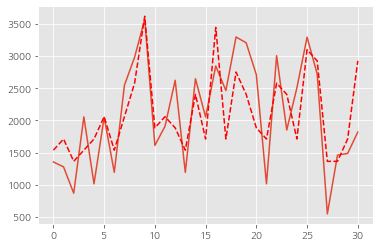

In [119]:
plt.plot( y_data)
plt.plot( model.predict( x_data) ,'r--')
plt.show()

In [120]:
r2_score(y_data, model.predict( x_data))

0.5693834803607448

In [ ]:
optimizer = Adam(learning_rate=0.01)
hist_cost = []

for i in range(2000):
    optimizer.minimize( compute_cost, var_list=[w,b] )
    c = compute_cost().numpy()
    hist_cost.append(c)         
    print(i, "cost=", c)